## Datos Lenguas Andinas

In [19]:
## juntemos todo en una sola función :)
import pandas as pd

def read_lenguas_andinas(file, names, dominio_num):
    
    ## leemos los datos
    ## rasgos!
    datos_lenguas = pd.read_csv(file,sep=';')
    ## nombre lenguas!
    lenguas_areas = pd.read_csv(names,sep=';',encoding='utf-8')
    lenguas_areas = lenguas_areas.rename(columns={'ï»¿Correlativo':'Correlativo', 'Nombre Lengua':'Nombre Lengua', 'RegiÃ³n Lengua':'Región Lengua', 'PaÃ­s':'País',
       'Coordenadas GeogrÃ¡ficas':'Coordenadas Geográficas', 'GlottoCode':'GlottoCode', 'IsoCode':'IsoCode'})
    lenguas_areas = lenguas_areas[['Correlativo','Nombre Lengua']]
    ## creamos un diccionario numero:nombre
    numero = [num for num in lenguas_areas['Correlativo']]
    nombre = [area for area in lenguas_areas['Nombre Lengua']]
    numero_nombre = [[numero[i],nombre[i]] for i in range(len(numero))]
    numero_nombre = {item[0]:item[1] for item in numero_nombre}
    ## ahora filtramos por dominio (no es estrictamente necesario, igual prefiero hacerlo)
    dominio = datos_lenguas[datos_lenguas['Dominio']==dominio_num]
    ## lenguas con anotación en este dominio
    datos_lenguas = [lengua for lengua in dominio['Lengua']]
    lenguas = []
    
    ## valores únicos de lenguas
    for lengua in datos_lenguas:
        if lengua not in lenguas:
            lenguas = lenguas + [lengua]
    
    ## diccionario para guardar los datos
    D = {lengua:{} for lengua in lenguas}
    
    ## recorremos usando loc :)
    for i in list(dominio.index):
        ## cambiamos el nombre de los rasgos para que incluyan información del dominio
        D[dominio.loc[i,'Lengua']][str(dominio_num)+'_'+str(dominio.loc[i,'TipoRasgo'])]=dominio.loc[i,'ValorRasgo']
    
    return {numero_nombre[key].lower():D[key] for key in D.keys()} ## diccionario!

In [20]:
D=read_lenguas_andinas('TabladeDatos.csv','andean languages.csv',4)

In [21]:
D

{'mapudungun': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'ancash quechua': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'cajamarca quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'ecuadorian quechua': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'ayacucho quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'aymara': {'4_2': 1, '4_3': 2, '4_4': 1, '4_1': 2},
 'jaqaru': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'chipaya': {'4_2': 1, '4_3': 1, '4_4': 1, '4_1': 2},
 'uchumataqu': {'4_2': 1, '4_3': 1, '4_1': 2},
 'cholon': {'4_2': 2, '4_3': 1, '4_4': 2, '4_1': 1},
 'mochica': {'4_2': 1, '4_4': 2, '4_1': 2},
 'kunza': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'millcayac': {'4_2': 4, '4_3': 2, '4_4': 1, '4_1': 1},
 'allentiac': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'selknam': {'4_2': 2, '4_3': 2, '4_4': 2, '4_1': 3},
 'yahgan': {'4_2': 1, '4_3': 1, '4_1': 2},
 'pilaga': {'4_2': 3, '4_3': 1, '4_1': 1},
 'wichi': {'4_2': 9, '4_3': 1, '4_4': 1, '4_1': 1},
 'ayoreo': {'4_2': 1, '4_3': 1

In [22]:
len(D)

56

In [23]:
for key in D.keys():
    print(key,len(D[key]))

mapudungun 4
ancash quechua 4
cajamarca quechua 4
ecuadorian quechua 4
ayacucho quechua 4
aymara 4
jaqaru 4
chipaya 4
uchumataqu 3
cholon 4
mochica 3
kunza 4
millcayac 4
allentiac 4
selknam 4
yahgan 3
pilaga 3
wichi 4
ayoreo 4
tapiete 4
kawesqar 3
tehuelche 4
secoya 4
urarina 4
yanesha 4
tariana 4
tucano 4
yauyos quechua 4
puquina 4
lule 4
vilela 4
santiago del estero quechua 4
pacaraos quechua 4
kokama 4
gaviao 4
tiriyo 4
kalapalo 4
karaja 4
apinaye 4
kashibo-kakataibo 4
matses 4
shiwilu 4
cavineña 4
sanuma 4
hup 4
kulina 4
bora 4
trumai 4
yurakare 4
movima 4
puinave 4
sabane 4
aguaruna 4
kwaza 4
kakua 4
moseten 4


### mapas

In [19]:
import pandas as pd

lenguas_glotto = pd.read_csv('andean languages.csv',sep=';',encoding='utf-8')
lenguas_glotto = lenguas_glotto.rename(columns={'ï»¿Correlativo':'Correlativo', 'Nombre Lengua':'Nombre Lengua', 'RegiÃ³n Lengua':'Región Lengua', 'PaÃ­s':'País',
       'Coordenadas GeogrÃ¡ficas':'Coordenadas Geográficas', 'GlottoCode':'GlottoCode', 'IsoCode':'IsoCode'})

In [20]:
lenguas_glotto

Correlativo                Nombre Lengua Región Lengua  \
0             1                   Mapudungun         Andes   
1             2               Ancash Quechua         Andes   
2             3            Cajamarca Quechua         Andes   
3             4           Ecuadorian Quechua         Andes   
4             5             Ayacucho Quechua         Andes   
5             7                       Aymara         Andes   
6             8                       Jaqaru         Andes   
7             9                      Chipaya         Andes   
8            10                   Uchumataqu         Andes   
9            11                       Cholon         Andes   
10           12                      Mochica         Andes   
11           13                        Kunza         Andes   
12           14                    Millcayac         Andes   
13           15                    Allentiac         Andes   
14           16                      Selknam     Patagonia   
15           17                       Yahgan     Patagonia   
16           21                       Pilaga         Chaco   
17           23                        Wichi         Chaco   
18           25                       Ayoreo         Chaco   
19           26                      Tapiete         Chaco   
20           27                     Kawesqar     Patagonia   
21           28                    Tehuelche     Patagonia   
22           29                       Secoya      Amazonia   
23           30                      Urarina      Amazonia   
24           35                      Yanesha      Amazonia   
25           36                      Tariana      Amazonia   
26           37                       Tucano      Amazonia   
27           39               Yauyos Quechua         Andes   
28           41                      Puquina         Andes   
29           42                         Lule         Chaco   
30           43                       Vilela         Chaco   
31           44  Santiago del Estero Quechua         Andes   
32           45             Pacaraos Quechua         Andes   
33           46                       kokama      Amazonia   
34           47                       Gaviao      Amazonia   
35           48                       Tiriyo      Amazonia   
36           49                     kalapalo      Amazonia   
37           50                       Karaja      Amazonia   
38           51                      Apinaye      Amazonia   
39           52            Kashibo-Kakataibo      Amazonia   
40           53                       Matses      Amazonia   
41           54                      Shiwilu      Amazonia   
42           55                     Cavineña      Amazonia   
43           56                       Sanuma      Amazonia   
44           57                          Hup      Amazonia   
45           58                       kulina      Amazonia   
46           59                         Bora      Amazonia   
47           61                       Trumai      Amazonia   
48           63                     Yurakare      Amazonia   
49           64                       Movima      Amazonia   
50           65                      Puinave      Amazonia   
51           71                       Sabane      Amazonia   
52           72                     aguaruna      Amazonia   
53           74                        Kwaza      Amazonia   
54           75                        Kakua      Amazonia   
55           76                      Moseten      Amazonia   

                    País Coordenadas Geográficas GlottoCode IsoCode  
0                  Chile         -38.74 / -71.28   mapu1245     arn  
1                 Varios           3.90 / -51.80   huay1240     qwh  
2                   Perú          -7.09 / -78.32   caja1238     qvc  
3                Ecuador          -6.56 / -43.00   ecua1249     NaN  
4                   Perú         -13.85 / -74.32   ayac1239     quy  
5                   Perú         -17.14 / -70.34 

In [21]:
changes = {'amar1274':'hara1260','trio1238':'kawe1237','alac1240':'tiri1260','wich1264':'wich1261'}
for code in changes.keys():
    lenguas_glotto.loc[(lenguas_glotto.GlottoCode == code),'GlottoCode']=changes[code]

In [22]:
glotto_coordinates = dict(zip([name.lower() for name in lenguas_glotto['GlottoCode']],lenguas_glotto['Coordenadas Geográficas']))

In [23]:
glotto_coordinates = {key:glotto_coordinates[key].split(' / ') for key in glotto_coordinates.keys()}

In [24]:
glotto_coordinates['mill1237']=['-6.68', '-73.24']
glotto_coordinates['alle1238']=['3.11', '-66.24']

In [25]:
lenguas_glotto = dict(zip([name.lower() for name in lenguas_glotto['Nombre Lengua']],lenguas_glotto['GlottoCode']))

In [26]:
lenguas_glotto = {key:lenguas_glotto[key] for key in lenguas_glotto.keys() if key in D.keys()}

In [27]:
len(lenguas_glotto)

56

In [28]:
lenguas_glotto

{'mapudungun': 'mapu1245',
 'ancash quechua': 'huay1240',
 'cajamarca quechua': 'caja1238',
 'ecuadorian quechua': 'ecua1249',
 'ayacucho quechua': 'ayac1239',
 'aymara': 'sout2996',
 'jaqaru': 'jaqa1244',
 'chipaya': 'chip1262',
 'uchumataqu': 'uruu1244',
 'cholon': 'chol1284',
 'mochica': 'moch1259',
 'kunza': 'kunz1244',
 'millcayac': 'mill1237',
 'allentiac': 'alle1238',
 'selknam': 'onaa1245',
 'yahgan': 'yama1264',
 'pilaga': 'pila1245',
 'wichi': 'wich1261',
 'ayoreo': 'ayor1240',
 'tapiete': 'tapi1253',
 'kawesqar': 'kawe1237',
 'tehuelche': 'tehu1242',
 'secoya': 'seco1241',
 'urarina': 'urar1246',
 'yanesha': 'yane1238',
 'tariana': 'tari1256',
 'tucano': 'tuca1252',
 'yauyos quechua': 'yauy1235',
 'puquina': 'puqu1242',
 'lule': 'lule1238',
 'vilela': 'vile1241',
 'santiago del estero quechua': 'sant1432',
 'pacaraos quechua': 'paca1245',
 'kokama': 'coca1259',
 'gaviao': 'gavi1246',
 'tiriyo': 'tiri1260',
 'kalapalo': 'kuik1246',
 'karaja': 'kara1500',
 'apinaye': 'apin1244

In [29]:
glotto_lenguas = {v: k for k, v in lenguas_glotto.items()}

In [30]:
## miramos languoids

languoid = pd.read_csv('Languages.csv',sep=',')

In [31]:
languoid

ID              Name      Macroarea   Latitude   Longitude  \
0     guri1248           Guriaso      Papunesia  -3.571800  141.597000   
1     pawa1255            Pawaia      Papunesia  -6.880210  145.081000   
2     guam1236             Guamo  South America   8.235103  -67.401875   
3     dama1272             Damal      Papunesia  -4.173450  137.496000   
4     puqu1242           Puquina  South America -15.899200  -69.961100   
...        ...               ...            ...        ...         ...   
8113  guan1268  Guana (Paraguay)  South America -21.980300  -58.065400   
8114  sana1298          Sanapaná  South America -22.490000  -58.380000   
8115  anga1316           Angaité  South America -22.850000  -58.450000   
8116  gily1242        Amur Nivkh        Eurasia  52.590000  140.681000   
8117  sakh1247    Sakhalin Nivkh        Eurasia  51.781400  143.162800   

     Glottocode ISO639P3code Family_Glottocode    Family_Name    Status  \
0      guri1248          grx               NaN            NaN  shifting   
1      pawa1255          pwa               NaN            NaN  shifting   
2      guam1236          NaN               NaN            NaN   extinct   
3      dama1272          uhn               NaN            NaN  shifting   
4      puqu1242          puq               NaN            NaN   extinct   
...         ...          ...               ...            ...       ...   
8113   guan1268          gva          leng1261  Lengua-Mascoy  shifting   
8114   sana1298          spn          leng1261  Lengua-Mascoy  shifting   
8115   anga1316          aqt          leng1261  Lengua-Mascoy  moribund   
8116   gily1242          niv          nivk1234          Nivkh  moribund   
8117   sakh1247          NaN          nivk1234          Nivkh  moribund   

     Parent_Glottocode  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
8113          east2852  
8114          east2852  
8115          east2852  
8116          nivk1234  
8117          nivk1234  

[8118 rows x 11 columns]

In [32]:
languoid = languoid[languoid['ID'].isin(lenguas_glotto.values())]

In [33]:
languoid

ID                              Name      Macroarea   Latitude  \
4     puqu1242                           Puquina  South America -15.899200   
6     vile1241                            Vilela  South America -27.406300   
10    movi1243                            Movima  South America -13.811500   
20    yama1264                            Yámana  South America -55.274800   
21    kunz1244                             Kunza  South America -23.000000   
25    lule1238                              Lule  South America -25.221839   
58    puin1248                           Puinave  South America   3.929740   
72    moch1259                           Mochica  South America  -8.016670   
94    urar1246                           Urarina  South America  -4.440060   
155   mose1249                   Mosetén-Chimané  South America -14.644480   
169   kwaz1243                             Kwaza  South America -11.666700   
173   yura1255                          Yuracaré  South America -16.747900   
181   trum1247                            Trumai  South America -11.811900   
204   bora1263                              Bora  South America  -2.000259   
235   uruu1244                               Uru  South America -16.725470   
236   chip1262                           Chipaya  South America -18.739510   
1618  kara1500                            Karajá  South America -11.188100   
1626  apin1244                           Apinayé  South America  -6.107740   
1763  tari1256                           Tariana  South America   0.440205   
1779  yane1238                          Yanesha'  South America -10.545400   
1839  agua1253                          Aguaruna  South America  -5.300440   
2280  ayor1240                            Ayoreo  South America -19.220055   
2343  pila1245                            Pilagá  South America -25.005800   
2376  jaqa1244                            Jaqaru  South America -12.741939   
2378  sout2996                   Southern Aymara  South America -17.141700   
2492  caja1238                 Cajamarca Quechua  South America  -7.093140   
2495  sant1432       Santiago del Estero Quichua  South America -27.821000   
2496  ayac1239                  Ayacucho Quechua  South America -13.847140   
2517  paca1245                  Pacaraos Quechua  South America -11.142780   
2518  yauy1235  Huangascar-Topara-Yauyos Quechua  South America -13.114400   
2528  huay1240            Huaylas Ancash Quechua  South America  -9.387090   
2572  cavi1250                          Cavineña  South America -13.354400   
2579  cash1251                 Cashibo-Cacataibo  South America  -8.702320   
2616  mats1244                            Matsés  South America  -5.739140   
3521  onaa1245                          Selk'nam  South America -54.000000   
3524  tehu1242                         Tehuelche  South America -47.579600   
3531  jebe1250                            Jebero  South America  -5.403170   
3974  gavi1246                Gavião Do Jiparaná  South America -10.723500   
3989  tapi1253                           Tapieté  South America -21.416900   
4003  coca1259                  Cocama-Cocamilla  South America  -4.500000   
4063  sanu1240                            Sanumá  South America   4.000000   
4071  hupd1244                               Hup  South America   0.586220   
4126  culi1244                            Culina  South America  -8.552680   
5701  saba1268                            Sabanê  South America -12.985700   
7271  mapu1245                        Mapudungun  South America -38.739200   
7312  kuik1246                  Kuikúro-Kalapálo  South America -12.303500   
7784  mill1237                         Millcayac  South America -31.797290   
7785  alle1238                         Allentiac  South America -33.480938   
7818  chol1284                            Cholón  South America  -9.231290   
7847  cacu1241                             Kakua  South America   0.887780   
7853  seco1241                    

In [21]:
len(languoid)

52

In [34]:
for i in languoid.index:
    if languoid.isnull().loc[i,'Latitude']:
        code=languoid.loc[i,'ID']
        print(code)
        if glotto_coordinates[code][0]!='/':
            languoid.at[i, 'Latitude'] = glotto_coordinates[code][0]
            languoid.at[i, 'Longitude'] = glotto_coordinates[code][1]

In [35]:
languoid

ID                              Name      Macroarea   Latitude  \
4     puqu1242                           Puquina  South America -15.899200   
6     vile1241                            Vilela  South America -27.406300   
10    movi1243                            Movima  South America -13.811500   
20    yama1264                            Yámana  South America -55.274800   
21    kunz1244                             Kunza  South America -23.000000   
25    lule1238                              Lule  South America -25.221839   
58    puin1248                           Puinave  South America   3.929740   
72    moch1259                           Mochica  South America  -8.016670   
94    urar1246                           Urarina  South America  -4.440060   
155   mose1249                   Mosetén-Chimané  South America -14.644480   
169   kwaz1243                             Kwaza  South America -11.666700   
173   yura1255                          Yuracaré  South America -16.747900   
181   trum1247                            Trumai  South America -11.811900   
204   bora1263                              Bora  South America  -2.000259   
235   uruu1244                               Uru  South America -16.725470   
236   chip1262                           Chipaya  South America -18.739510   
1618  kara1500                            Karajá  South America -11.188100   
1626  apin1244                           Apinayé  South America  -6.107740   
1763  tari1256                           Tariana  South America   0.440205   
1779  yane1238                          Yanesha'  South America -10.545400   
1839  agua1253                          Aguaruna  South America  -5.300440   
2280  ayor1240                            Ayoreo  South America -19.220055   
2343  pila1245                            Pilagá  South America -25.005800   
2376  jaqa1244                            Jaqaru  South America -12.741939   
2378  sout2996                   Southern Aymara  South America -17.141700   
2492  caja1238                 Cajamarca Quechua  South America  -7.093140   
2495  sant1432       Santiago del Estero Quichua  South America -27.821000   
2496  ayac1239                  Ayacucho Quechua  South America -13.847140   
2517  paca1245                  Pacaraos Quechua  South America -11.142780   
2518  yauy1235  Huangascar-Topara-Yauyos Quechua  South America -13.114400   
2528  huay1240            Huaylas Ancash Quechua  South America  -9.387090   
2572  cavi1250                          Cavineña  South America -13.354400   
2579  cash1251                 Cashibo-Cacataibo  South America  -8.702320   
2616  mats1244                            Matsés  South America  -5.739140   
3521  onaa1245                          Selk'nam  South America -54.000000   
3524  tehu1242                         Tehuelche  South America -47.579600   
3531  jebe1250                            Jebero  South America  -5.403170   
3974  gavi1246                Gavião Do Jiparaná  South America -10.723500   
3989  tapi1253                           Tapieté  South America -21.416900   
4003  coca1259                  Cocama-Cocamilla  South America  -4.500000   
4063  sanu1240                            Sanumá  South America   4.000000   
4071  hupd1244                               Hup  South America   0.586220   
4126  culi1244                            Culina  South America  -8.552680   
5701  saba1268                            Sabanê  South America -12.985700   
7271  mapu1245                        Mapudungun  South America -38.739200   
7312  kuik1246                  Kuikúro-Kalapálo  South America -12.303500   
7784  mill1237                         Millcayac  South America -31.797290   
7785  alle1238                         Allentiac  South America -33.480938   
7818  chol1284                            Cholón  South America  -9.231290   
7847  cacu1241                             Kakua  South America   0.887780   
7853  seco1241                    

In [51]:
import geopandas

In [55]:
import descartes

In [56]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_12871/3939914640.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [57]:
world = world[world['continent']=='South America']

In [58]:
x, y, codes = languoid['Longitude'].values, languoid['Latitude'].values, languoid['ID'].values

In [59]:
len(x)

52

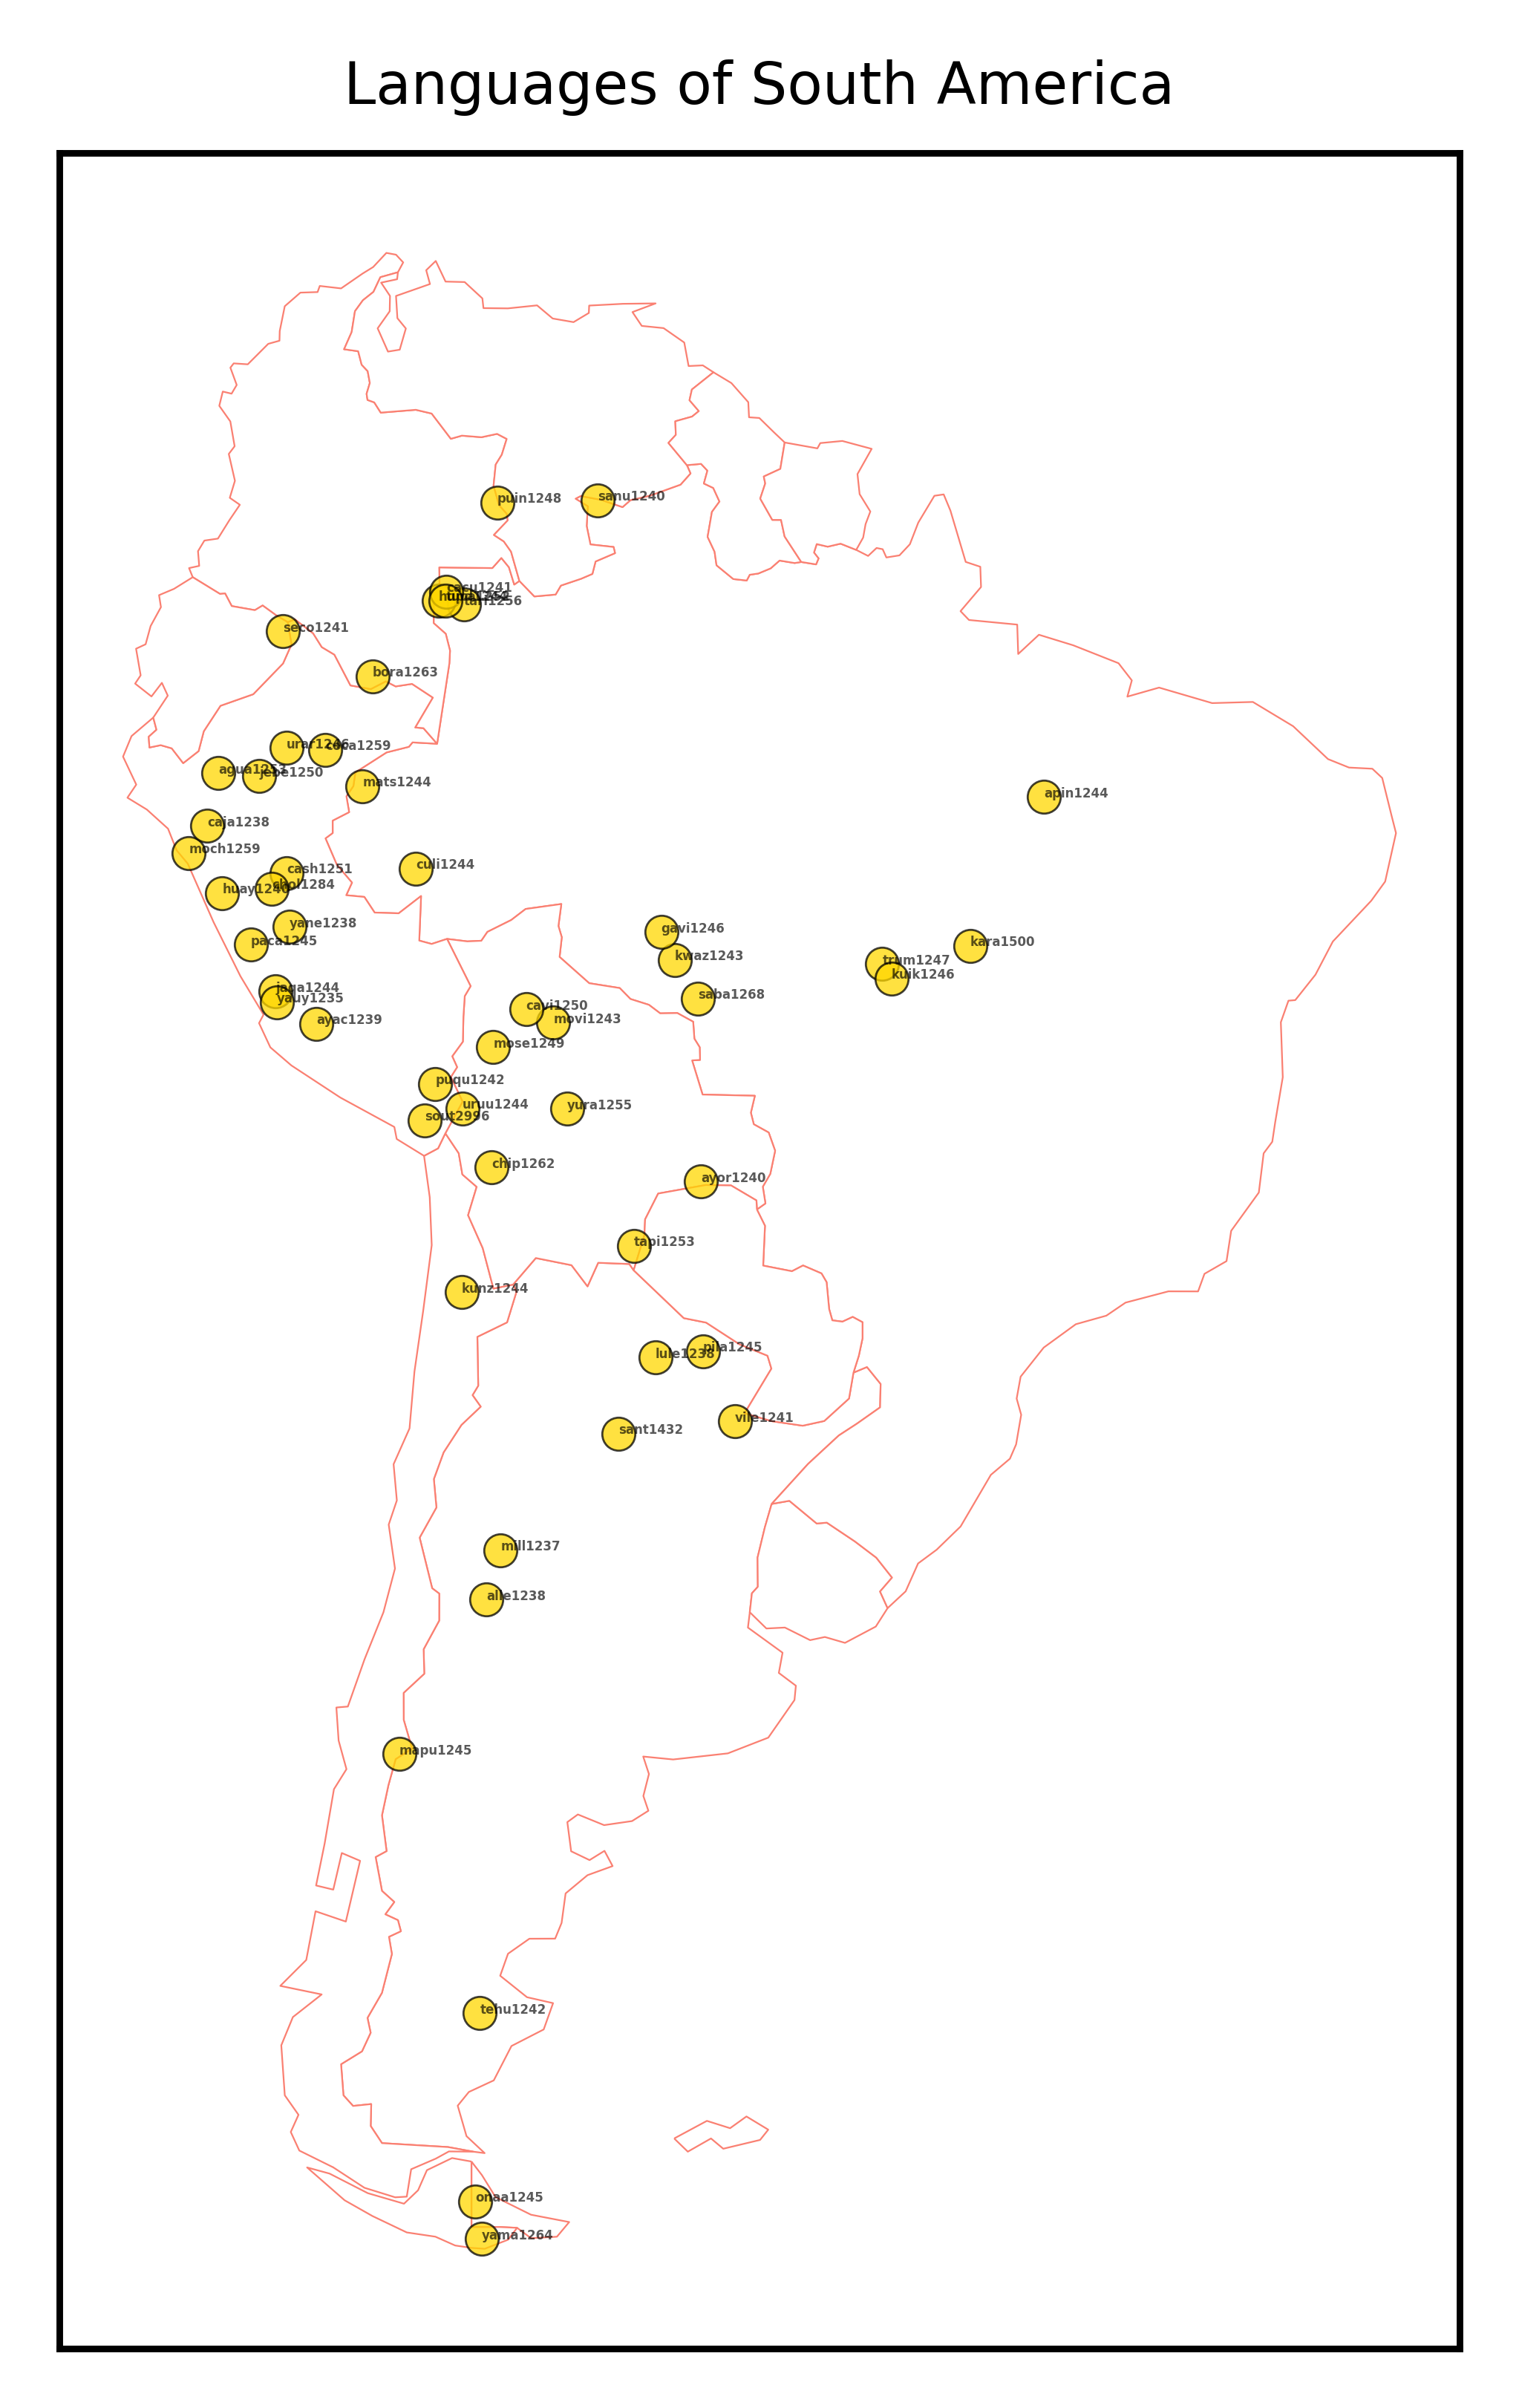

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Languages of South America',fontsize=7)
world.plot(ax=ax, color='white', edgecolor='salmon',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
ax.plot(x, y, marker='o',color='gold',linewidth=0,markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75)
annotate = True
if annotate == True:
    for i in range(len(x)):
        ax.annotate(codes[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=1.5, alpha=0.65)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('maps/mapa'+str(annotate)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [61]:
Dcodes = {lenguas_glotto[key]:D[key] for key in D.keys()}

In [62]:
rasgos = []

for key in Dcodes.keys():
    rasgos+=list(Dcodes[key].keys())
rasgos = list(set(rasgos))

In [63]:
rasgos

['4_1', '4_4', '4_2', '4_3']

In [64]:
def values_per_feature(DD,f):
    DDD = {}
    for key in DD.keys():
        if f in DD[key].keys():
            DDD[key]=DD[key][f]
    return DDD

In [65]:
values_per_feature(Dcodes,'4_4')

{'mapu1245': 2,
 'huay1240': 2,
 'caja1238': 2,
 'ecua1249': 2,
 'ayac1239': 2,
 'sout2996': 1,
 'jaqa1244': 2,
 'chip1262': 1,
 'chol1284': 2,
 'moch1259': 2,
 'kunz1244': 2,
 'mill1237': 1,
 'alle1238': 2,
 'onaa1245': 2,
 'wich1261': 1,
 'ayor1240': 1,
 'tapi1253': 2,
 'tehu1242': 2,
 'seco1241': 1,
 'urar1246': 2,
 'yane1238': 1,
 'tari1256': 2,
 'tuca1252': 2,
 'yauy1235': 2,
 'puqu1242': 2,
 'lule1238': 2,
 'vile1241': 2,
 'sant1432': 2,
 'paca1245': 2,
 'coca1259': 2,
 'gavi1246': 2,
 'tiri1260': 1,
 'kuik1246': 2,
 'kara1500': 1,
 'apin1244': 1,
 'cash1251': 1,
 'mats1244': 2,
 'jebe1250': 2,
 'cavi1250': 2,
 'sanu1240': 2,
 'hupd1244': 1,
 'culi1244': 1,
 'bora1263': 2,
 'trum1247': 1,
 'yura1255': 2,
 'movi1243': 2,
 'puin1248': 2,
 'saba1268': 1,
 'agua1253': 2,
 'kwaz1243': 1,
 'cacu1241': 2,
 'mose1249': 1}

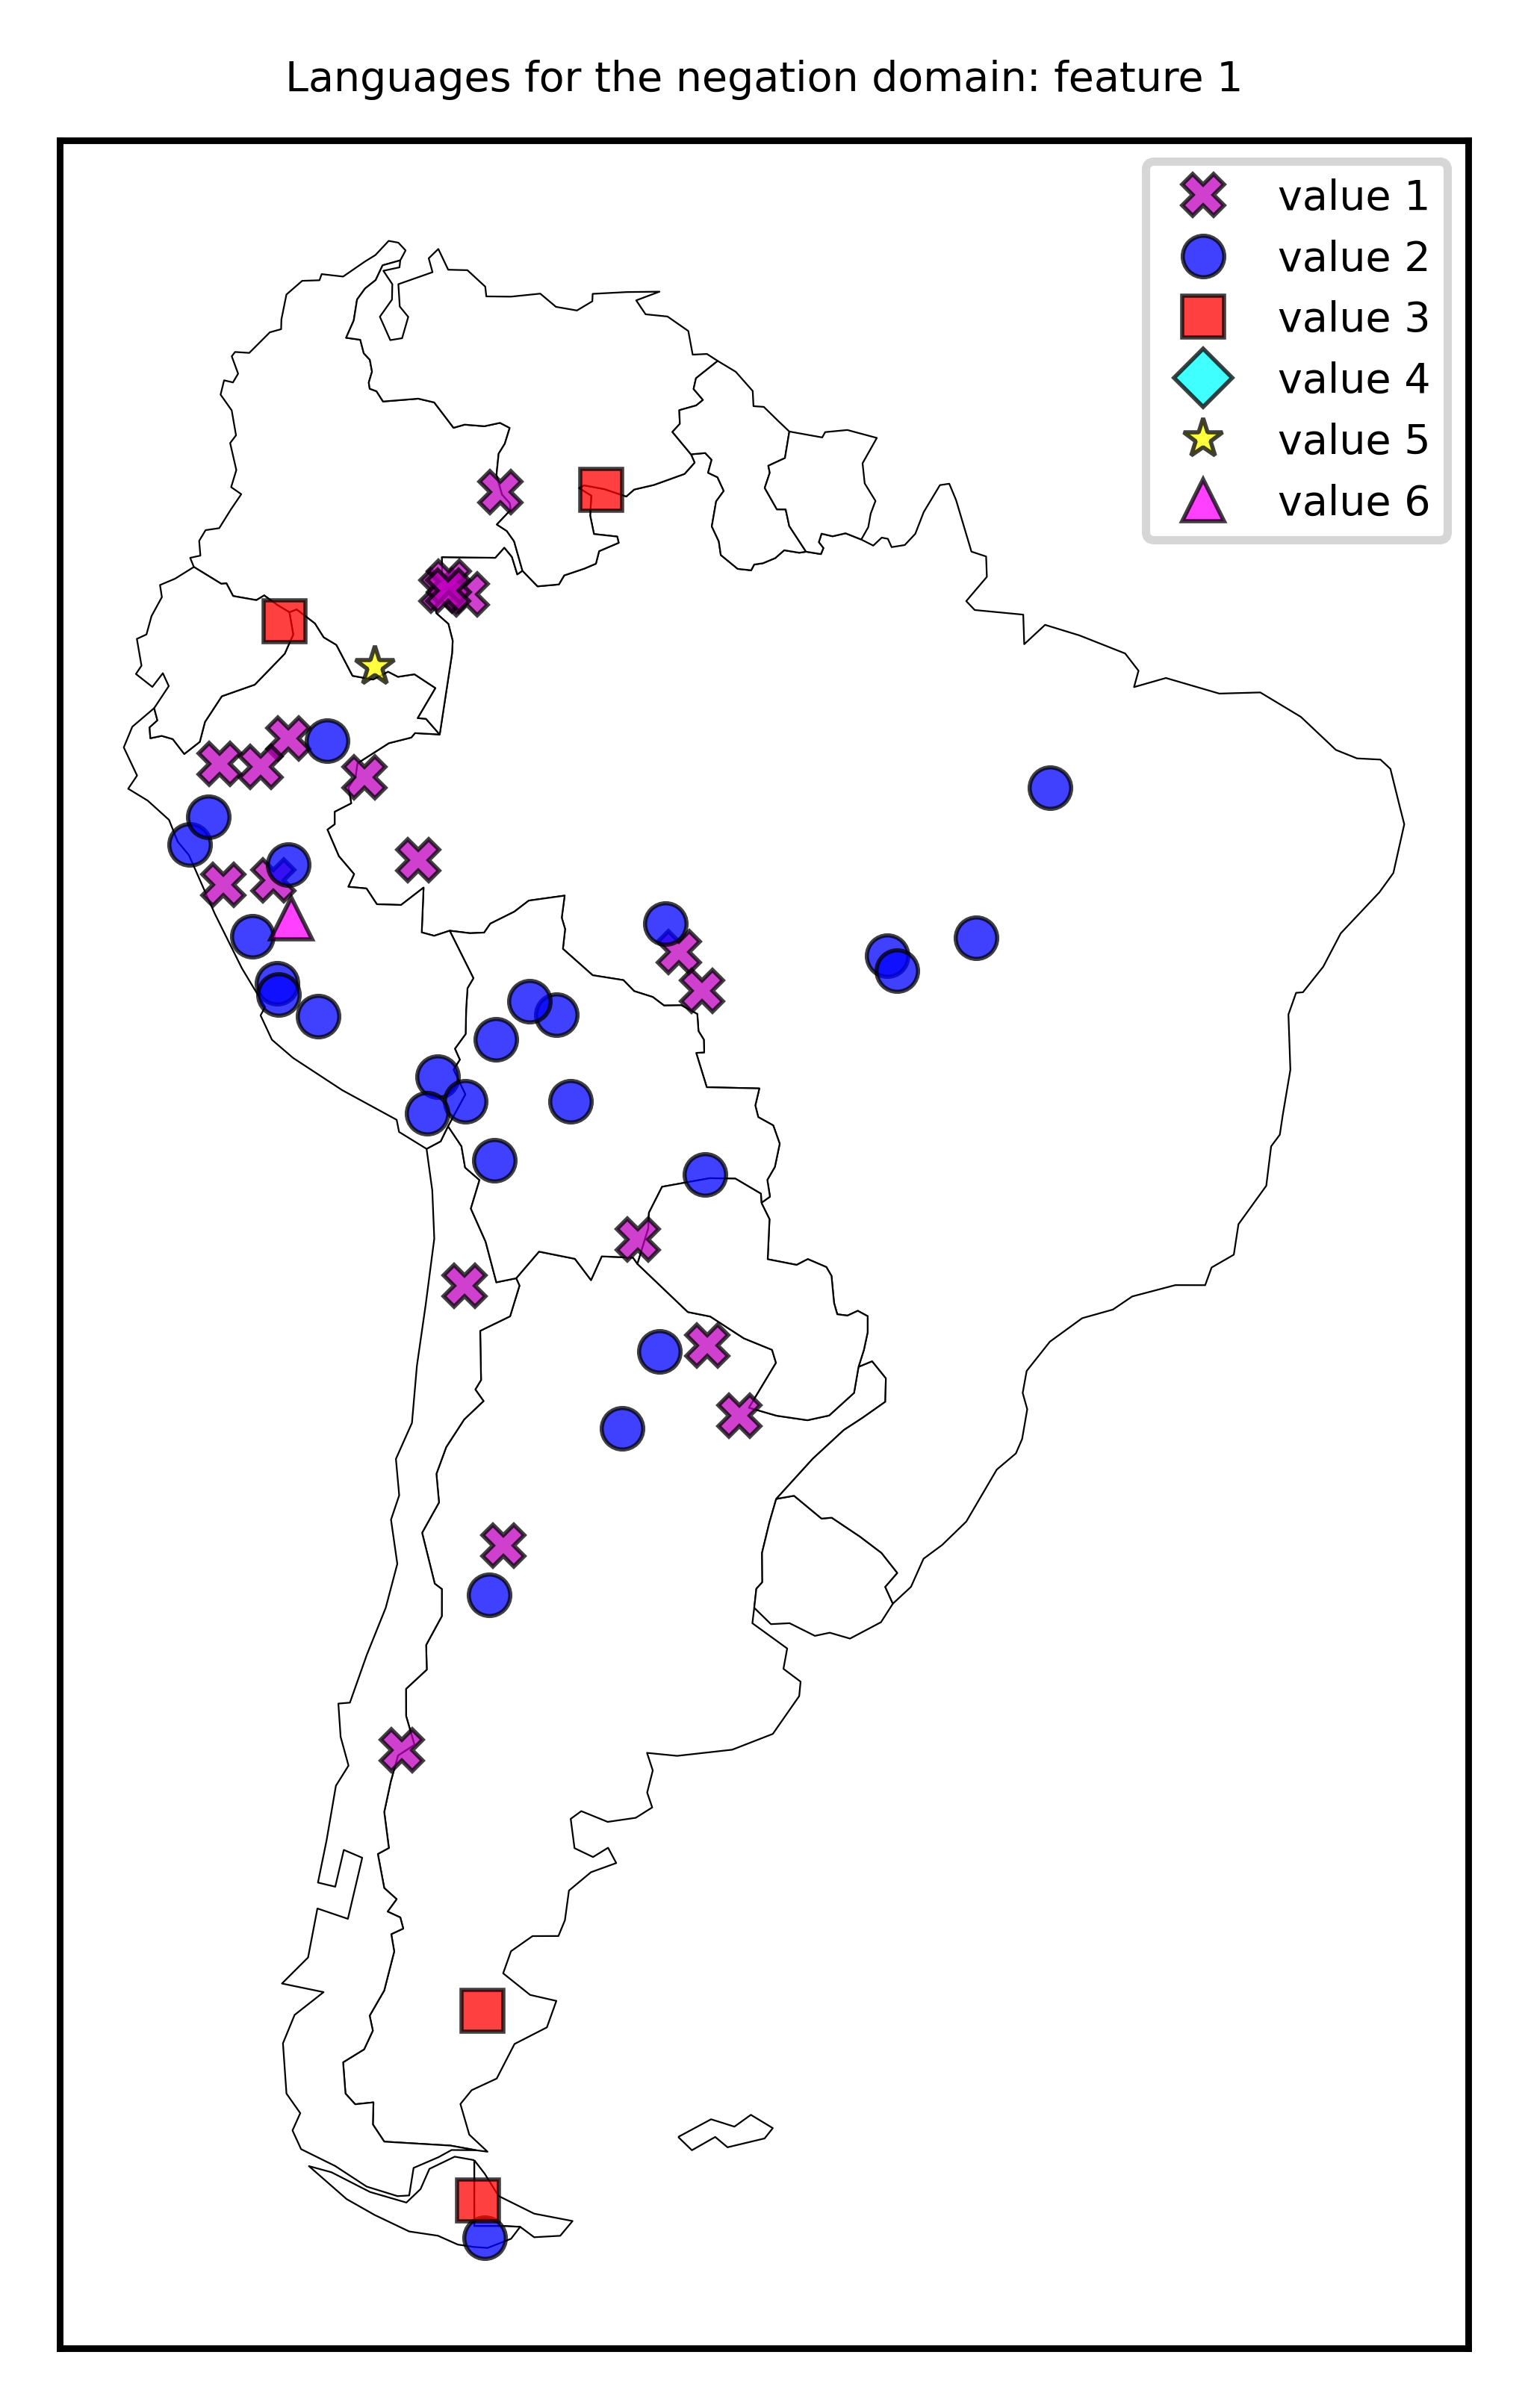

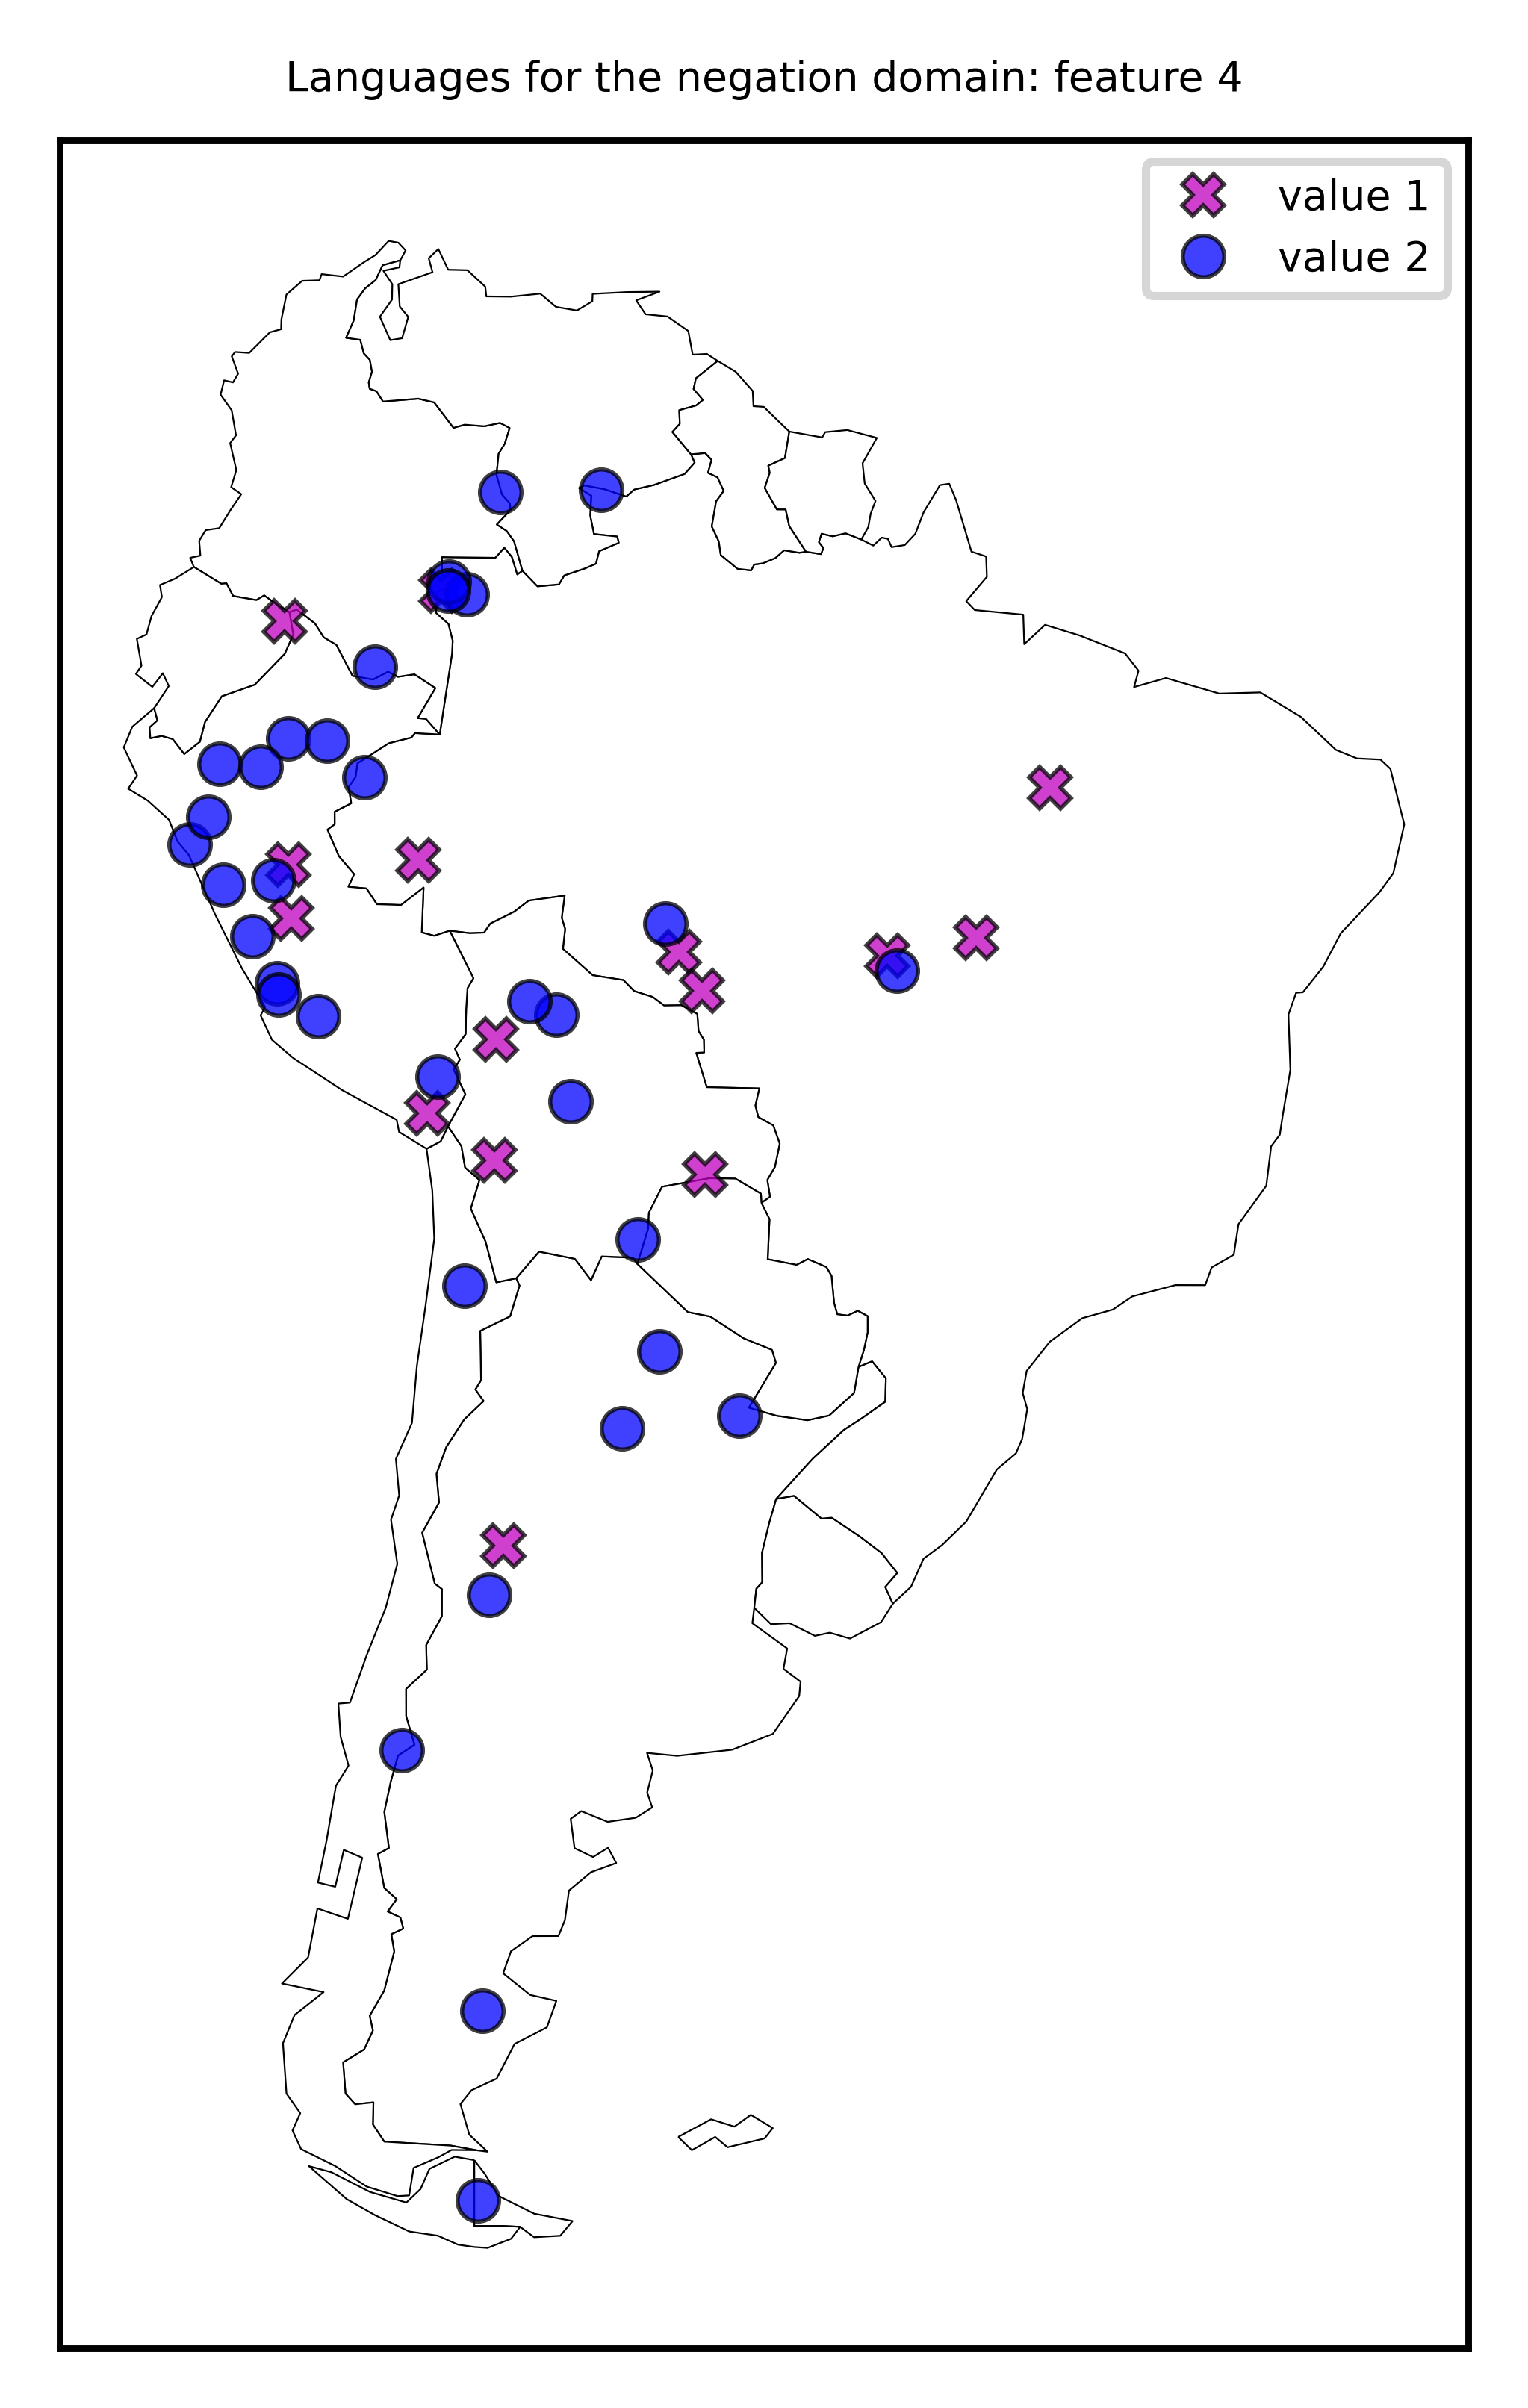

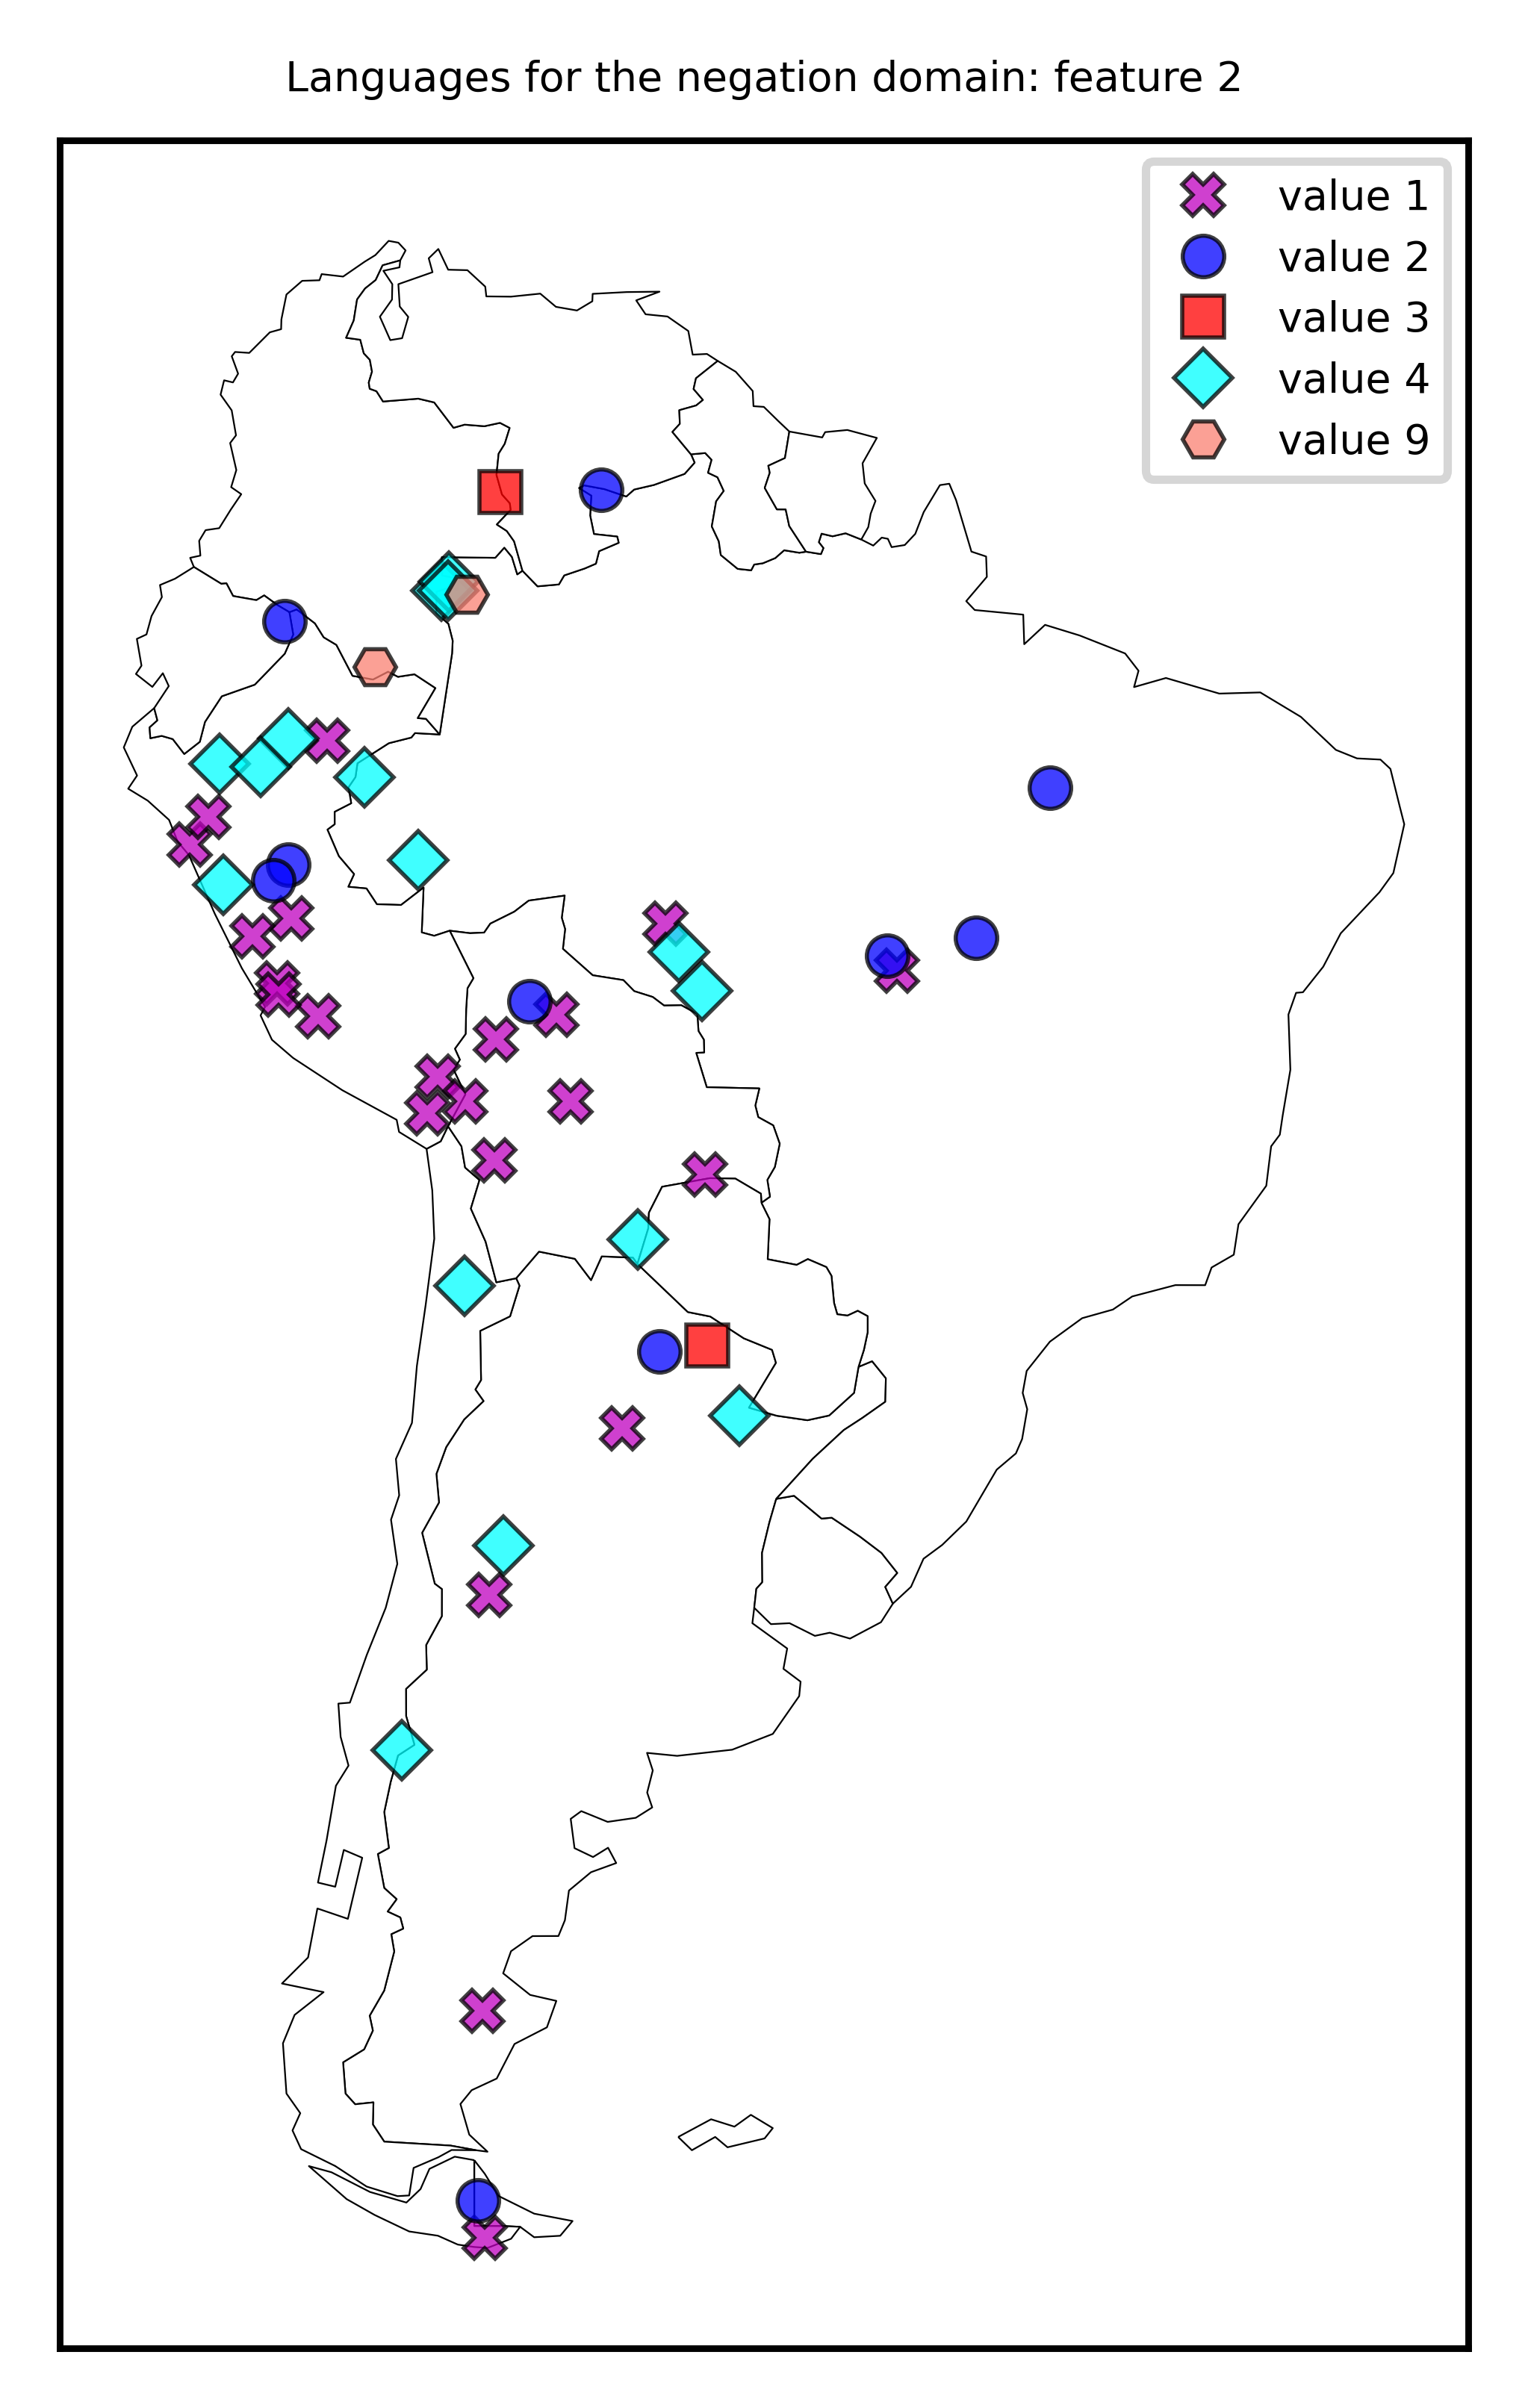

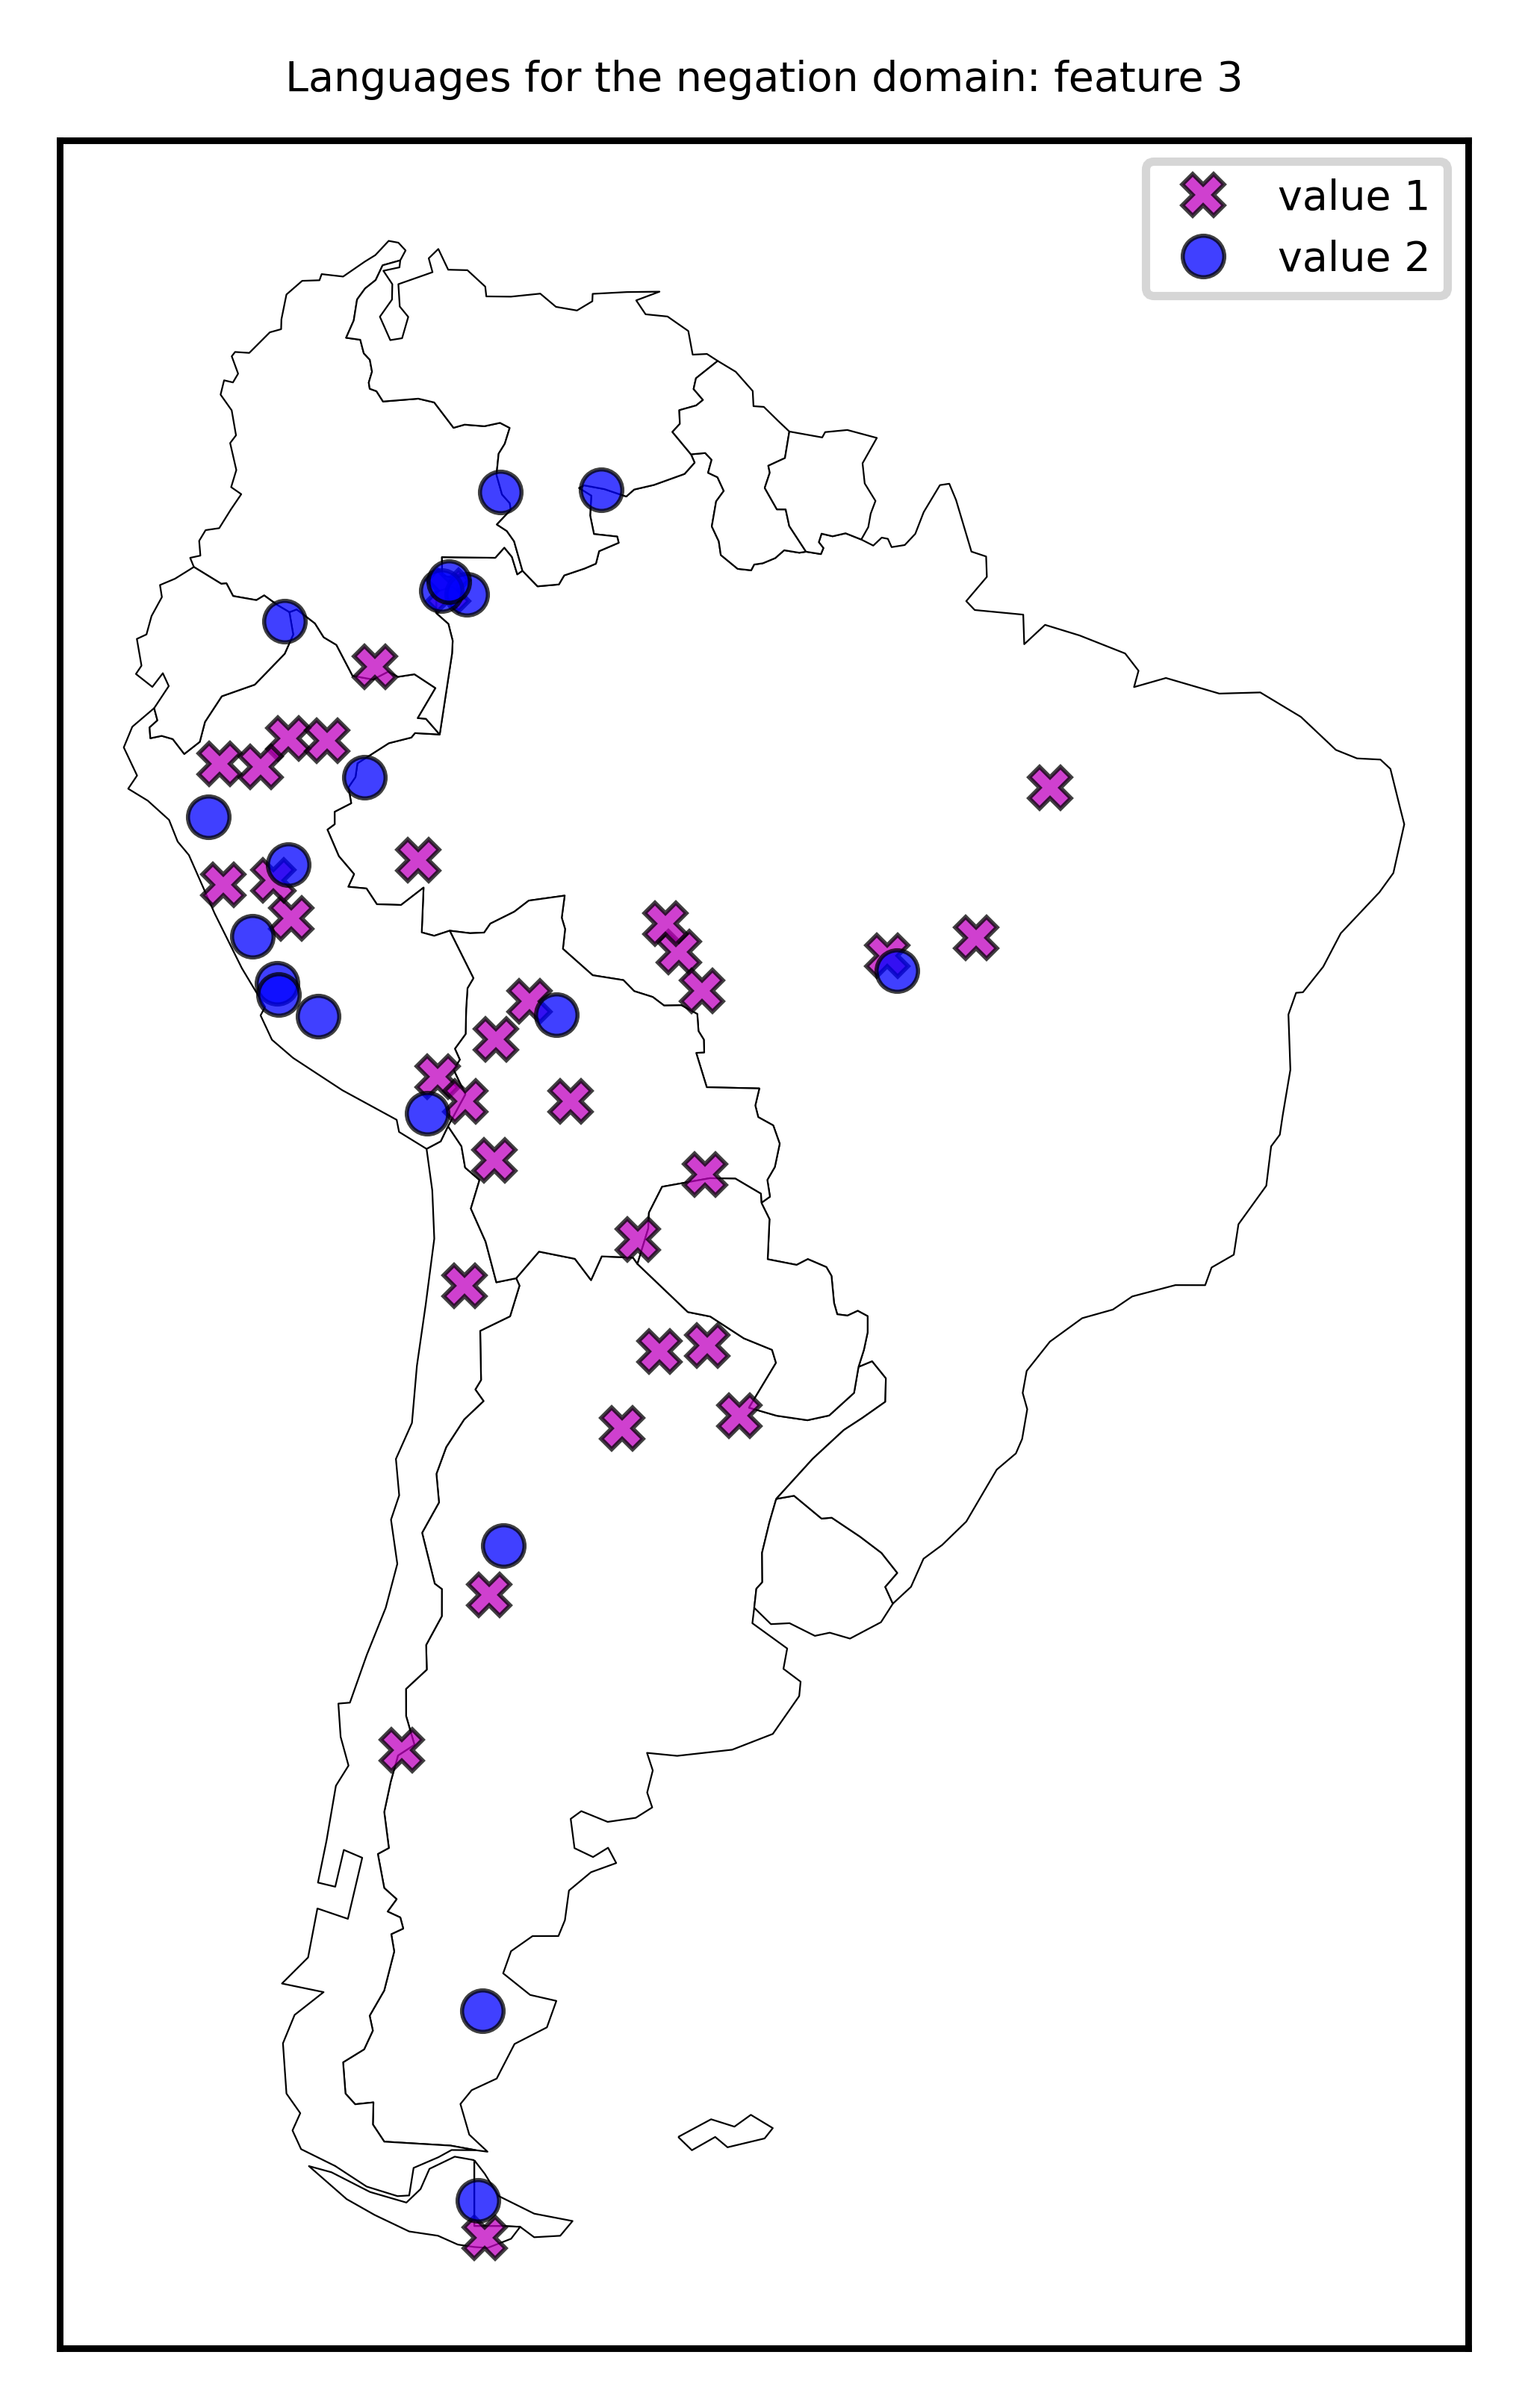

In [66]:
import matplotlib.pyplot as plt

dict_color = {'1':{'marker':'X','color':'m'},'2':{'marker':'o','color':'b'},'3':{'marker':'s','color':'r'},
             '4':{'marker':'D','color':'cyan'},'5':{'marker':'*','color':'yellow'},'6':{'marker':'^','color':'fuchsia'},
             '7':{'marker':'v','color':'olive'},'8':{'marker':'p','color':'lime'},'9':{'marker':'H','color':'salmon'}}

for rasgo in rasgos:
    
    fig, ax = plt.subplots(dpi=800)

    ax.set_aspect('equal')
    plt.title('Languages for the negation domain: feature '+rasgo[2:],fontsize=5)
    world.plot(ax=ax, color='white', edgecolor='black',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
#ax.scatter(x, y, marker="o", color='gold', alpha=1., zorder=5, s=10)
    for f in set(values_per_feature(Dcodes,rasgo).values()):
        
        ax.plot([x[i] for i in [list(codes).index(language) for language in codes if language in values_per_feature(Dcodes,rasgo).keys() and values_per_feature(Dcodes,rasgo)[language]==f]],[y[i] for i in [list(codes).index(language) for language in codes if language in values_per_feature(Dcodes,rasgo).keys() and values_per_feature(Dcodes,rasgo)[language]==f]],marker=dict_color[str(f)]['marker'],color=dict_color[str(f)]['color'],linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='value '+str(f))
    plt.legend(loc='best',fontsize=5)

    ax.set_yticks([])
    ax.set_xticks([])
    plt.savefig('maps/mapa_rasgo'+rasgo +'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

### ¿Cómo se distribuyen las lenguas según el número de rasgos?

In [43]:
from collections import Counter

def distribucion(D):
    D_rasgos = {lengua:{} for lengua in D.keys()}
    for lengua in D.keys():
        for lengualengua in D.keys():
            features=list(D.values())
            features=[len(item) for item in features]
    C=dict(Counter(features))
    keys = sorted(C.keys())
    DD = {}
    for key in keys:
        x = 0
        for keykey in C.keys():
            if keykey>=key:
                x+=C[keykey]
        DD[key]=x
    return DD

In [44]:
distribucion(D)

{3: 56, 4: 51}

## Representaciones

In [45]:
## filtramos los datos leídos

def filter_rasgos_comun(D,num_rasgos):
    
    ## buscamos los rasgos en común
    rasgos_comunes = [list(item.keys()) for item in D.values() if len(item)>num_rasgos]
    ## intersectamos todos los conjuntos de rasgos sujetos a la condición len(item)>num_rasgos
    rasgos_comunes = set(rasgos_comunes[0]).intersection(*rasgos_comunes)
    ## restringimos D
    D = {lengua:{key:D[lengua][key] for key in rasgos_comunes} for lengua in D.keys() if len(D[lengua])>num_rasgos}
    return D

In [46]:
D = read_lenguas_andinas('TabladeDatos.csv','andean languages.csv',4)

In [47]:
D

{'mapudungun': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'ancash quechua': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'cajamarca quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'ecuadorian quechua': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'ayacucho quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'aymara': {'4_2': 1, '4_3': 2, '4_4': 1, '4_1': 2},
 'jaqaru': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'chipaya': {'4_2': 1, '4_3': 1, '4_4': 1, '4_1': 2},
 'uchumataqu': {'4_2': 1, '4_3': 1, '4_1': 2},
 'cholon': {'4_2': 2, '4_3': 1, '4_4': 2, '4_1': 1},
 'mochica': {'4_2': 1, '4_4': 2, '4_1': 2},
 'kunza': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'millcayac': {'4_2': 4, '4_3': 2, '4_4': 1, '4_1': 1},
 'allentiac': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'selknam': {'4_2': 2, '4_3': 2, '4_4': 2, '4_1': 3},
 'yahgan': {'4_2': 1, '4_3': 1, '4_1': 2},
 'pilaga': {'4_2': 3, '4_3': 1, '4_1': 1},
 'wichi': {'4_2': 9, '4_3': 1, '4_4': 1, '4_1': 1},
 'ayoreo': {'4_2': 1, '4_3': 1

In [48]:
def binarizer(D):
    B = {lengua:{} for lengua in D.keys()}
    for lengua in D.keys():
        for key in D[lengua].keys():
            B[lengua][key+'_'+str(D[lengua][key])]=1
            
    ## recolectamos los keys :)
    
    keys = []
    for lengua in B.keys():
        for key in B[lengua].keys():
            if key not in keys:
                keys+=[key]
                
    C = {lengua:{} for lengua in D.keys()}
    for lengua in D.keys():
        for key in D[lengua].keys():
            C[lengua][key+'_'+str(D[lengua][key])]=1
            for keykey in keys:
                if keykey.startswith(key):
                    if key+'_'+str(D[lengua][key])!=keykey:
                        C[lengua][keykey]=0
    
    return C

In [49]:
#D=binarizer(D)

In [8]:
D['mapudungun']

{'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1}

In [51]:
Ks = {'4_1':0,'4_2':0,'4_3':0,'4_4':0}

for key in Ks:
    for keykey in D['mapudungun'].keys():
        if keykey.startswith(key):
            Ks[key]+=1

In [52]:
Ks

{'4_1': 1, '4_2': 1, '4_3': 1, '4_4': 1}

In [53]:
len(D['mochica'])

3

## Distancias inter e intra área!

In [48]:
areas = pd.read_csv('areas.csv',sep=',')
lenguas = [name.lower() for name in list(areas['lengua'])]
areas_dict = {}
for i in list(areas.index):
    if areas.loc[i,'lengua'].lower()=='moseten':
        areas_dict['moseten']=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'area'].lower()]
    else:
        areas_dict[areas.loc[i,'lengua'].lower()]=[areas.loc[i,'sub-area'].lower().strip(),areas.loc[i,'area'].lower().strip()]

In [50]:
areas.index

RangeIndex(start=0, stop=56, step=1)

In [25]:
areas_dict

{'mapudungun': ['southern andes', 'andes'],
 'ancash quechua': ['central andes', 'andes'],
 'cajamarca quechua': ['central andes', 'andes'],
 'ecuadorian quechua': ['central andes', 'andes'],
 'ayacucho quechua': ['central andes', 'andes'],
 'aymara': ['central andes', 'andes'],
 'jaqaru': ['central andes', 'andes'],
 'chipaya': ['central andes', 'andes'],
 'uchumataqu': ['central andes', 'andes'],
 'cholon': ['northern andes', 'andes'],
 'mochica': ['northern andes', 'andes'],
 'kunza': ['southern andes', 'andes'],
 'millcayac': ['southern andes', 'andes'],
 'allentiac': ['southern andes', 'andes'],
 'selknam': ['patagonia', 'patagonia'],
 'yahgan': ['patagonia', 'patagonia'],
 'pilaga': ['chaco', 'chaco'],
 'wichi': ['chaco', 'chaco'],
 'ayoreo': ['chaco', 'chaco'],
 'tapiete': ['chaco', 'chaco'],
 'kawesqar': ['patagonia', 'patagonia'],
 'tehuelche': ['patagonia', 'patagonia'],
 'secoya': ['amazonia', 'amazonia'],
 'urarina': ['amazonia near', 'amazonia'],
 'yanesha': ['amazonia', '

In [26]:
areas

correlativo                       lengua        sub-area  \
0             1                   mapudungun  southern andes   
1             2               ancash quechua   central andes   
2             3            cajamarca quechua   central andes   
3             4           ecuadorian quechua   central andes   
4             5             ayacucho quechua   central andes   
5             7                       aymara   central andes   
6             8                       jaqaru   central andes   
7             9                      chipaya   central andes   
8            10                   uchumataqu   central andes   
9            11                       cholon  northern andes   
10           12                      mochica  northern andes   
11           13                        kunza  southern andes   
12           14                    millcayac  southern andes   
13           15                    allentiac  southern andes   
14           16                      selknam       patagonia   
15           17                       yahgan       patagonia   
16           21                       pilaga           chaco   
17           23                        wichi           chaco   
18           25                       ayoreo           chaco   
19           26                      tapiete           chaco   
20           27                     kawesqar       patagonia   
21           28                    tehuelche       patagonia   
22           29                       secoya        amazonia   
23           30                      urarina   amazonia near   
24           35                      yanesha        amazonia   
25           36                      tariana        amazonia   
26           37                       tucano        amazonia   
27           39               yauyos quechua   central andes   
28           41                      puquina   central andes   
29           42                         lule           chaco   
30           43                       vilela           chaco   
31           44  santiago del estero quechua   central andes   
32           45             pacaraos quechua   central andes   
33           46                       kokama   amazonia near   
34           47                       gaviao    amazonia far   
35           48                       tiriyo    amazonia far   
36           49                     kalapalo    amazonia far   
37           50                       karaja    amazonia far   
38           51                      apinaye    amazonia far   
39           52            kashibo-Kakataibo   amazonia near   
40           53                       matses    amazonia far   
41           54                      shiwilu   amazonia near   
42           55                     cavineña   amazonia near   
43           56                       sanuma    amazonia far   
44           57                          hup    amazonia far   
45           58                       kulina    amazonia far   
46           59                         bora   amazonia near   
47           61                       trumai    amazonia far   
48           63                     yurakare   amazonia near   
49           64                       movima   amazonia near   
50           65                      puinave    amazonia far   
51           71                       sabane    amazonia far   
52           72                     aguaruna   amazonia near   
53           74                        kwaza    amazonia far   
54           75                        kakua    amazonia far   
55           76                      moseten   amazonia near   

       birchall-areas birchall-east-west       area  
0       southern cone               west      andes  
1       central Andes               west      andes  
2       central Andes               west      andes  
3      northern Andes               west      andes  
4       central Andes               west      andes  
5       central Andes          

In [27]:
area_dict = {language:areas_dict[language][1] for language in areas_dict.keys()}
subarea_dict = {language:areas_dict[language][0] for language in areas_dict.keys()}

In [28]:
area_dict

{'mapudungun': 'andes',
 'ancash quechua': 'andes',
 'cajamarca quechua': 'andes',
 'ecuadorian quechua': 'andes',
 'ayacucho quechua': 'andes',
 'aymara': 'andes',
 'jaqaru': 'andes',
 'chipaya': 'andes',
 'uchumataqu': 'andes',
 'cholon': 'andes',
 'mochica': 'andes',
 'kunza': 'andes',
 'millcayac': 'andes',
 'allentiac': 'andes',
 'selknam': 'patagonia',
 'yahgan': 'patagonia',
 'pilaga': 'chaco',
 'wichi': 'chaco',
 'ayoreo': 'chaco',
 'tapiete': 'chaco',
 'kawesqar': 'patagonia',
 'tehuelche': 'patagonia',
 'secoya': 'amazonia',
 'urarina': 'amazonia',
 'yanesha': 'amazonia',
 'tariana': 'amazonia',
 'tucano': 'amazonia',
 'yauyos quechua': 'andes',
 'puquina': 'andes',
 'lule': 'chaco',
 'vilela': 'chaco',
 'santiago del estero quechua': 'andes',
 'pacaraos quechua': 'andes',
 'kokama': 'amazonia',
 'gaviao': 'amazonia',
 'tiriyo': 'amazonia',
 'kalapalo': 'amazonia',
 'karaja': 'amazonia',
 'apinaye': 'amazonia',
 'kashibo-kakataibo': 'amazonia',
 'matses': 'amazonia',
 'shiwil

In [29]:
import random
from collections import defaultdict

area_random = []

keys = list(area_dict.keys())
for i in range(1000):
    values = list(area_dict.values())
    values = random.sample(values,len(values))
    d=dict(zip(keys,values))
    
    v = defaultdict(list)
    for key, value in sorted(d.items()):
        v[value].append(key)
        
    area_random+=[{area:[l for l in dict(v)[area] if l in D.keys()] for area in dict(v).keys()}]

In [30]:
subarea_random = []

keys = list(subarea_dict.keys())
for i in range(1000):
    values = list(subarea_dict.values())
    values = random.sample(values,len(values))
    d=dict(zip(keys,values))
    
    v = defaultdict(list)
    for key, value in sorted(d.items()):
        v[value].append(key)
        
    subarea_random+=[{area:[l for l in dict(v)[area] if l in D.keys()] for area in dict(v).keys()}]

In [31]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(area_dict.items()):
    v[value].append(key)

group_area = {area:[l for l in dict(v)[area] if l in D.keys()] for area in dict(v).keys()}

In [32]:
group_area

{'amazonia': ['aguaruna',
  'apinaye',
  'bora',
  'cavineña',
  'gaviao',
  'hup',
  'kakua',
  'kalapalo',
  'karaja',
  'kashibo-kakataibo',
  'kokama',
  'kulina',
  'kwaza',
  'matses',
  'moseten',
  'movima',
  'puinave',
  'sabane',
  'sanuma',
  'secoya',
  'shiwilu',
  'tariana',
  'tiriyo',
  'trumai',
  'tucano',
  'urarina',
  'yanesha',
  'yurakare'],
 'andes': ['allentiac',
  'ancash quechua',
  'ayacucho quechua',
  'aymara',
  'cajamarca quechua',
  'chipaya',
  'cholon',
  'ecuadorian quechua',
  'jaqaru',
  'kunza',
  'mapudungun',
  'millcayac',
  'mochica',
  'pacaraos quechua',
  'puquina',
  'santiago del estero quechua',
  'uchumataqu',
  'yauyos quechua'],
 'chaco': ['ayoreo', 'lule', 'pilaga', 'tapiete', 'vilela', 'wichi'],
 'patagonia': ['kawesqar', 'selknam', 'tehuelche', 'yahgan']}

In [33]:
v = defaultdict(list)

for key, value in sorted(subarea_dict.items()):
    v[value].append(key)

group_subarea = {area:[l for l in dict(v)[area] if l in D.keys()] for area in dict(v).keys()}

In [34]:
for group in group_subarea.keys():
    print(group,len(group_subarea[group]))

amazonia near 10
southern andes 4
central andes 12
amazonia far 14
chaco 6
northern andes 2
patagonia 4
amazonia 4


In [35]:
## distancia de Hamming 

def hamming(lengua1, lengua2):
    
    ## rasgos
    features_lengua1=D[lengua1]
    features_lengua2=D[lengua2]
    
    ## hamming!
    d=0
    n=0
    for feature in features_lengua1.keys():
        if feature in features_lengua2.keys(): 
            if features_lengua1[feature] != features_lengua2[feature]:
                d += 1.0
            n += 1.0
            
    return d/n

In [36]:
hamming('selknam', 'mapudungun')

0.75

In [37]:
D['mapudungun'],D['selknam']

({'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 {'4_2': 2, '4_3': 2, '4_4': 2, '4_1': 3})

In [38]:
import itertools

def distancias_group(dict_group):
    D = {area:{} for area in dict_group.keys()}
    for area in dict_group.keys():
        for areaarea in dict_group.keys():
            lenguas = dict_group[area]
            lenguas_comp = dict_group[areaarea]
            L = [lenguas,lenguas_comp]
            pairs = list(itertools.product(*L))
            distances = 0
            for pair in pairs:
                distances+=hamming(pair[0],pair[1])
            distances = distances/len(pairs)
            D[area][areaarea]=distances

    return D

In [39]:
distancias_area = distancias_group(group_area)

In [69]:
distancias_area

{'amazonia': {'amazonia': 0.5758928571428571,
  'andes': 0.5634920634920636,
  'chaco': 0.5575396825396827,
  'patagonia': 0.6636904761904763},
 'andes': {'amazonia': 0.5634920634920634,
  'andes': 0.3950617283950617,
  'chaco': 0.570216049382716,
  'patagonia': 0.5787037037037037},
 'chaco': {'amazonia': 0.5575396825396824,
  'andes': 0.570216049382716,
  'chaco': 0.4212962962962964,
  'patagonia': 0.6944444444444443},
 'patagonia': {'amazonia': 0.6636904761904763,
  'andes': 0.5787037037037037,
  'chaco': 0.6944444444444443,
  'patagonia': 0.53125}}

In [40]:
distancias_area_random = [distancias_group(d) for d in area_random]

In [43]:
len(distancias_area_random)

1000

Ttest_1sampResult(statistic=22.93366524802506, pvalue=1.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


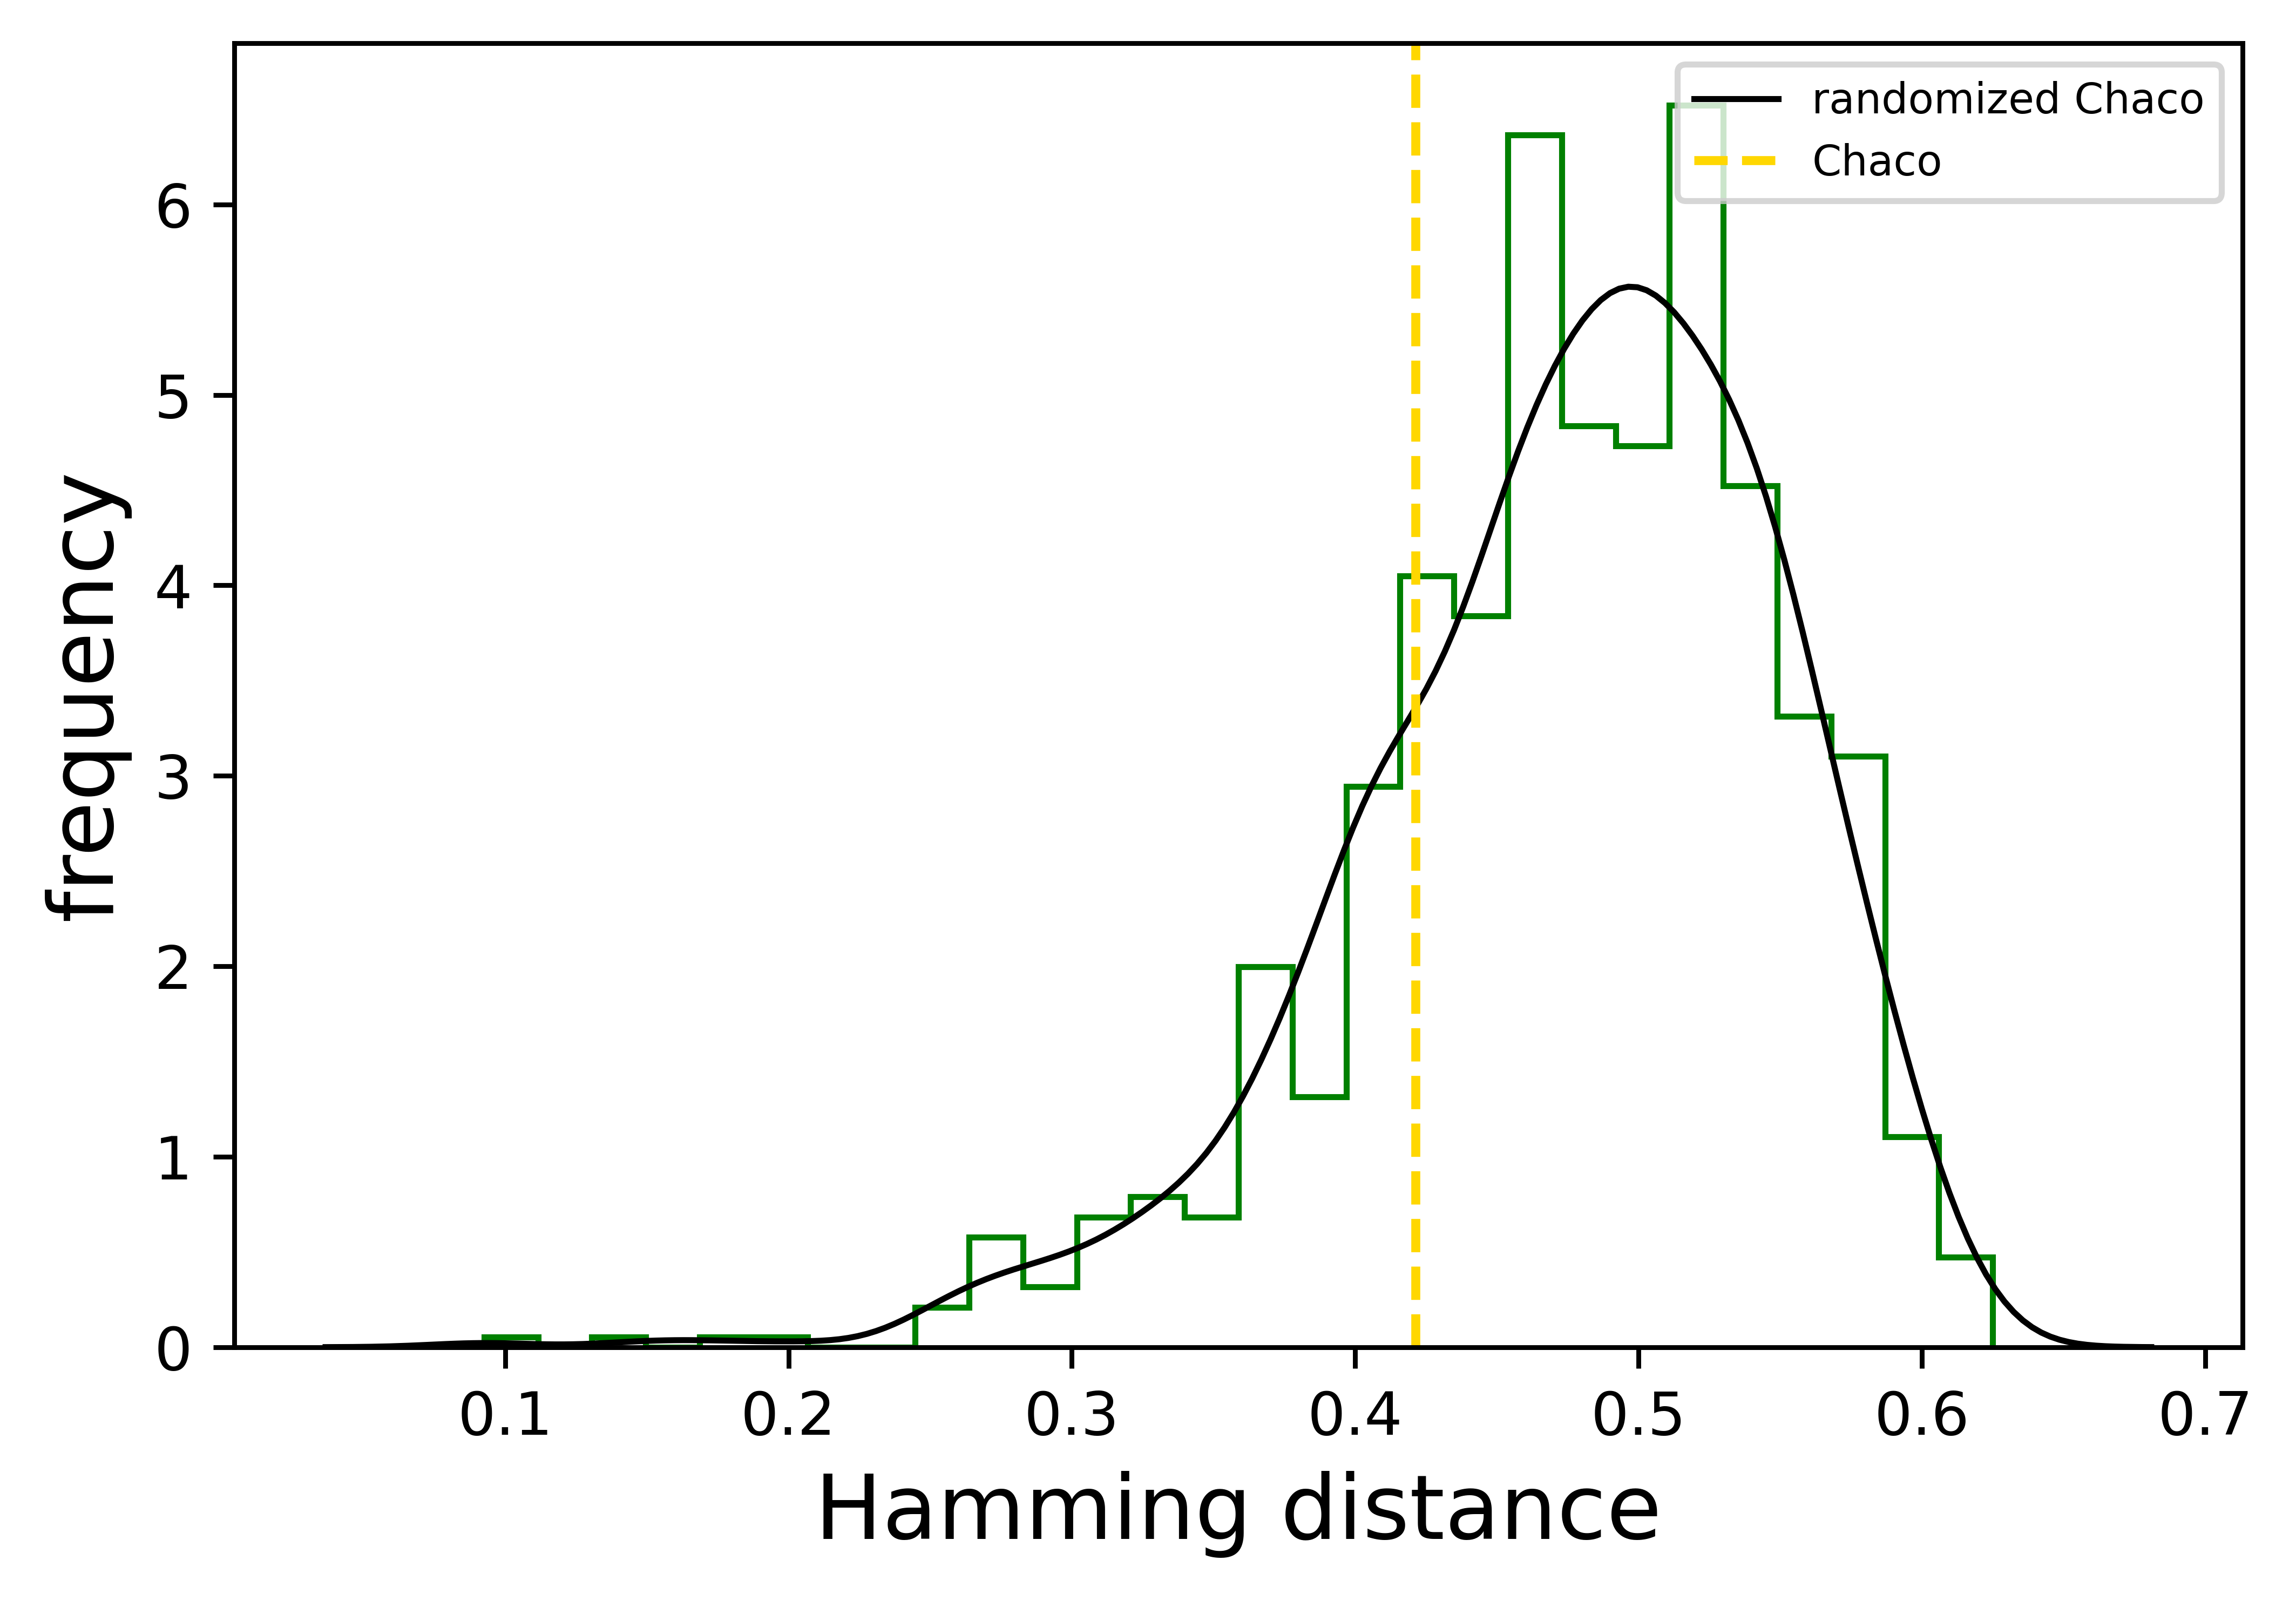

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['chaco']['chaco'] for d in distancias_area_random], distancias_area['chaco']['chaco'],alternative="less"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['chaco']['chaco'] for d in distancias_area_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Chaco"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_area['chaco']['chaco'],linestyle='--',color='gold',label=r'Chaco')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('chacovschaco.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Ttest_1sampResult(statistic=132.00618387384063, pvalue=0.0)


C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


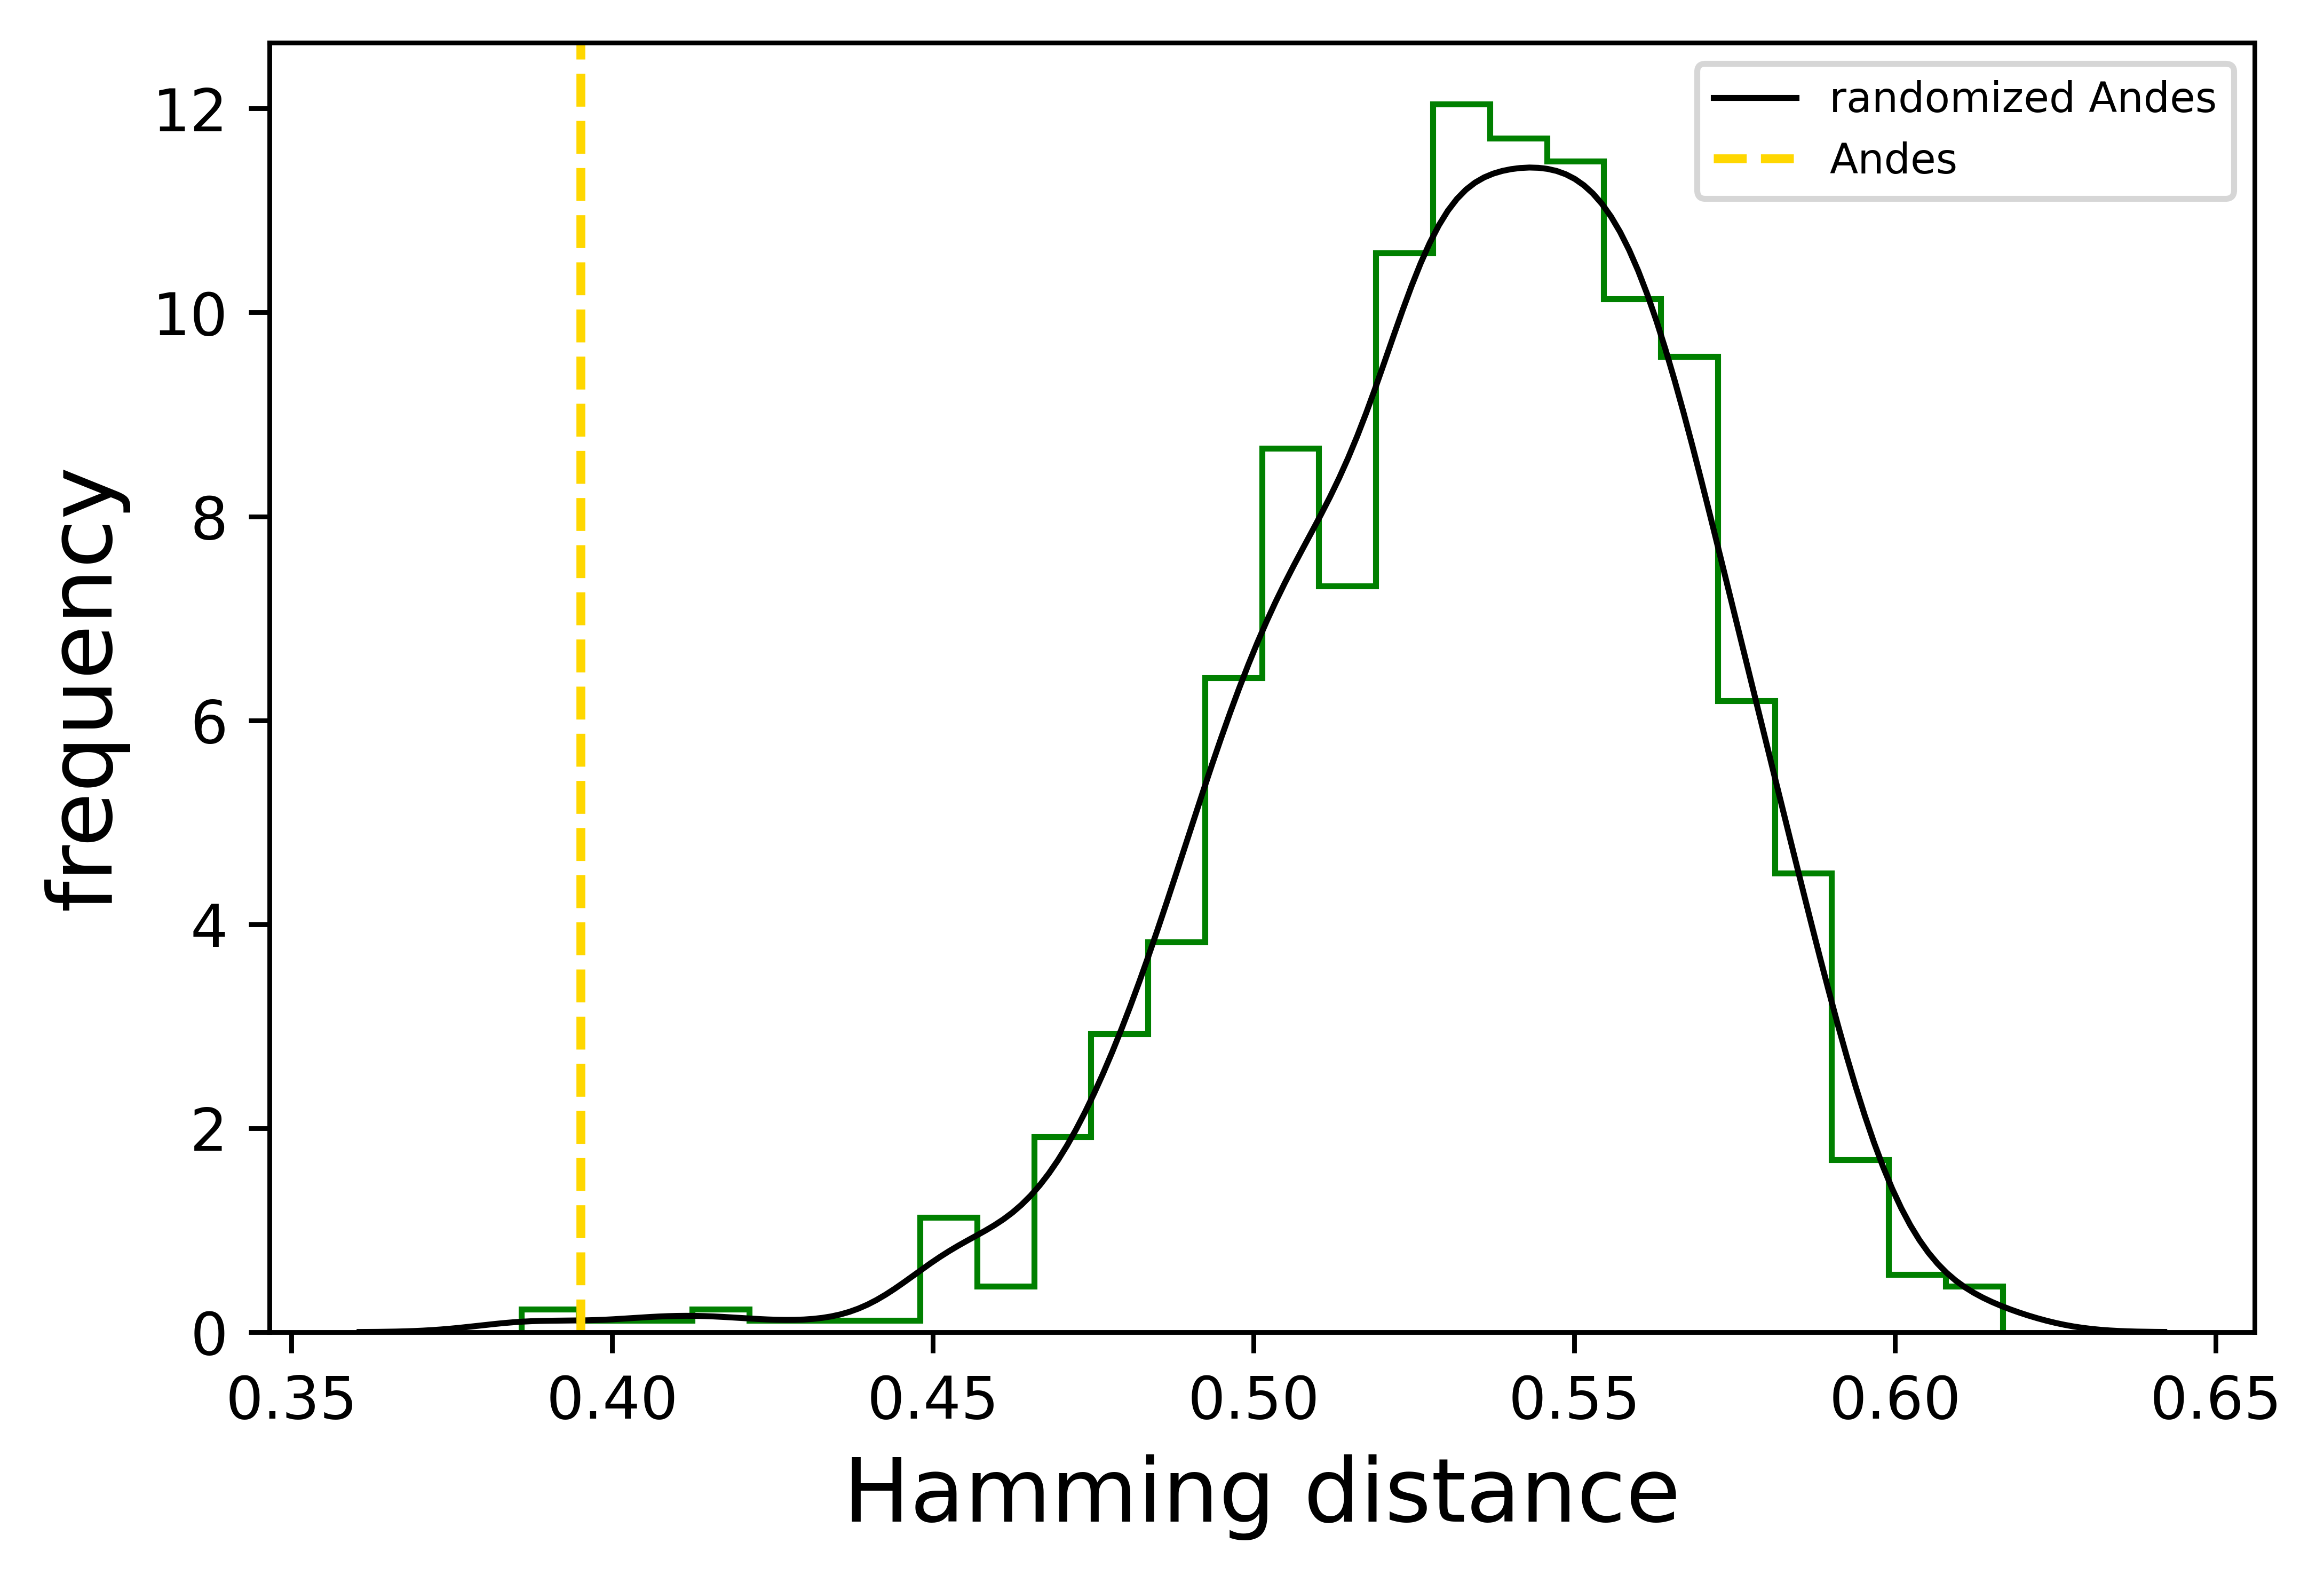

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['andes']['andes'] for d in distancias_area_random], distancias_area['andes']['andes'],alternative="greater"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['andes']['andes'] for d in distancias_area_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Andes"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_area['andes']['andes'],linestyle='--',color='gold',label=r'Andes')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('andesvsandes.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Ttest_1sampResult(statistic=-43.069353510320255, pvalue=1.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


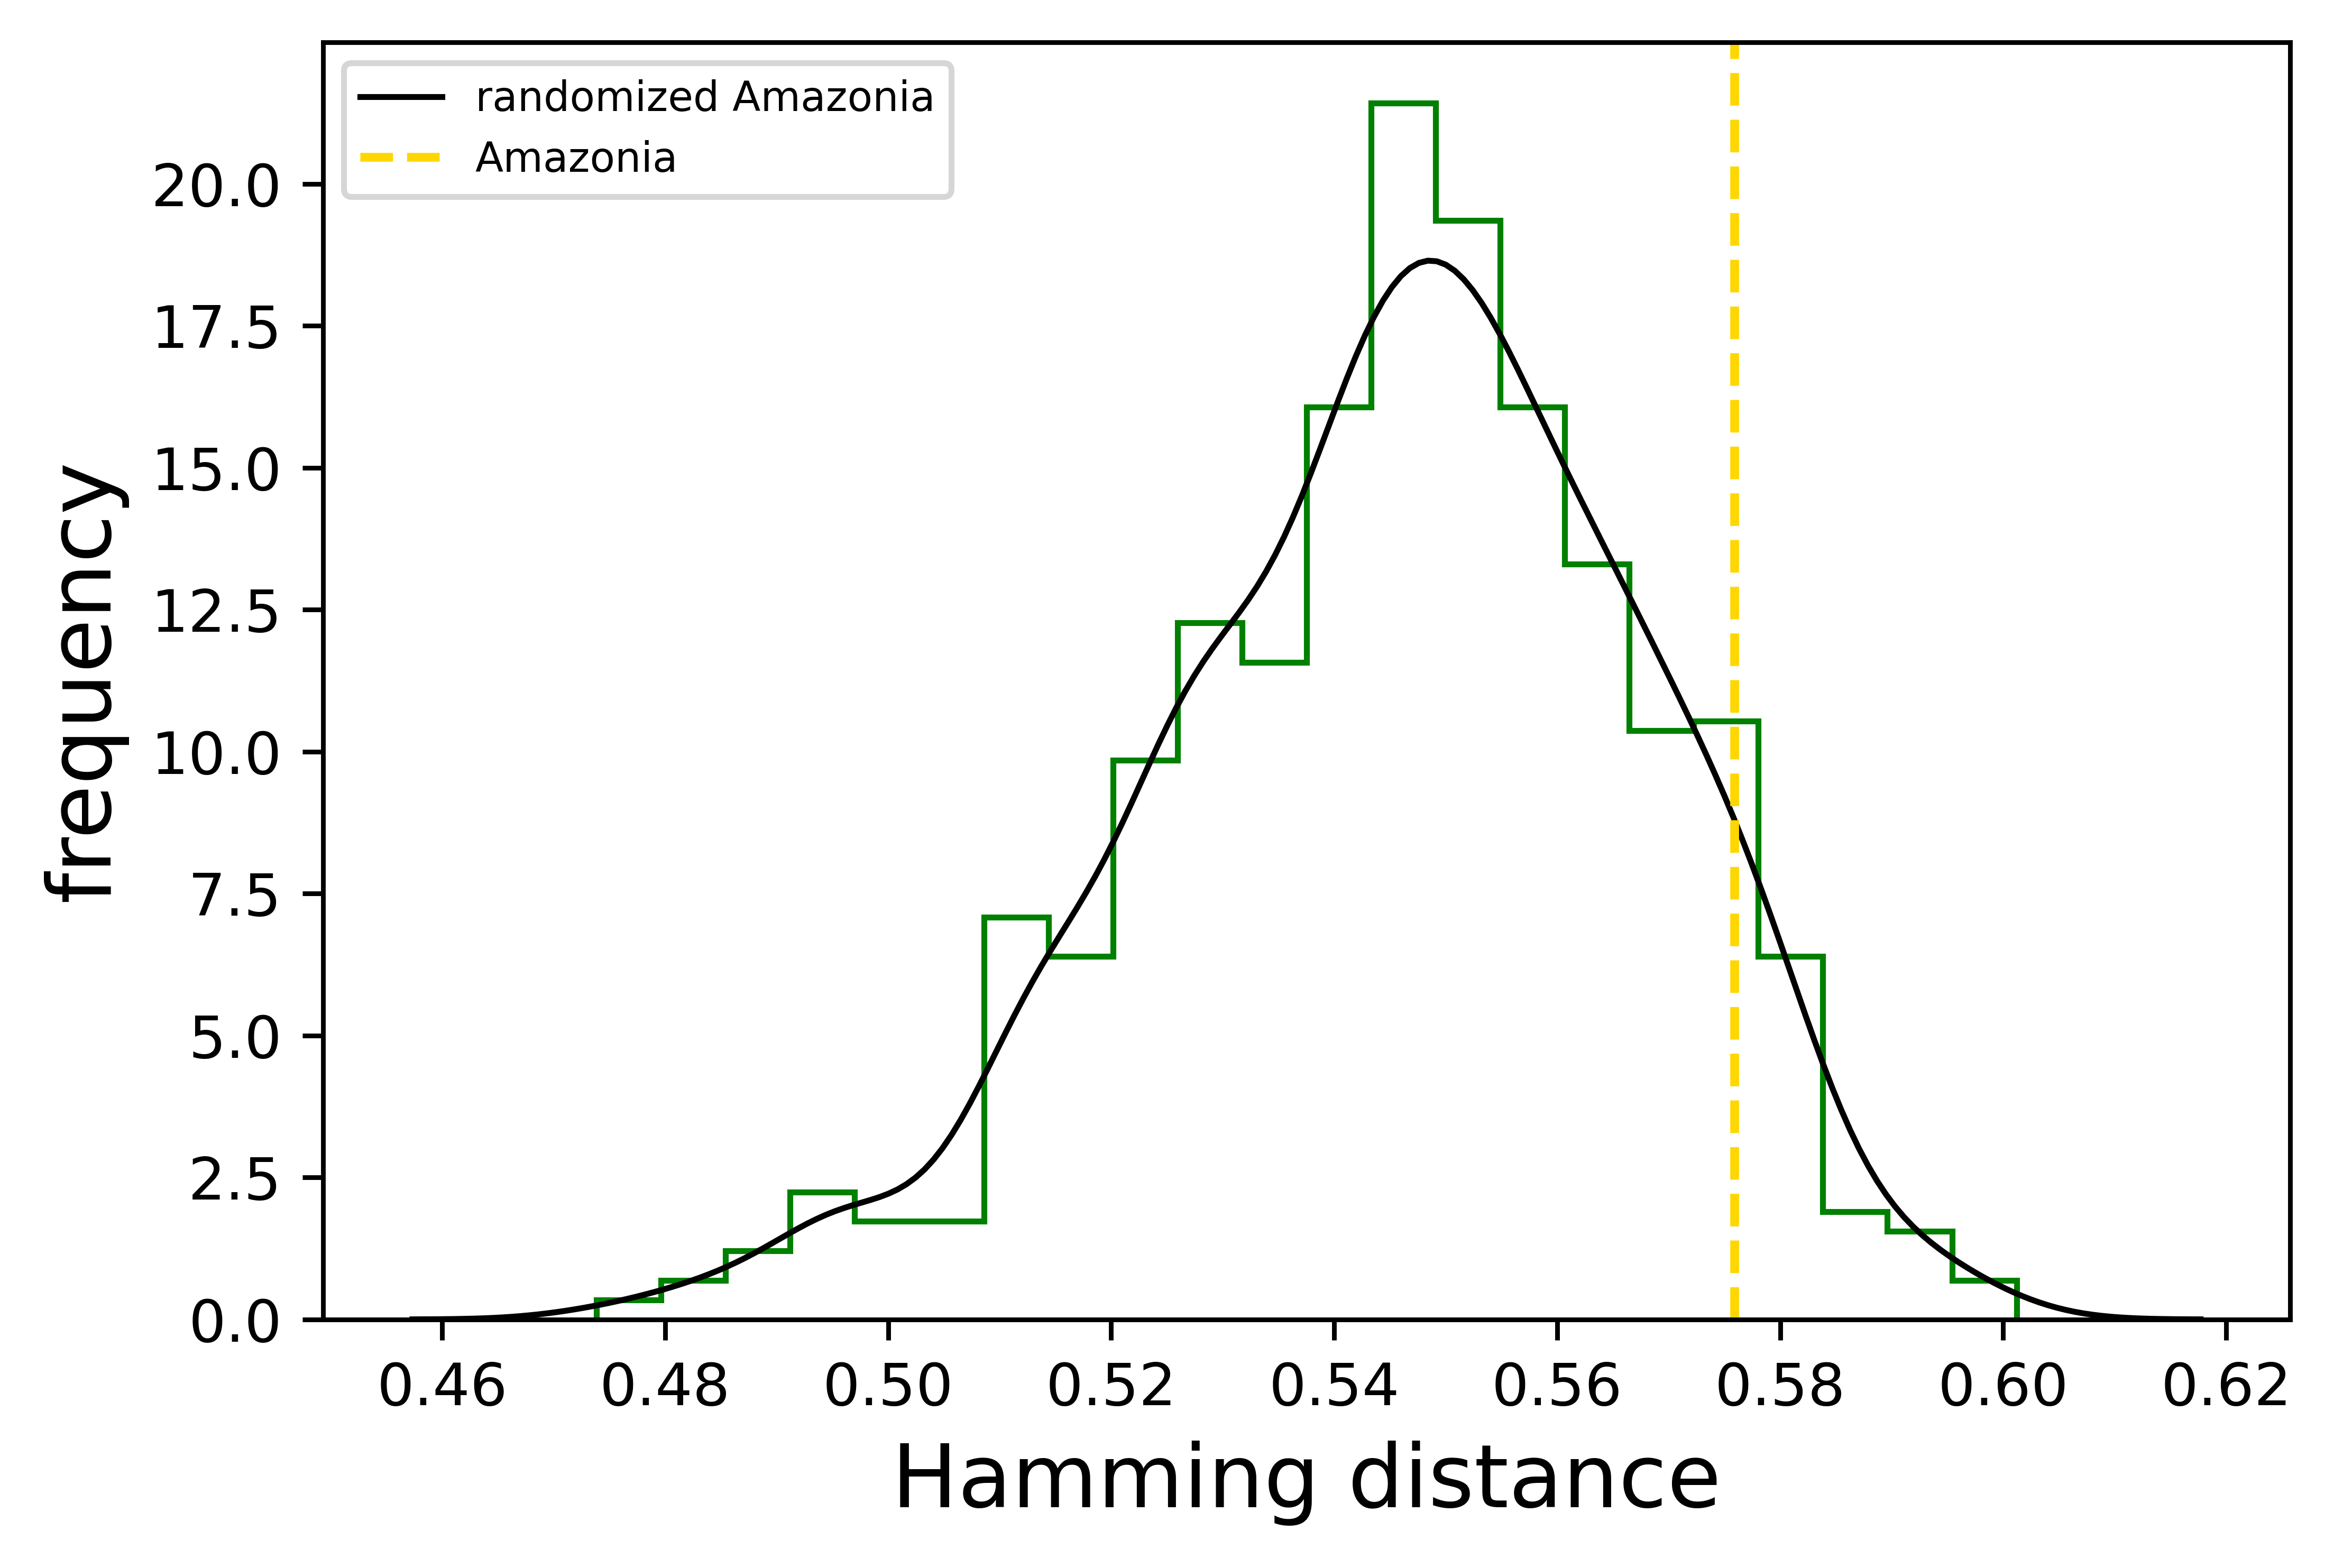

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['amazonia']['amazonia'] for d in distancias_area_random], distancias_area['amazonia']['amazonia'],alternative="greater"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['amazonia']['amazonia'] for d in distancias_area_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Amazonia"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_area['amazonia']['amazonia'],linestyle='--',color='gold',label=r'Amazonia')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('amazoniavsamazonia.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [75]:
distancias_subarea = distancias_group(group_subarea)

In [76]:
distancias_subarea

{'amazonia near': {'amazonia near': 0.47,
  'southern andes': 0.5,
  'central andes': 0.4625,
  'amazonia far': 0.5982142857142857,
  'chaco': 0.513888888888889,
  'northern andes': 0.4375,
  'patagonia': 0.6041666666666667,
  'amazonia': 0.65},
 'southern andes': {'amazonia near': 0.5,
  'southern andes': 0.375,
  'central andes': 0.5694444444444444,
  'amazonia far': 0.5267857142857143,
  'chaco': 0.45833333333333326,
  'northern andes': 0.5104166666666666,
  'patagonia': 0.6927083333333334,
  'amazonia': 0.59375},
 'central andes': {'amazonia near': 0.46249999999999997,
  'southern andes': 0.5694444444444445,
  'central andes': 0.2731481481481482,
  'amazonia far': 0.626984126984127,
  'chaco': 0.6145833333333333,
  'northern andes': 0.3854166666666667,
  'patagonia': 0.5486111111111112,
  'amazonia': 0.6822916666666666},
 'amazonia far': {'amazonia near': 0.5982142857142857,
  'southern andes': 0.5267857142857143,
  'central andes': 0.626984126984127,
  'amazonia far': 0.5433673469

In [77]:
distancias_subarea_random = [distancias_group(d) for d in subarea_random]

In [78]:
distancias_subarea_random[100]

{'amazonia': {'amazonia': 0.29166666666666663,
  'amazonia far': 0.4211309523809525,
  'amazonia near': 0.5583333333333333,
  'southern andes': 0.5677083333333333,
  'chaco': 0.4166666666666666,
  'northern andes': 0.3645833333333333,
  'central andes': 0.5833333333333333,
  'patagonia': 0.5208333333333334},
 'amazonia far': {'amazonia': 0.42113095238095244,
  'amazonia far': 0.47448979591836743,
  'amazonia near': 0.619047619047619,
  'southern andes': 0.6220238095238095,
  'chaco': 0.503968253968254,
  'northern andes': 0.4523809523809524,
  'central andes': 0.6071428571428571,
  'patagonia': 0.5580357142857143},
 'amazonia near': {'amazonia': 0.5583333333333333,
  'amazonia far': 0.6190476190476191,
  'amazonia near': 0.48,
  'southern andes': 0.5375,
  'chaco': 0.5736111111111111,
  'northern andes': 0.6125,
  'central andes': 0.5645833333333333,
  'patagonia': 0.6583333333333334},
 'southern andes': {'amazonia': 0.5677083333333334,
  'amazonia far': 0.6220238095238095,
  'amazonia

Ttest_1sampResult(statistic=174.34477811520742, pvalue=0.0)


C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


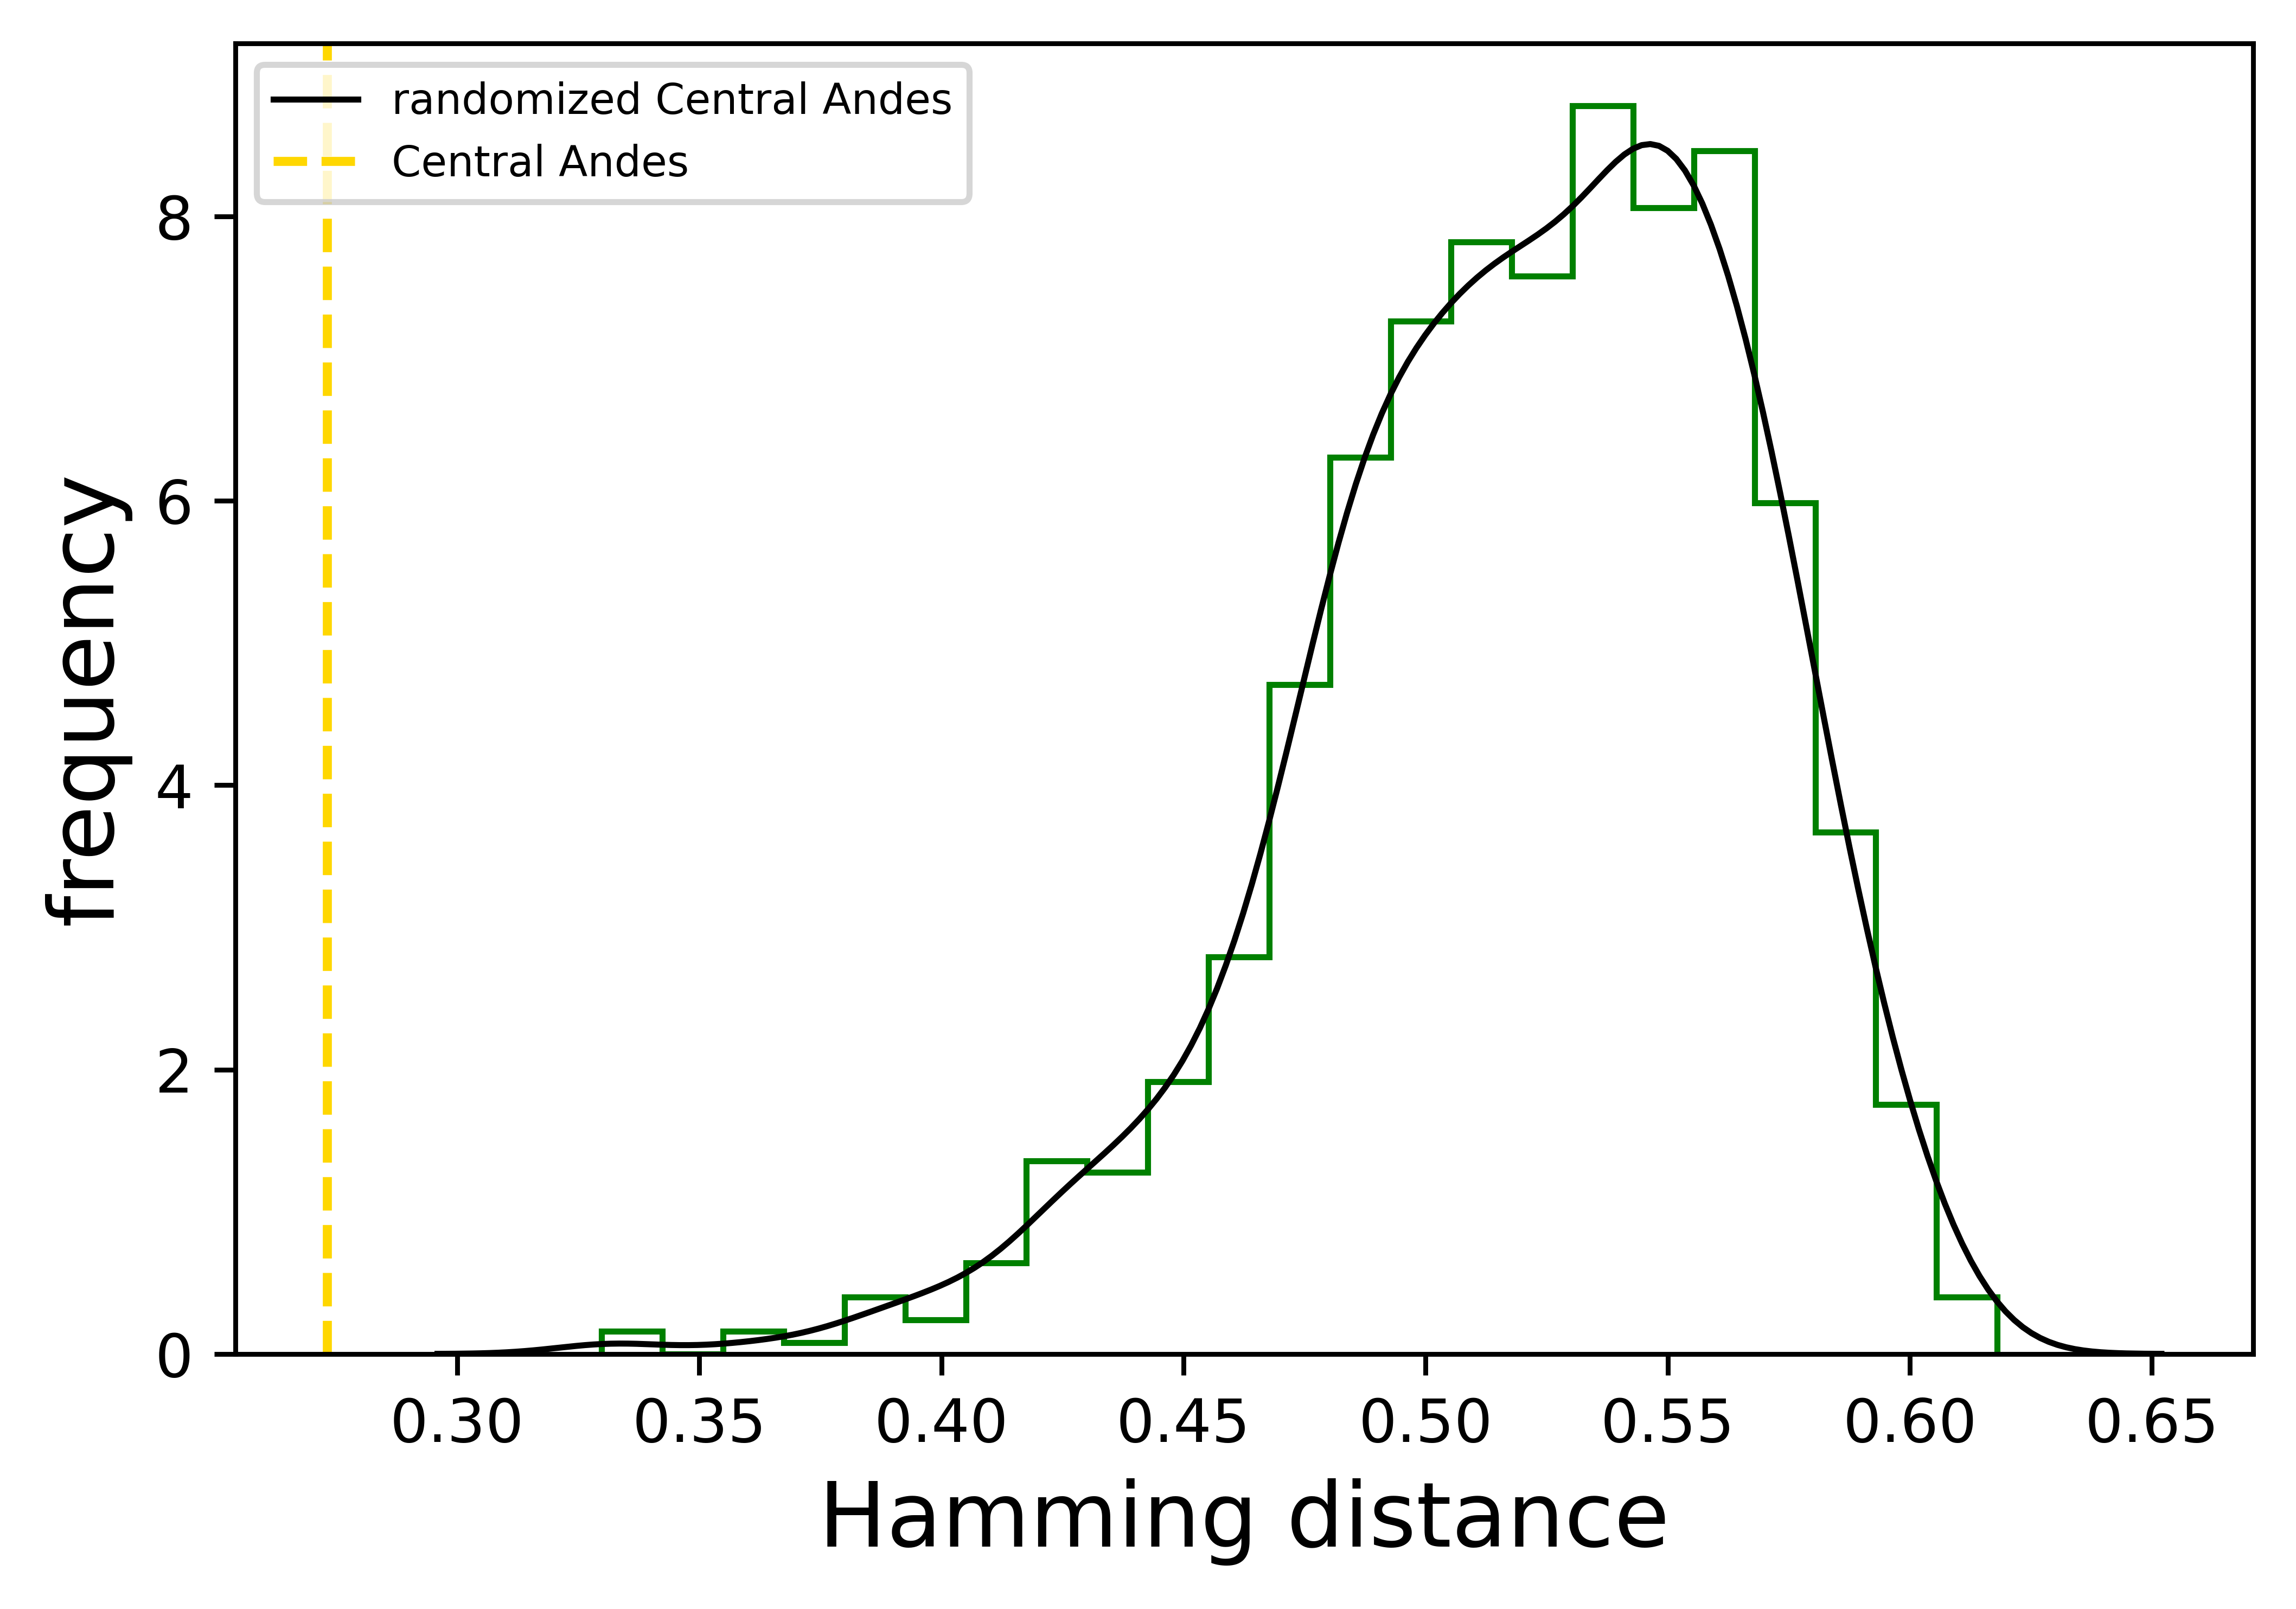

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['central andes']['central andes'] for d in distancias_subarea_random], distancias_subarea['central andes']['central andes'],alternative="greater"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['central andes']['central andes'] for d in distancias_subarea_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Central Andes"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_subarea['central andes']['central andes'],linestyle='--',color='gold',label=r'Central Andes')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('centralandes.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Ttest_1sampResult(statistic=79.20023927894344, pvalue=0.0)


C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


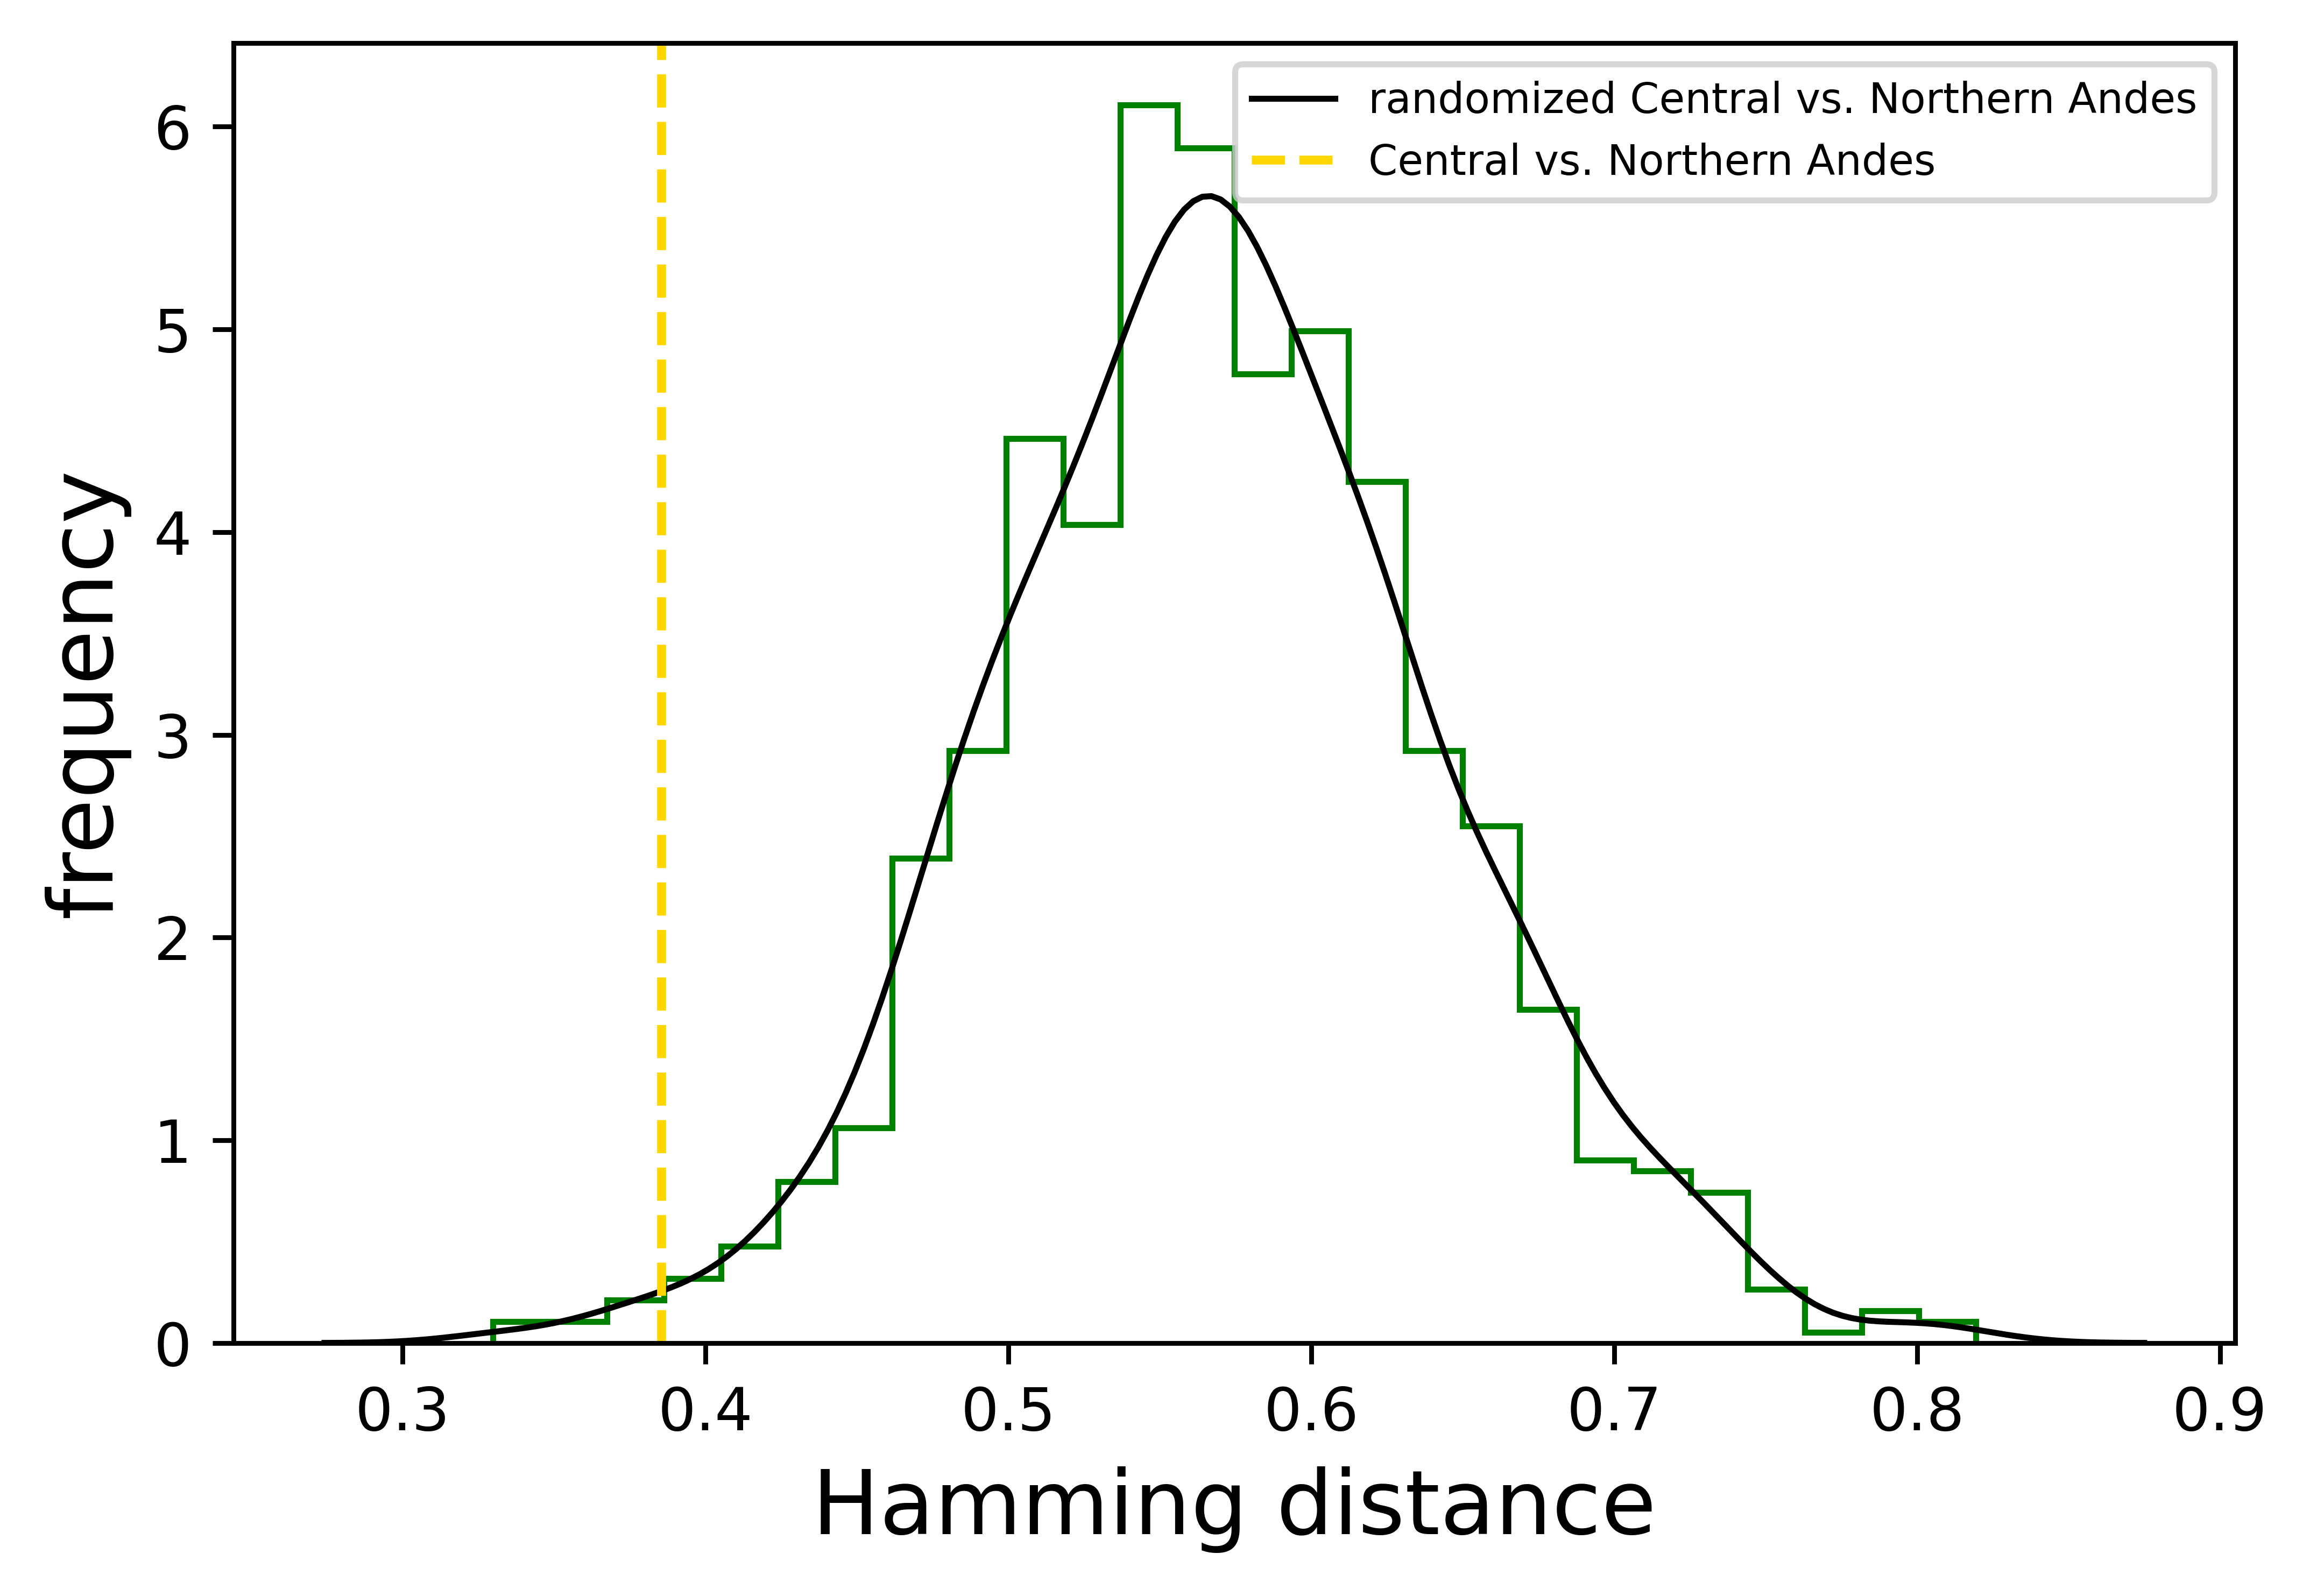

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['central andes']['northern andes'] for d in distancias_subarea_random], distancias_subarea['central andes']['northern andes'],alternative="greater"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['central andes']['northern andes'] for d in distancias_subarea_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Central vs. Northern Andes"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_subarea['central andes']['northern andes'],linestyle='--',color='gold',label=r'Central vs. Northern Andes')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('centralvsnorthernandes.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Ttest_1sampResult(statistic=-2.5608926483927177, pvalue=0.9947068366425799)


C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


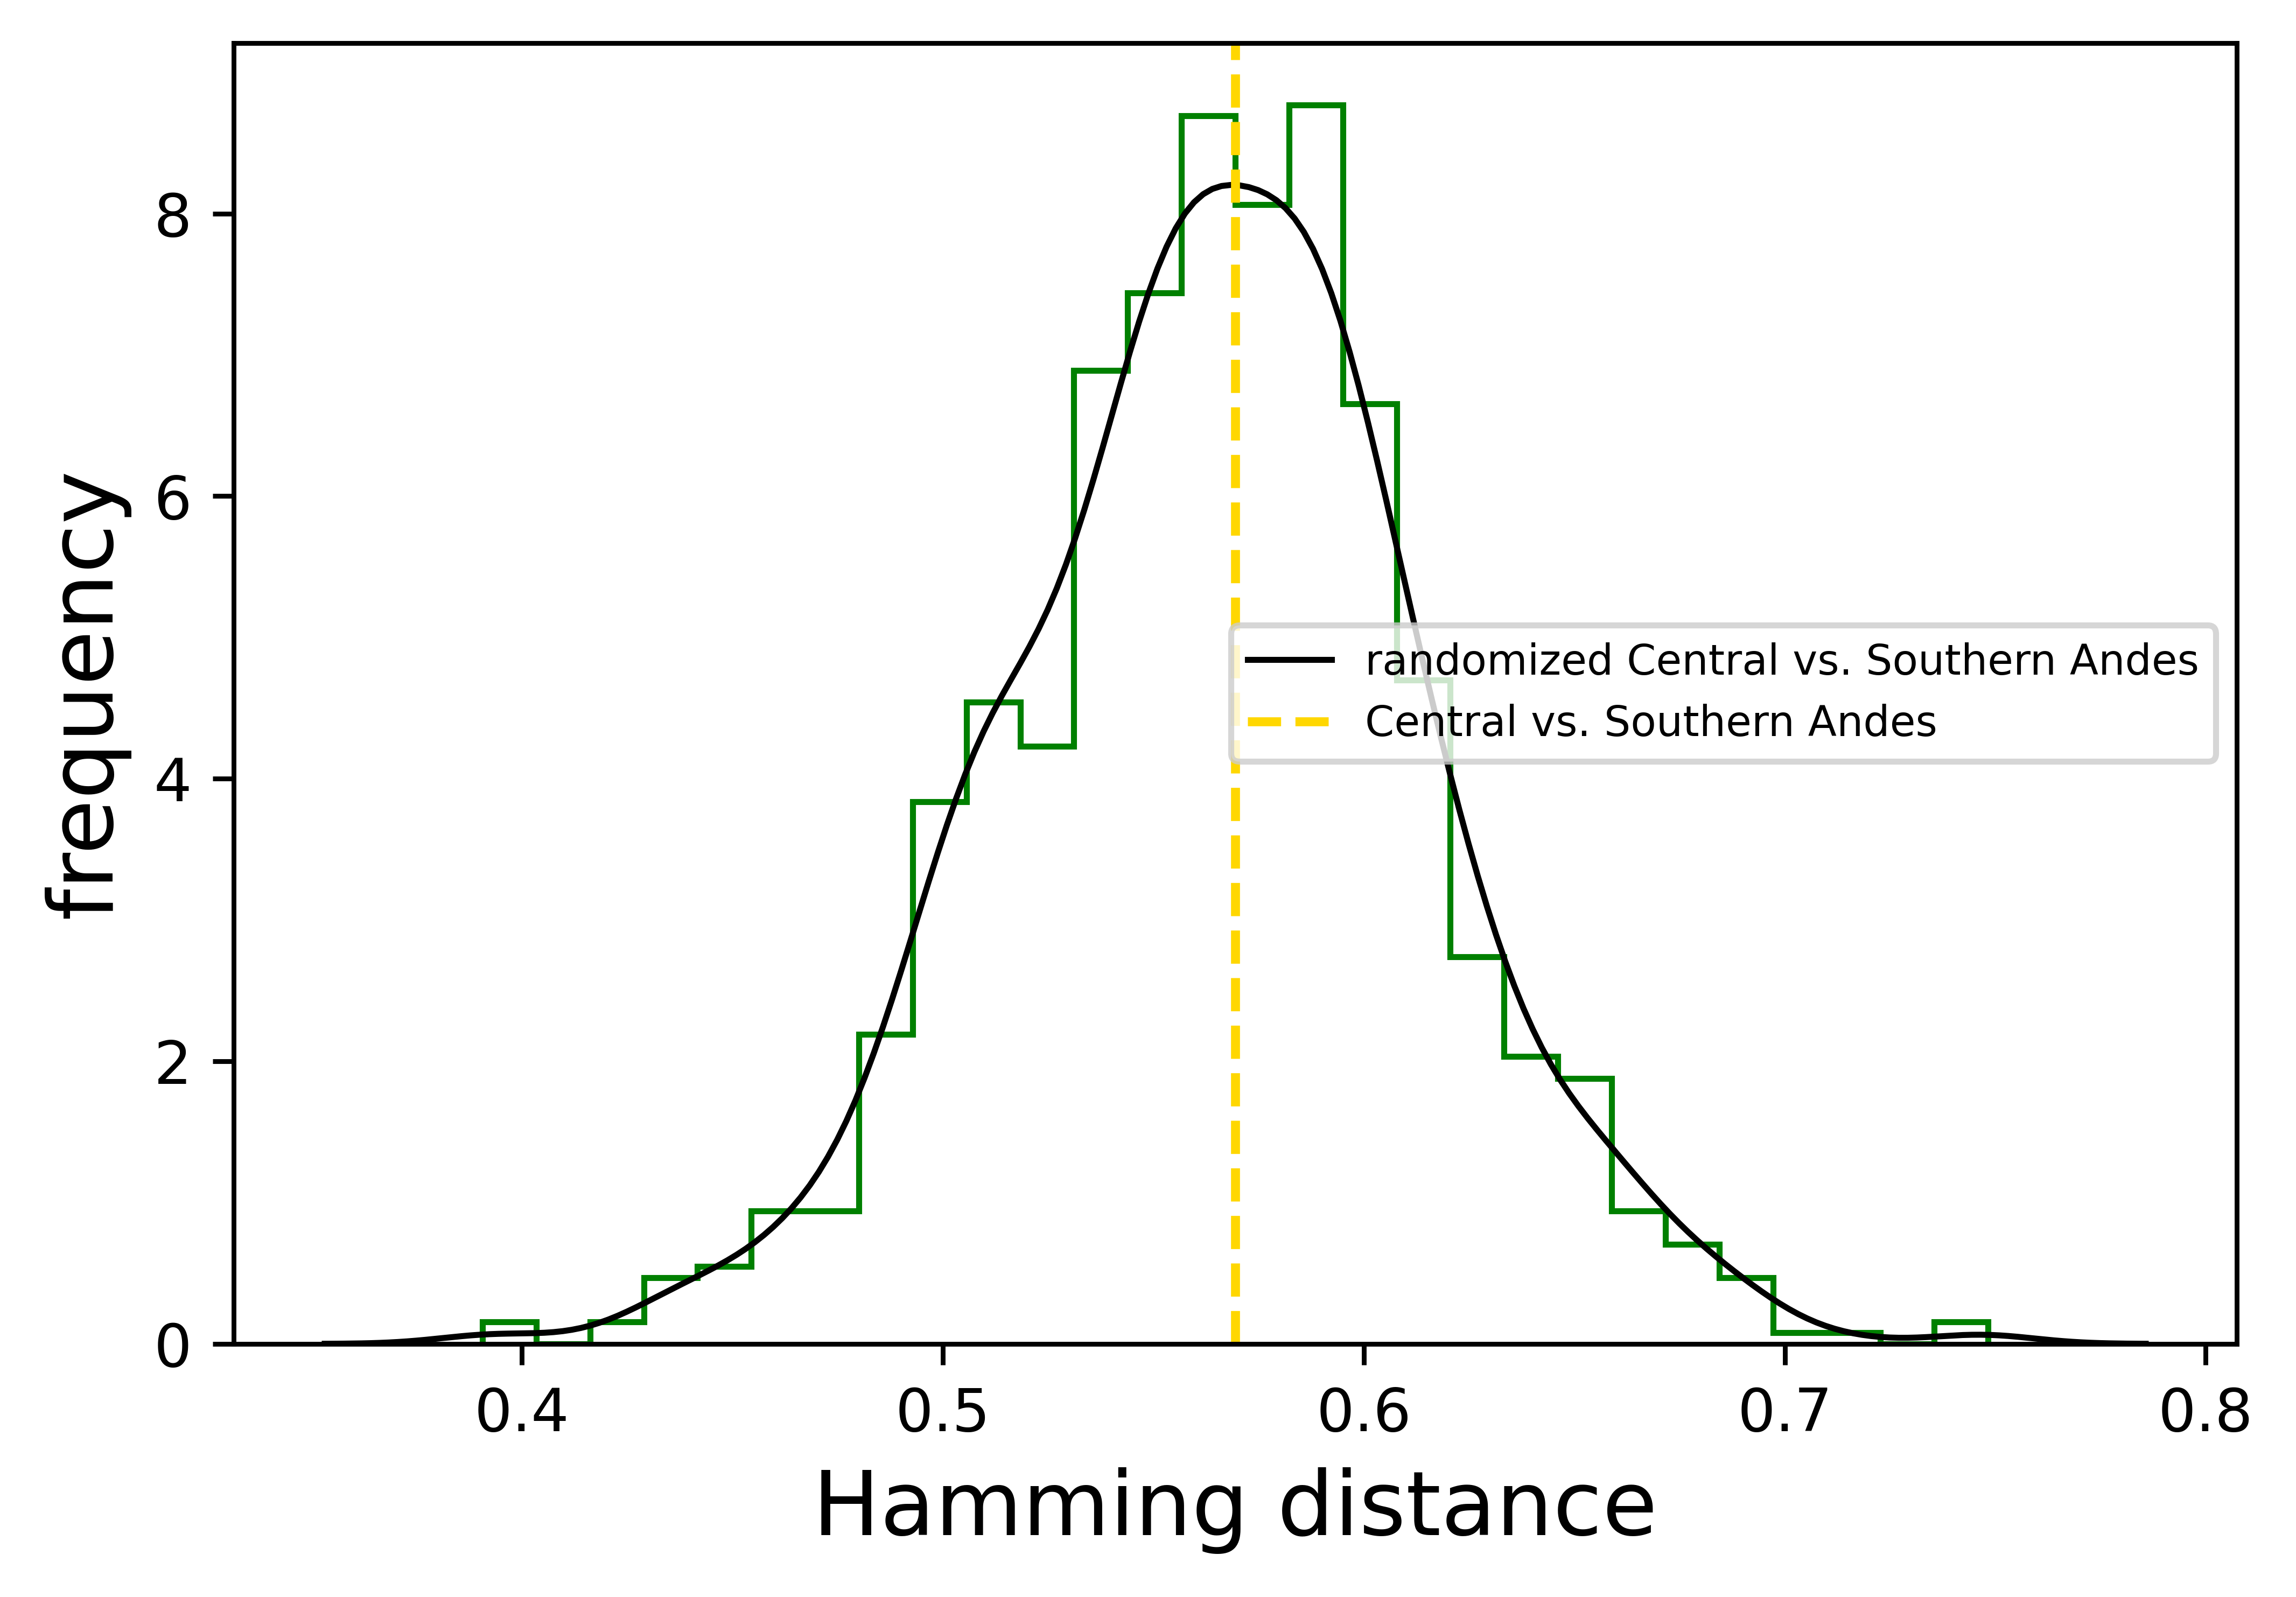

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print(stats.ttest_1samp([d['central andes']['southern andes'] for d in distancias_subarea_random], distancias_subarea['central andes']['southern andes'],alternative="greater"))

fig, ax = plt.subplots(dpi=800)
ax = sns.distplot([d['central andes']['southern andes'] for d in distancias_subarea_random],kde_kws={"color": "k", "lw": 1, "label": "randomized Central vs. Southern Andes"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})

plt.axvline(x=distancias_subarea['central andes']['southern andes'],linestyle='--',color='gold',label=r'Central vs. Southern Andes')
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'Hamming distance',fontsize=15)
plt.ylabel(r'frequency',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('centralvssouthernandes.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [82]:
D['allentiac']

{'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2}

In [83]:
D['millcayac']

{'4_2': 4, '4_3': 2, '4_4': 1, '4_1': 1}

In [46]:
D_lenguas = {lengua:{} for lengua in D.keys()}

for lengua in D.keys():
    for lengua_lengua in D.keys():
        lengua_feat = D[lengua]
        lengua_lengua_feat = D[lengua_lengua]
        D_lenguas[lengua][lengua_lengua]=hamming(lengua,lengua_lengua)

In [47]:
D_lenguas

{'mapudungun': {'mapudungun': 0.0,
  'ancash quechua': 0.0,
  'cajamarca quechua': 0.75,
  'ecuadorian quechua': 0.5,
  'ayacucho quechua': 0.75,
  'aymara': 1.0,
  'jaqaru': 0.75,
  'chipaya': 0.75,
  'uchumataqu': 0.6666666666666666,
  'cholon': 0.25,
  'mochica': 0.6666666666666666,
  'kunza': 0.0,
  'millcayac': 0.5,
  'allentiac': 0.5,
  'selknam': 0.75,
  'yahgan': 0.6666666666666666,
  'pilaga': 0.3333333333333333,
  'wichi': 0.5,
  'ayoreo': 0.75,
  'tapiete': 0.0,
  'kawesqar': 0.6666666666666666,
  'tehuelche': 0.75,
  'secoya': 1.0,
  'urarina': 0.0,
  'yanesha': 0.75,
  'tariana': 0.5,
  'tucano': 0.0,
  'yauyos quechua': 0.75,
  'puquina': 0.5,
  'lule': 0.5,
  'vilela': 0.0,
  'santiago del estero quechua': 0.5,
  'pacaraos quechua': 0.75,
  'kokama': 0.5,
  'gaviao': 0.5,
  'tiriyo': 0.5,
  'kalapalo': 0.75,
  'karaja': 0.75,
  'apinaye': 0.75,
  'kashibo-kakataibo': 1.0,
  'matses': 0.25,
  'shiwilu': 0.0,
  'cavineña': 0.5,
  'sanuma': 0.75,
  'hup': 0.5,
  'kulina': 0

In [85]:
D_andinas = {lengua:{} for lengua in group_area['andes']}

for lengua in group_area['andes']:
    for lengua_lengua in group_area['andes']:
        lengua_feat = D[lengua]
        lengua_lengua_feat = D[lengua_lengua]
        D_andinas[lengua][lengua_lengua]=hamming(lengua,lengua_lengua)

In [86]:
D_andinas['mapudungun']

{'allentiac': 0.5,
 'ancash quechua': 0.0,
 'ayacucho quechua': 0.75,
 'aymara': 1.0,
 'cajamarca quechua': 0.75,
 'chipaya': 0.75,
 'cholon': 0.25,
 'ecuadorian quechua': 0.5,
 'jaqaru': 0.75,
 'kunza': 0.0,
 'mapudungun': 0.0,
 'millcayac': 0.5,
 'mochica': 0.6666666666666666,
 'pacaraos quechua': 0.75,
 'puquina': 0.5,
 'santiago del estero quechua': 0.5,
 'uchumataqu': 0.6666666666666666,
 'yauyos quechua': 0.75}

In [87]:
## en X guardamos todas las listas de rasgos

X=[]
for language in D_lenguas.keys():
    X+=[list(D_lenguas[language].values())]

In [88]:
## en X guardamos todas las listas de rasgos

X_and=[]
for language in D_andinas.keys():
    X_and+=[list(D_andinas[language].values())]

In [89]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=15, random_state=0, metric='precomputed',square_distances=True)
X = model.fit_transform(X)

C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [90]:
model = TSNE(n_components=2, perplexity=5, random_state=0, metric='precomputed',square_distances=True)
X_and = model.fit_transform(X_and)

C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\fneir\anaconda3\envs\geo_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [91]:
#from sklearn.decomposition import PCA
#transformer = PCA(n_components=3)
#X = transformer.fit_transform(X)

In [92]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [93]:
x_and=list(zip(*list(X_and)))[0]
y_and=list(zip(*list(X_and)))[1]

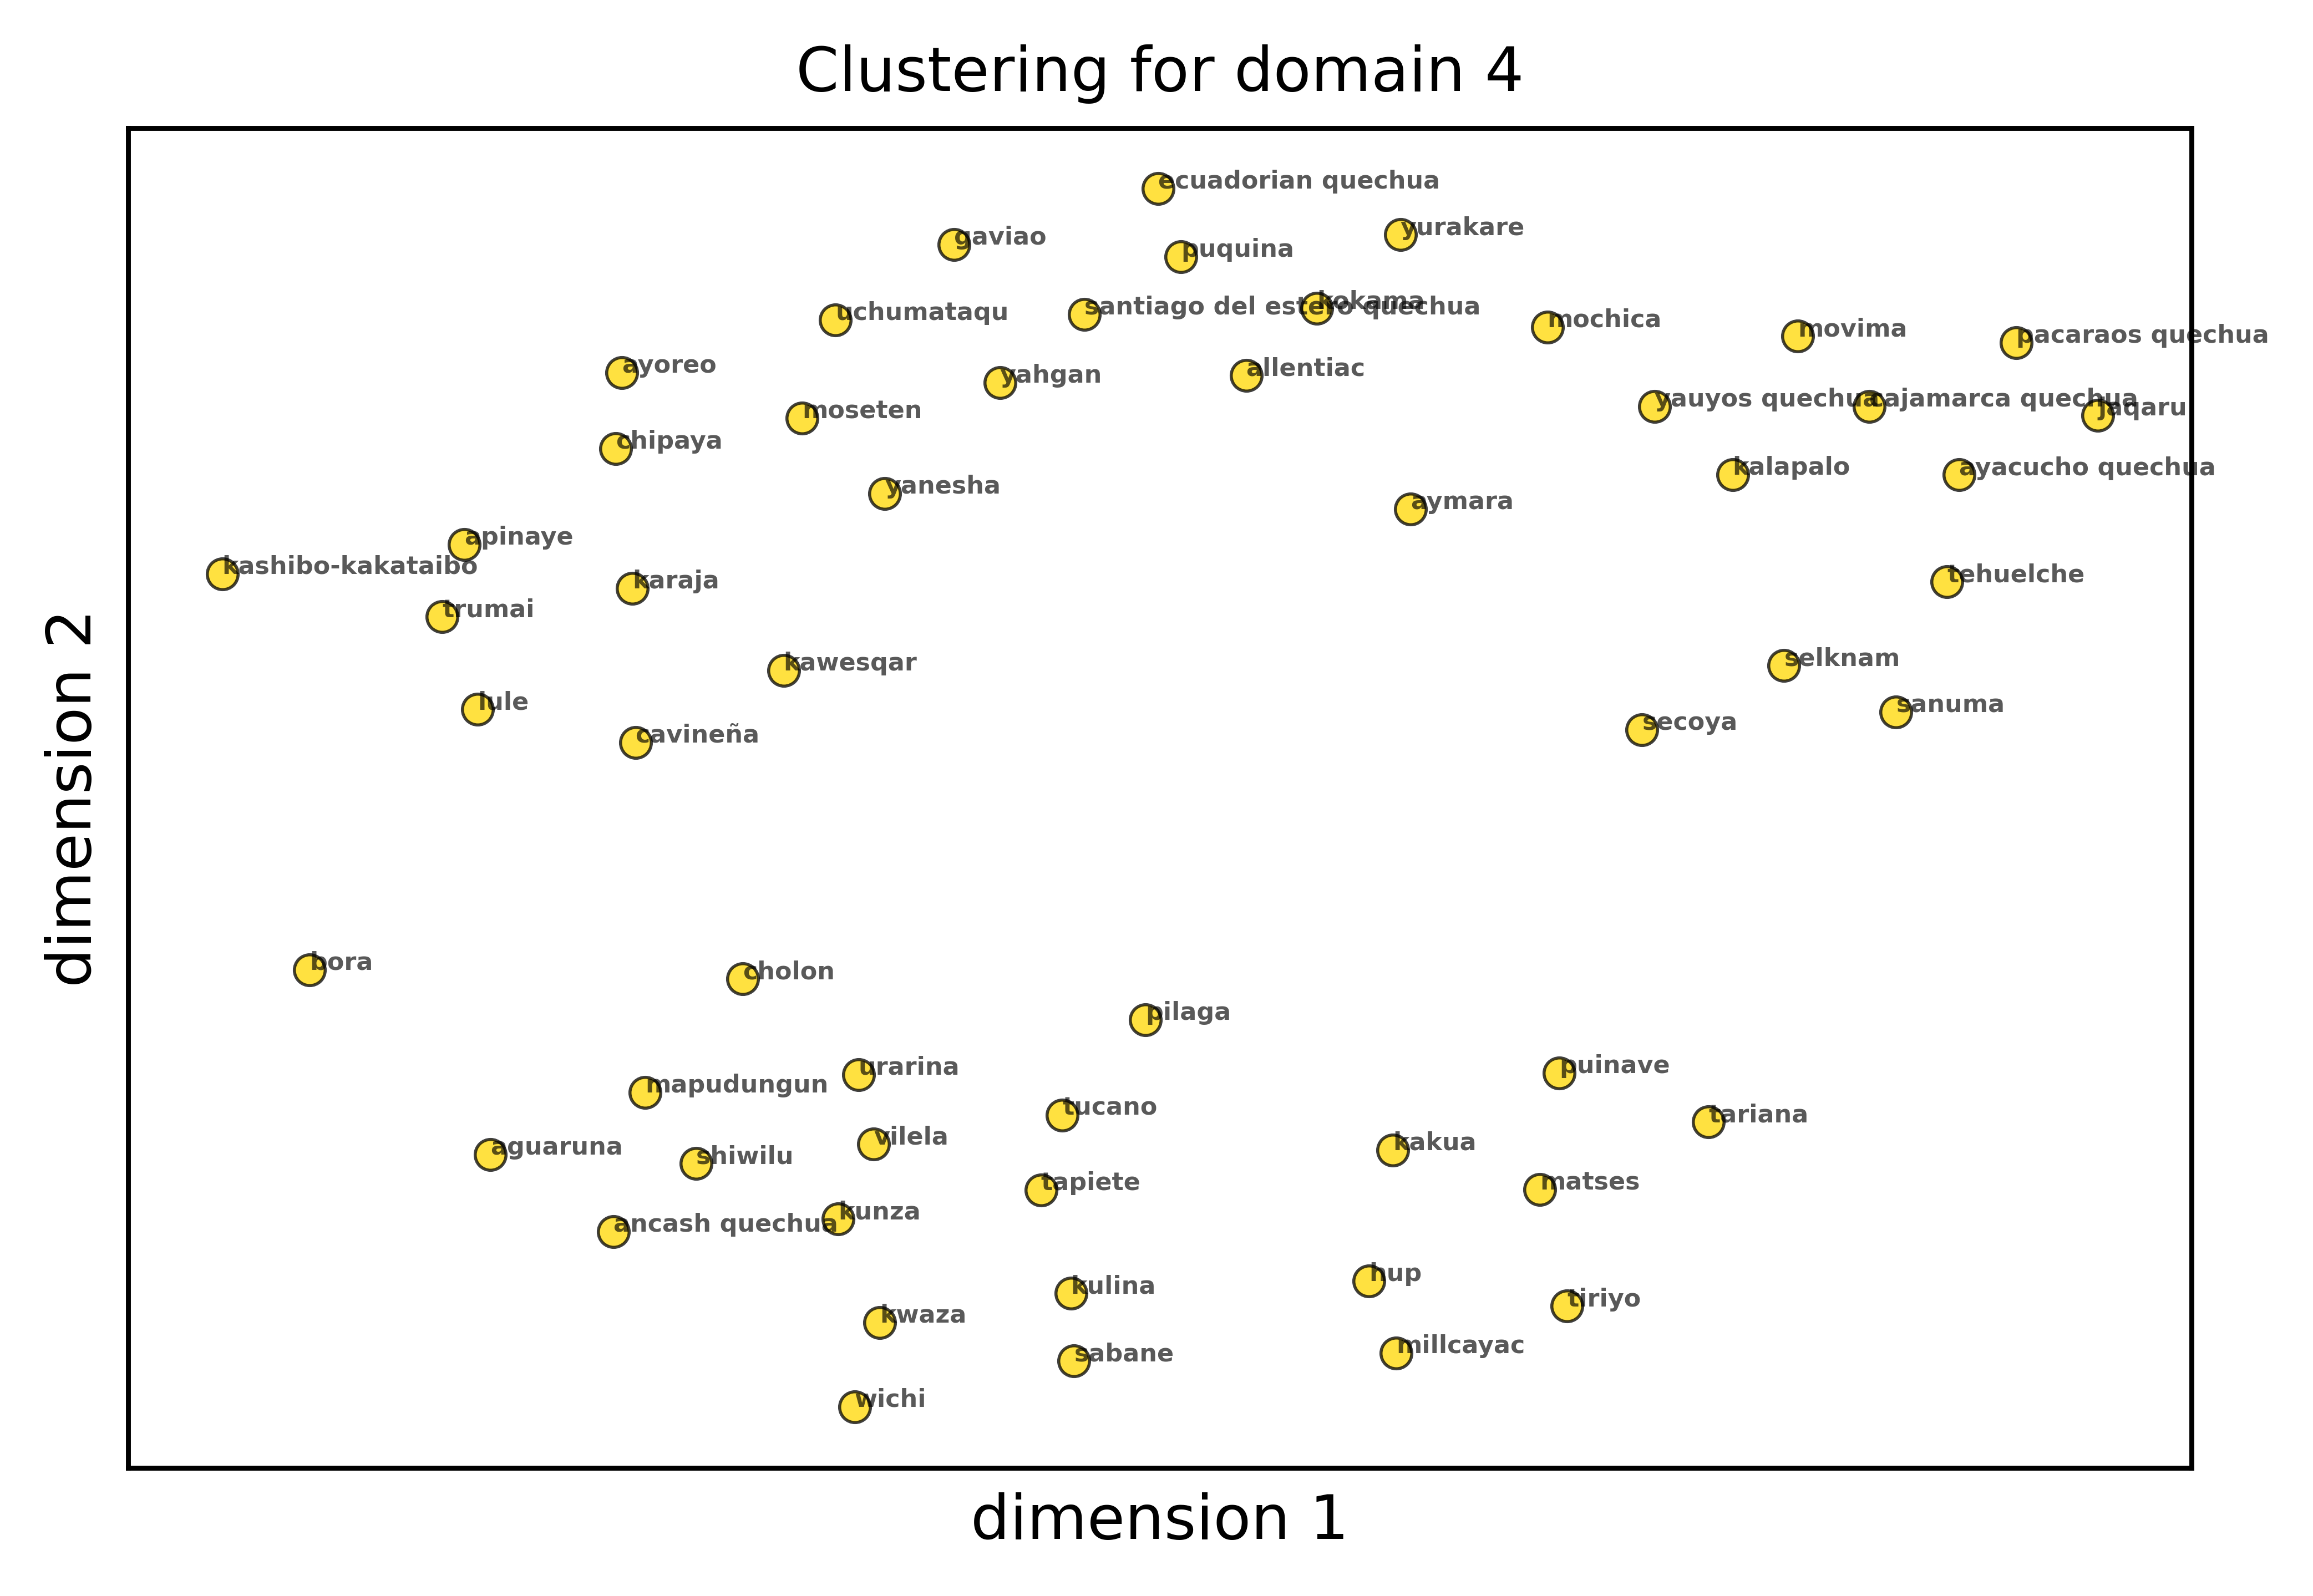

In [94]:
dominio_number=4

import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(x)):
    ax.annotate(list(D.keys())[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys()]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys()]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],'o',color='lime',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='North America')

plt.grid(False)
plt.title('Clustering for domain '+str(dominio_number),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('2D/PCA_'+str(dominio_number)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

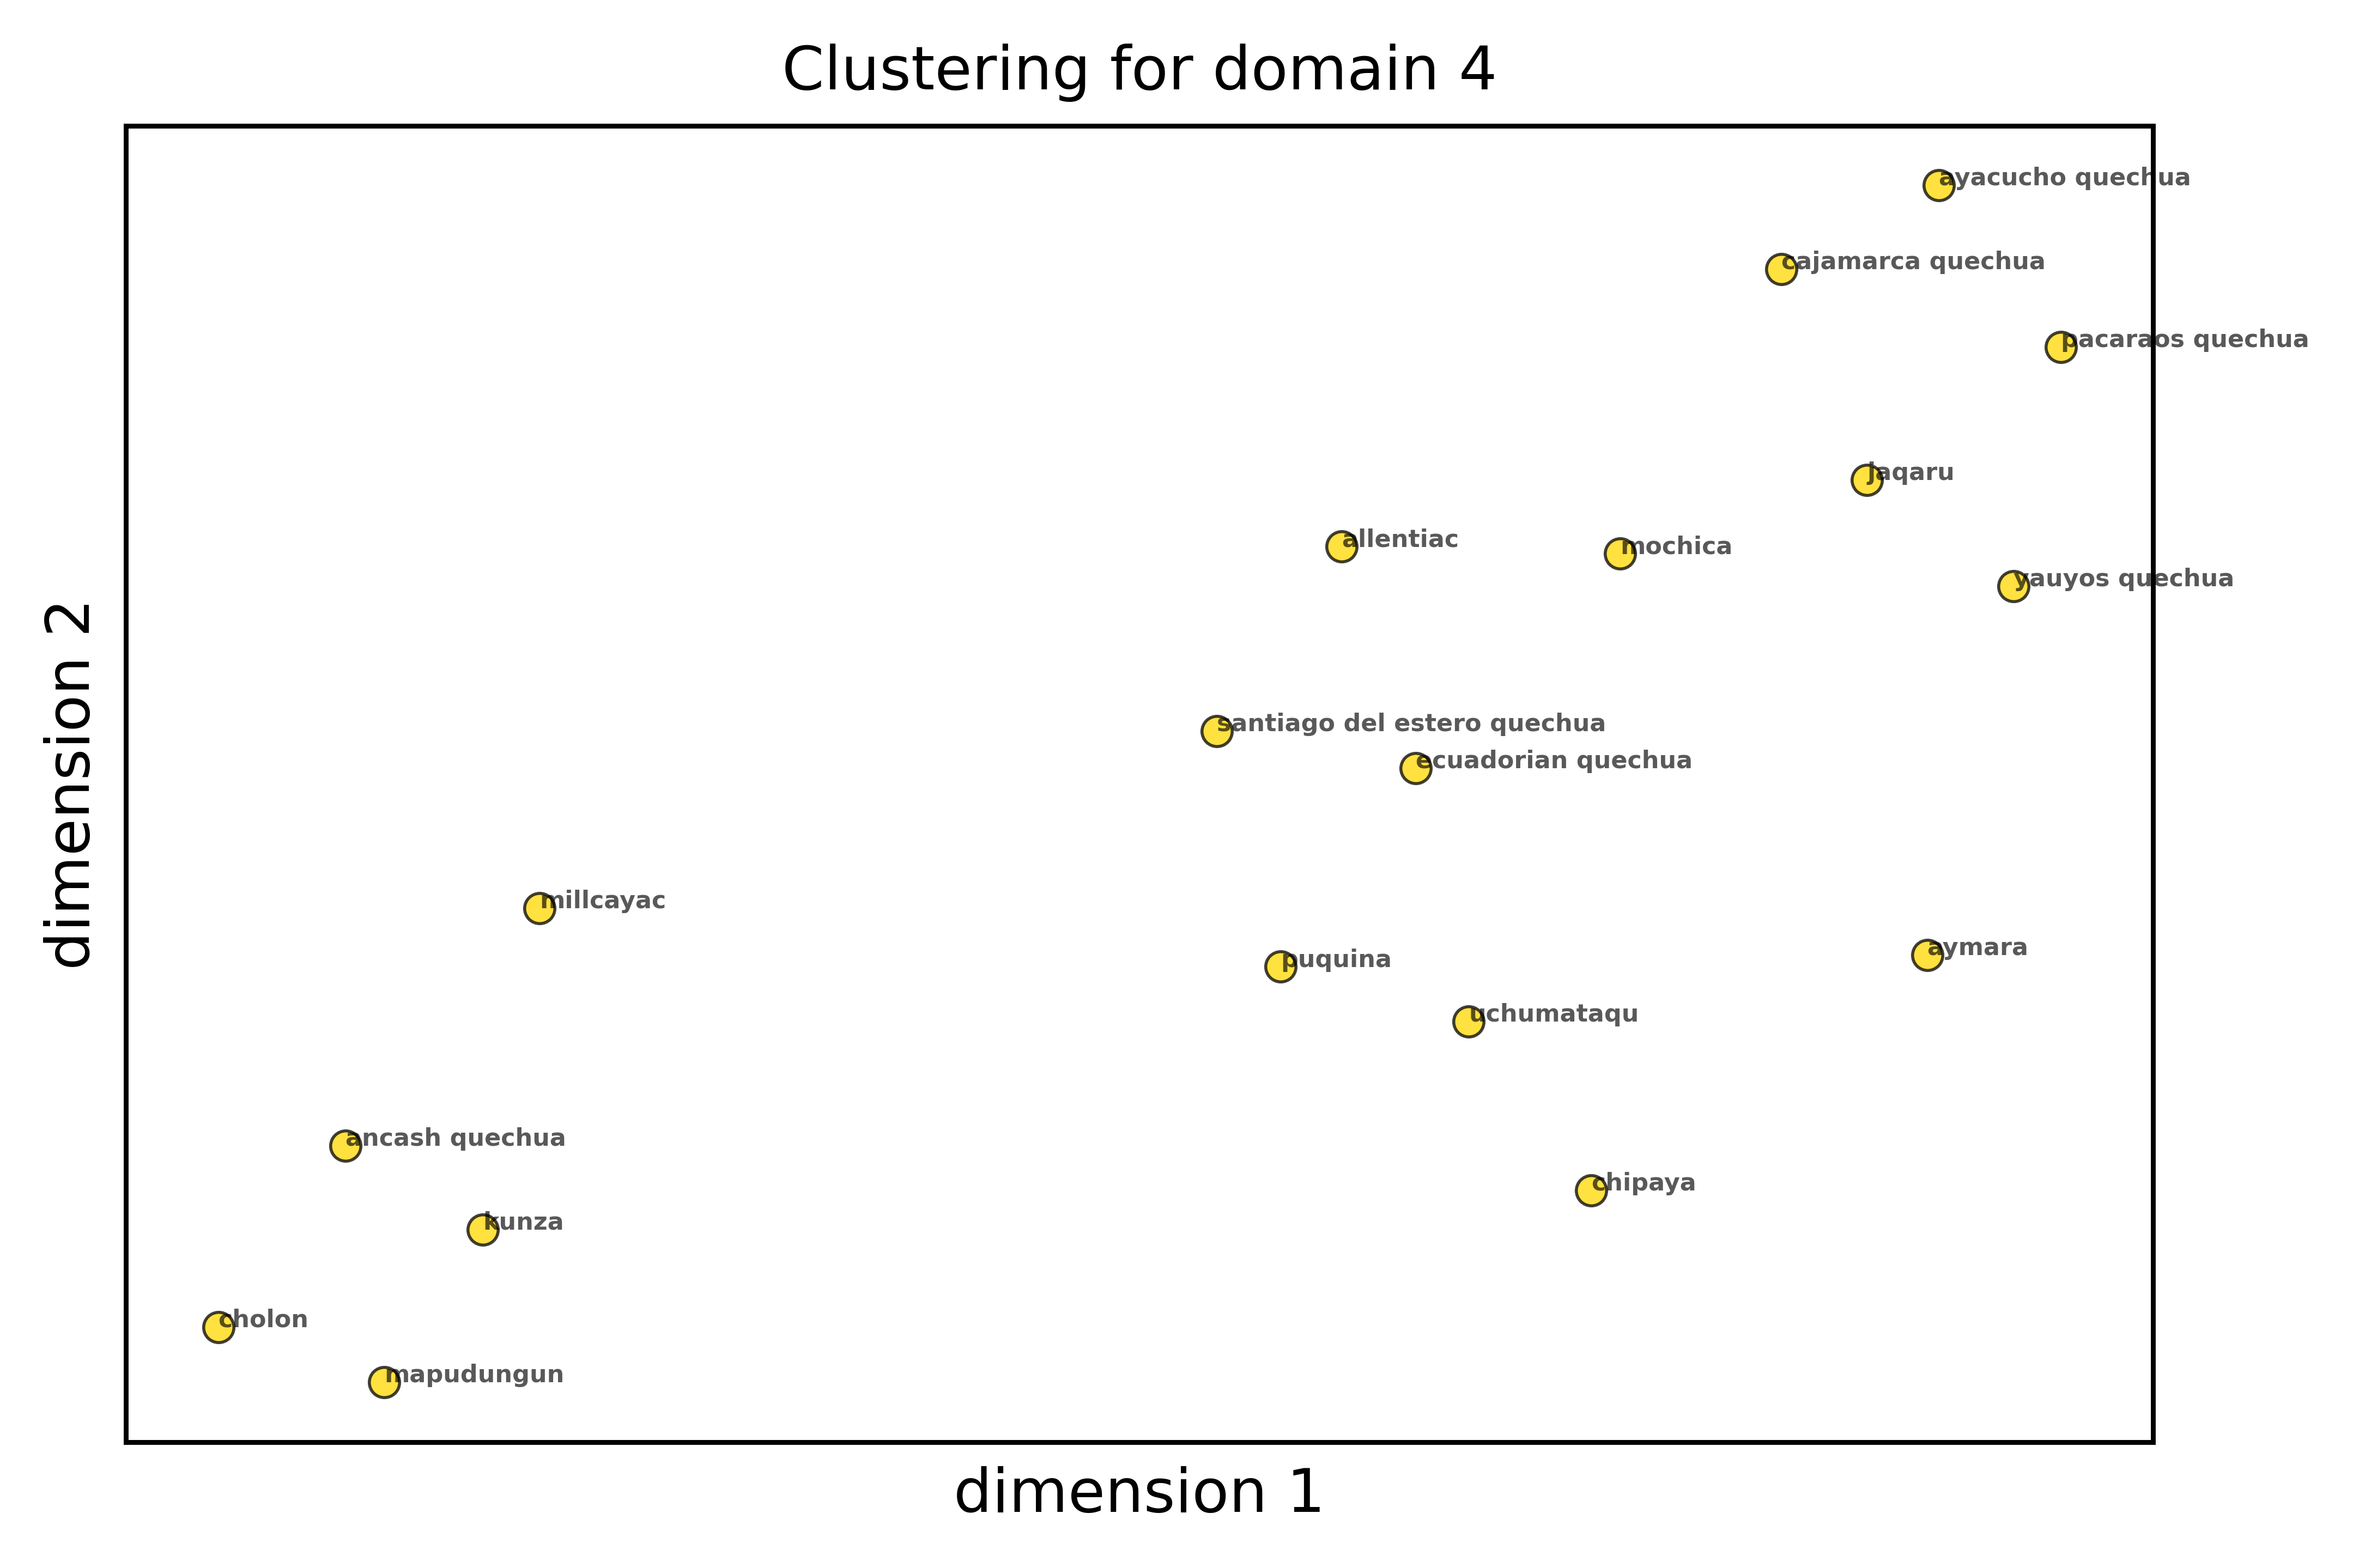

In [95]:
dominio_number=4

import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(x_and)):
    ax.annotate(list(D_andinas.keys())[i], weight='demi', color='k', xy=(x_and[i],y_and[i]), fontsize=4, alpha=0.65)
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot([x_and[i] for i in [list(D_andinas.keys()).index(language) for language in D_andinas.keys()]],[y_and[i] for i in [list(D_andinas.keys()).index(language) for language in D_andinas.keys()]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],'o',color='lime',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='North America')

plt.grid(False)
plt.title('Clustering for domain '+str(dominio_number),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('2D/PCA_'+str(dominio_number)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [108]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
S = []
for n_clusters in range_n_clusters:
    
    cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = cluster.labels_
    silhouette_avg = silhouette_score(X, labels)
    S.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6202143
For n_clusters = 3 The average silhouette_score is : 0.5061181
For n_clusters = 4 The average silhouette_score is : 0.52160865
For n_clusters = 5 The average silhouette_score is : 0.4150912
For n_clusters = 6 The average silhouette_score is : 0.4147926
For n_clusters = 7 The average silhouette_score is : 0.43080497
For n_clusters = 8 The average silhouette_score is : 0.42486116
For n_clusters = 9 The average silhouette_score is : 0.39467192
For n_clusters = 10 The average silhouette_score is : 0.3832042


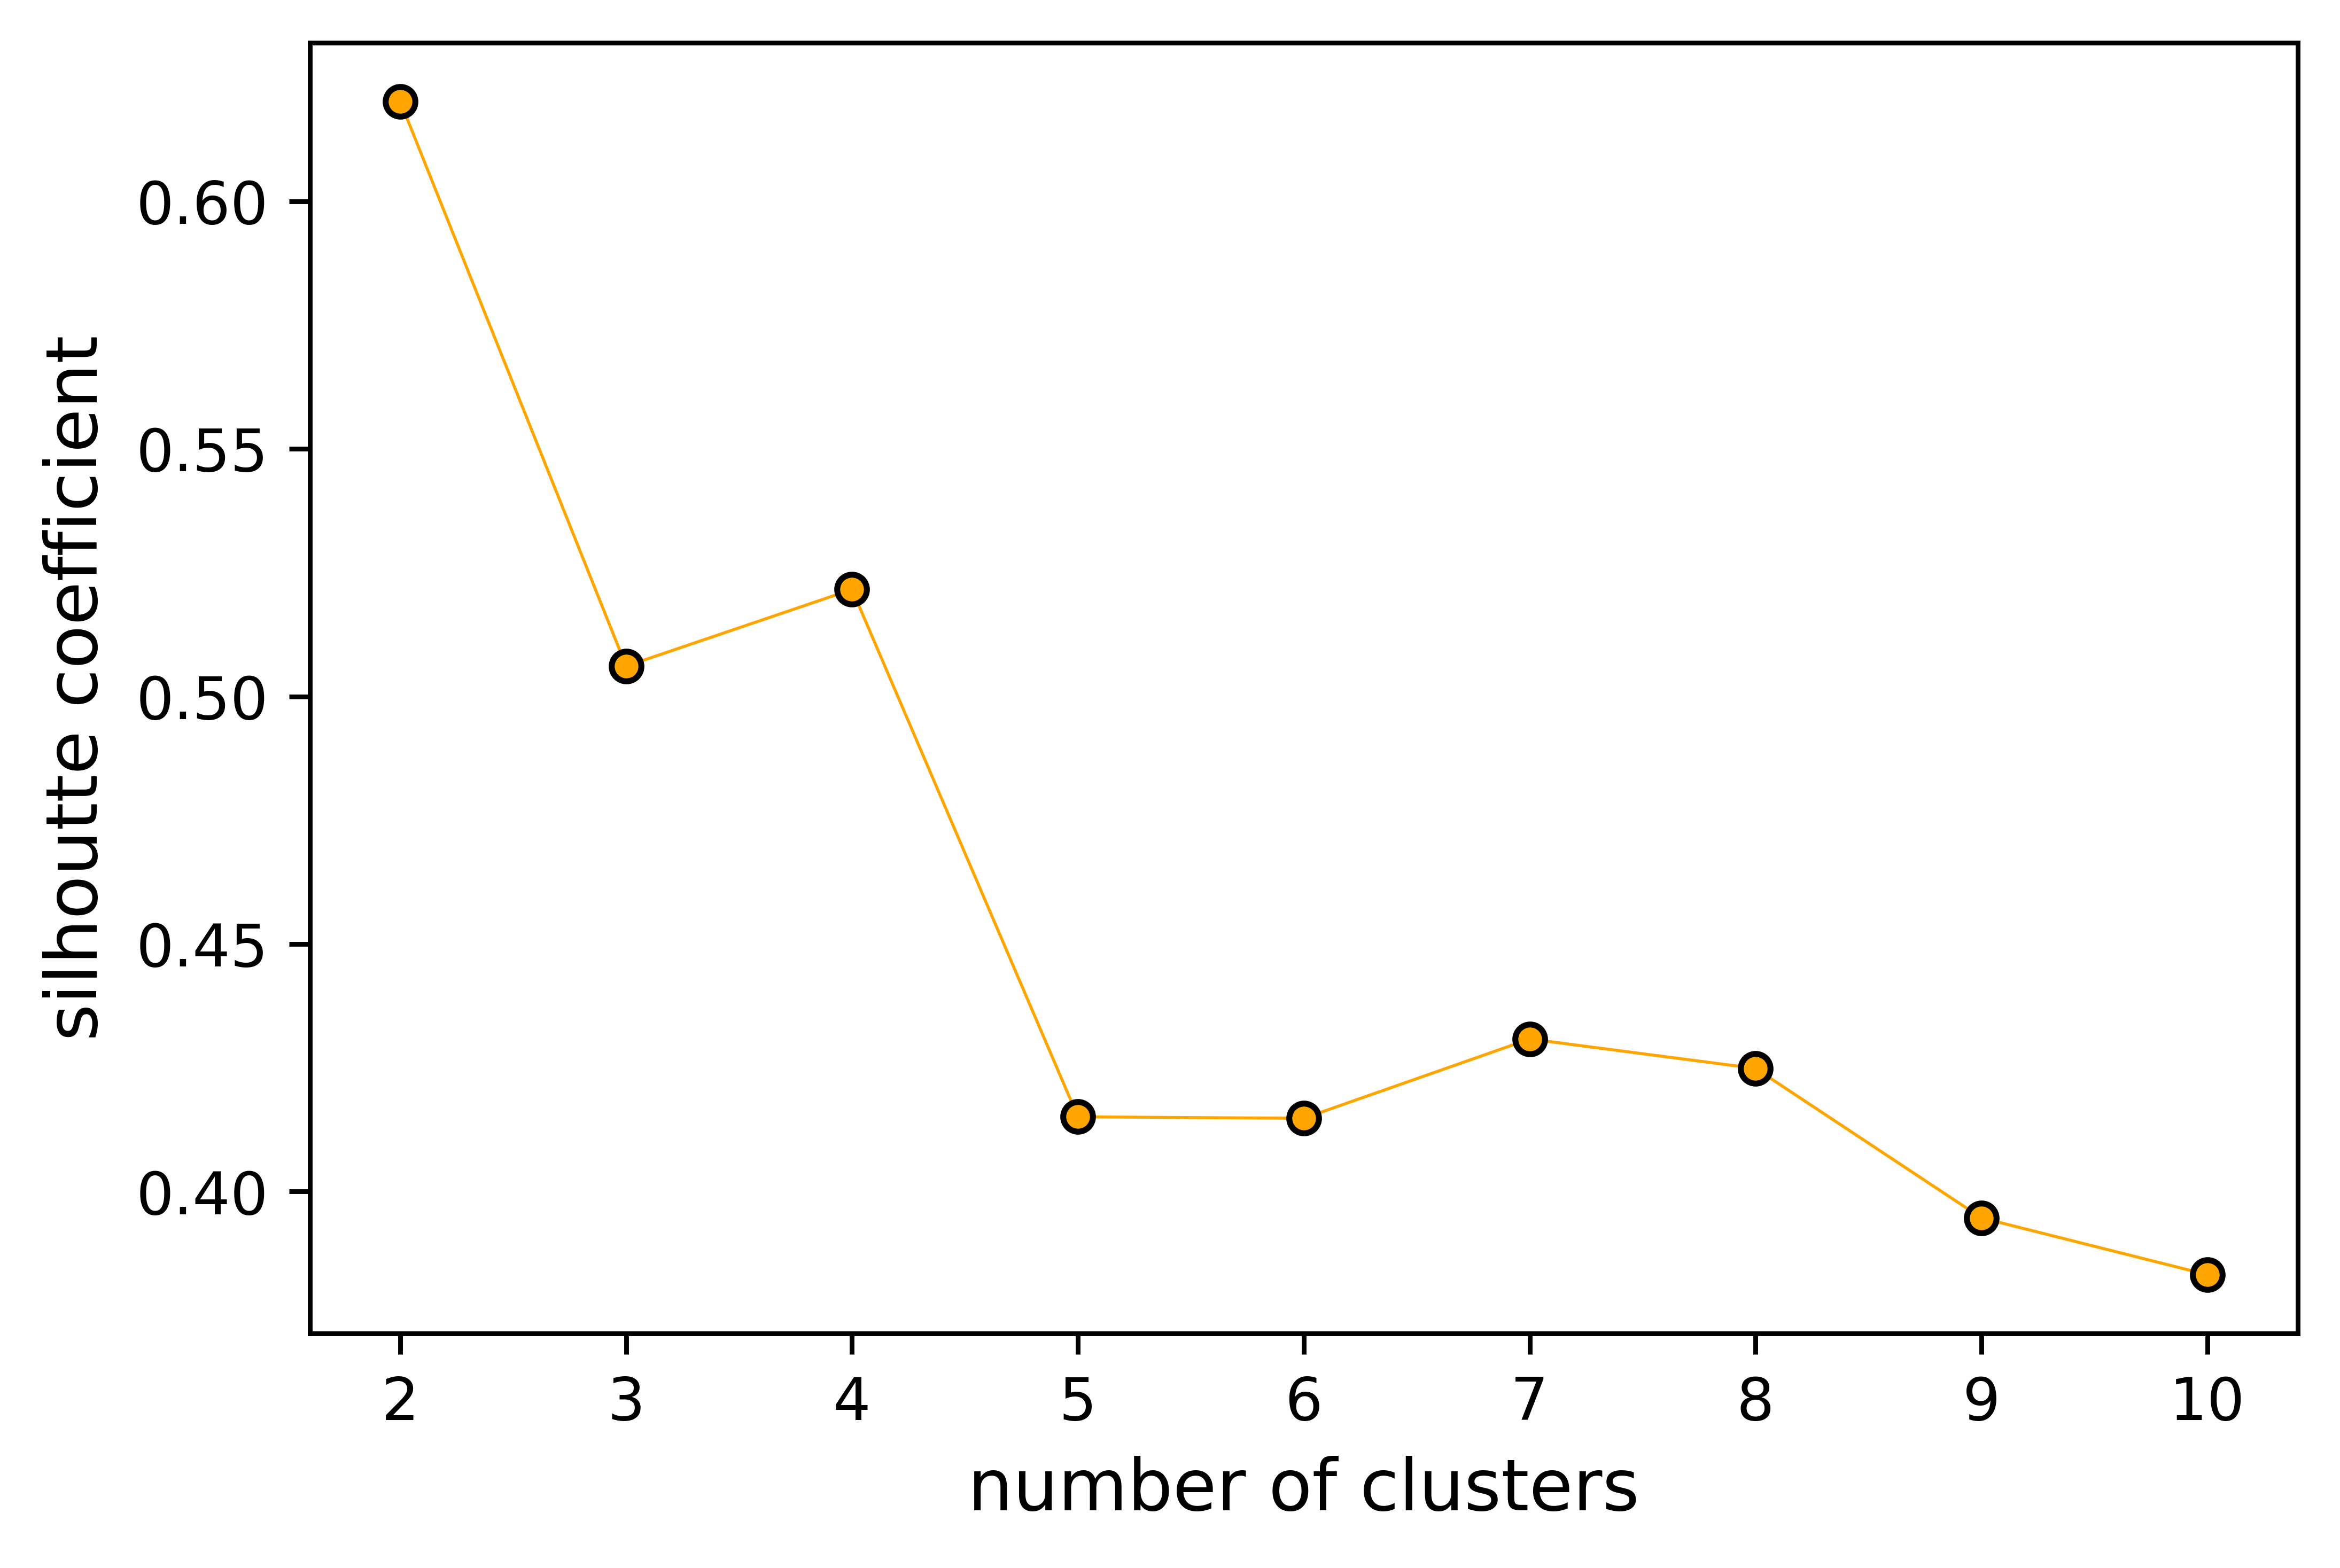

In [109]:
fig, ax = plt.subplots(dpi=800)

ax.plot(range_n_clusters, S, linewidth=0.5, marker='o',color='orange',markersize=5,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.xlabel(r'number of clusters',fontsize=12)
plt.ylabel(r'silhoutte coefficient',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('2D/pca_evaluacion_custering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [110]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

In [111]:
labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [112]:
labels_dict=dict(zip(list(D.keys()),labels))

In [113]:
labels_dict

{'mapudungun': 0,
 'ancash quechua': 0,
 'cajamarca quechua': 1,
 'ecuadorian quechua': 1,
 'ayacucho quechua': 1,
 'aymara': 1,
 'jaqaru': 1,
 'chipaya': 1,
 'uchumataqu': 1,
 'cholon': 0,
 'mochica': 1,
 'kunza': 0,
 'millcayac': 0,
 'allentiac': 1,
 'selknam': 1,
 'yahgan': 1,
 'pilaga': 0,
 'wichi': 0,
 'ayoreo': 1,
 'tapiete': 0,
 'kawesqar': 1,
 'tehuelche': 1,
 'secoya': 1,
 'urarina': 0,
 'yanesha': 1,
 'tariana': 0,
 'tucano': 0,
 'yauyos quechua': 1,
 'puquina': 1,
 'lule': 1,
 'vilela': 0,
 'santiago del estero quechua': 1,
 'pacaraos quechua': 1,
 'kokama': 1,
 'gaviao': 1,
 'tiriyo': 0,
 'kalapalo': 1,
 'karaja': 1,
 'apinaye': 1,
 'kashibo-kakataibo': 1,
 'matses': 0,
 'shiwilu': 0,
 'cavineña': 1,
 'sanuma': 1,
 'hup': 0,
 'kulina': 0,
 'bora': 0,
 'trumai': 1,
 'yurakare': 1,
 'movima': 1,
 'puinave': 0,
 'sabane': 0,
 'aguaruna': 0,
 'kwaza': 0,
 'kakua': 0,
 'moseten': 1}

In [114]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

{'mapudungun': ['southern andes', 'southern cone', 'west', ' andes'],
 'ancash quechua': ['central andes', 'central andes', 'west', 'andes'],
 'cajamarca quechua': ['central andes', 'central andes', 'west', 'andes'],
 'ecuadorian quechua': ['central andes', 'northern andes', 'west', 'andes'],
 'ayacucho quechua': ['central andes', 'central andes', 'west', 'andes'],
 'aymara': ['central andes', 'central andes', 'west', 'andes'],
 'jaqaru': ['central andes', 'central andes', 'west', 'andes'],
 'chipaya': ['central andes', 'central andes', 'west', 'andes'],
 'uchumataqu': ['central andes', 'central andes', 'west', 'andes'],
 'cholon': ['northern andes', 'central andes', 'west', 'andes'],
 'mochica': ['northern andes', 'central andes', 'west', 'andes'],
 'kunza': ['southern andes', 'central andes', 'west', 'andes'],
 'millcayac': ['southern andes', 'southern cone', 'west', 'andes'],
 'allentiac': ['southern andes', 'southern cone', 'west', 'andes'],
 'selknam': ['patagonia', 'southern cone

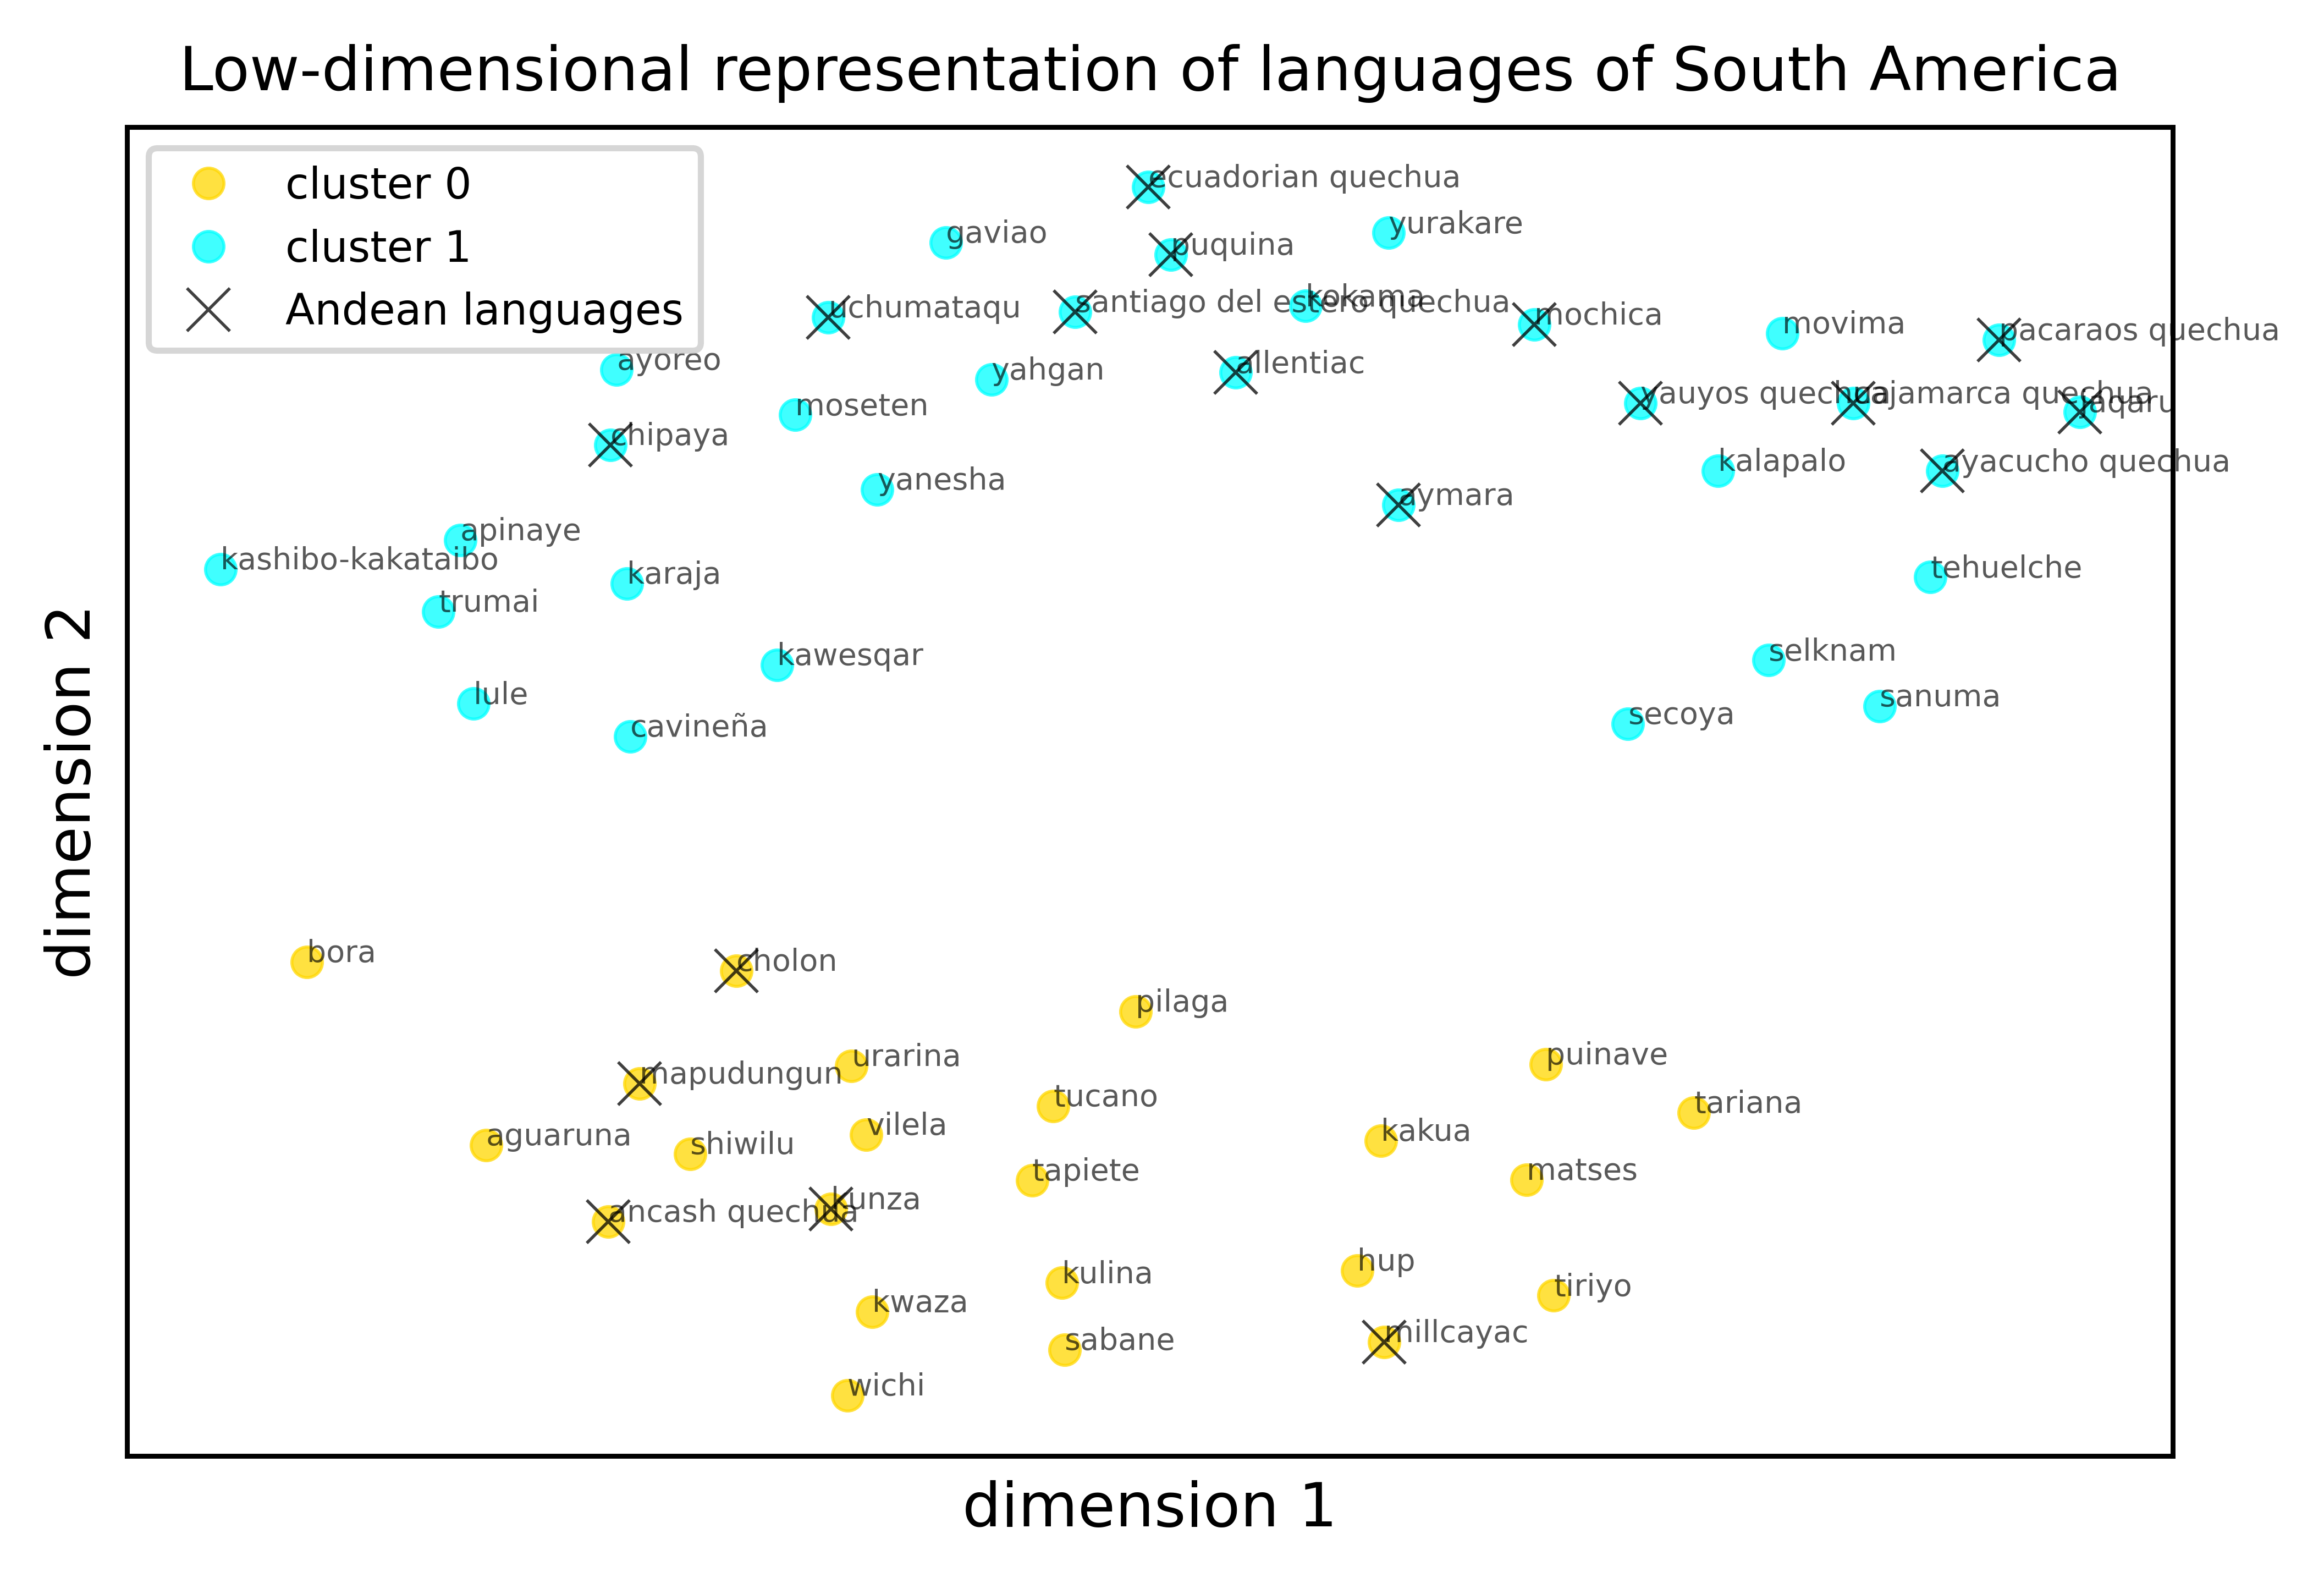

In [115]:
dominio_number=4

areas = pd.read_csv('areas.csv',sep=',')
lenguas = [name.lower() for name in list(areas['lengua'])]
areas_dict = {}
for i in list(areas.index):
    if areas.loc[i,'lengua'].lower()=='moseten':
        areas_dict['moseten']=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
    else:
        areas_dict[areas.loc[i,'lengua'].lower()]=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
    #nombres = list(D.columns)
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

hipotesis = 0

for i in range(len(x)):
    if hipotesis==0:
        if list(D.keys())[i]=='cavineã±a':
            arreglo='cavineña'
            ax.annotate(areas_dict[arreglo], color='k', xy=(x[i],y[i]), fontsize=5, alpha=0.65)
        else:
            ax.annotate(list(D.keys())[i], color='k', xy=(x[i],y[i]), fontsize=5, alpha=0.65)
    else:
        if list(D.keys())[i]=='cavineã±a':
            arreglo='cavineña'
            ax.annotate(areas_dict[arreglo][hipotesis-1], color='k', xy=(x[i],y[i]), fontsize=5, alpha=0.65)
        else:
            ax.annotate(areas_dict[list(D.keys())[i]][hipotesis-1], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
    #ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==0]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==0]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='gold',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 0')
ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==1]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==1]],'o',color='cyan',markersize=5,markeredgewidth=0.5,markeredgecolor='cyan',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 1')

ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if areas_dict[language][3].strip()=='andes']],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if areas_dict[language][3].strip()=='andes']],'x',color='k',markersize=7,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Andean languages')

#ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==2]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==2]],'D',color='fuchsia',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 2')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],'o',color='lime',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='North America')

plt.grid(False)
plt.title('Low-dimensional representation of languages of South America',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('hipotesis/PCAclustering_4_'+str(hipotesis)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [104]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [105]:
world = world[world['continent']=='South America']

In [106]:
x, y, codes = languoid['Longitude'].values, languoid['Latitude'].values, languoid['ID'].values

In [107]:
codes = [glotto_lenguas[L] for L in codes]

In [367]:
labels_dict.keys()

dict_keys(['mapudungun', 'ancash quechua', 'cajamarca quechua', 'ecuadorian quechua', 'ayacucho quechua', 'aymara', 'jaqaru', 'chipaya', 'uchumataqu', 'cholon', 'mochica', 'kunza', 'millcayac', 'allentiac', 'selknam', 'yahgan', 'pilaga', 'wichi', 'ayoreo', 'tapiete', 'kawesqar', 'tehuelche', 'secoya', 'urarina', 'yanesha', 'tariana', 'tucano', 'yauyos quechua', 'puquina', 'lule', 'vilela', 'santiago del estero quechua', 'pacaraos quechua', 'kokama', 'gaviao', 'tiriyo', 'kalapalo', 'karaja', 'apinaye', 'kashibo-kakataibo', 'matses', 'shiwilu', 'cavineña', 'sanuma', 'hup', 'kulina', 'bora', 'trumai', 'yurakare', 'movima', 'puinave', 'sabane', 'aguaruna', 'kwaza', 'kakua', 'moseten'])

In [368]:
len(x),len(D)

(52, 56)

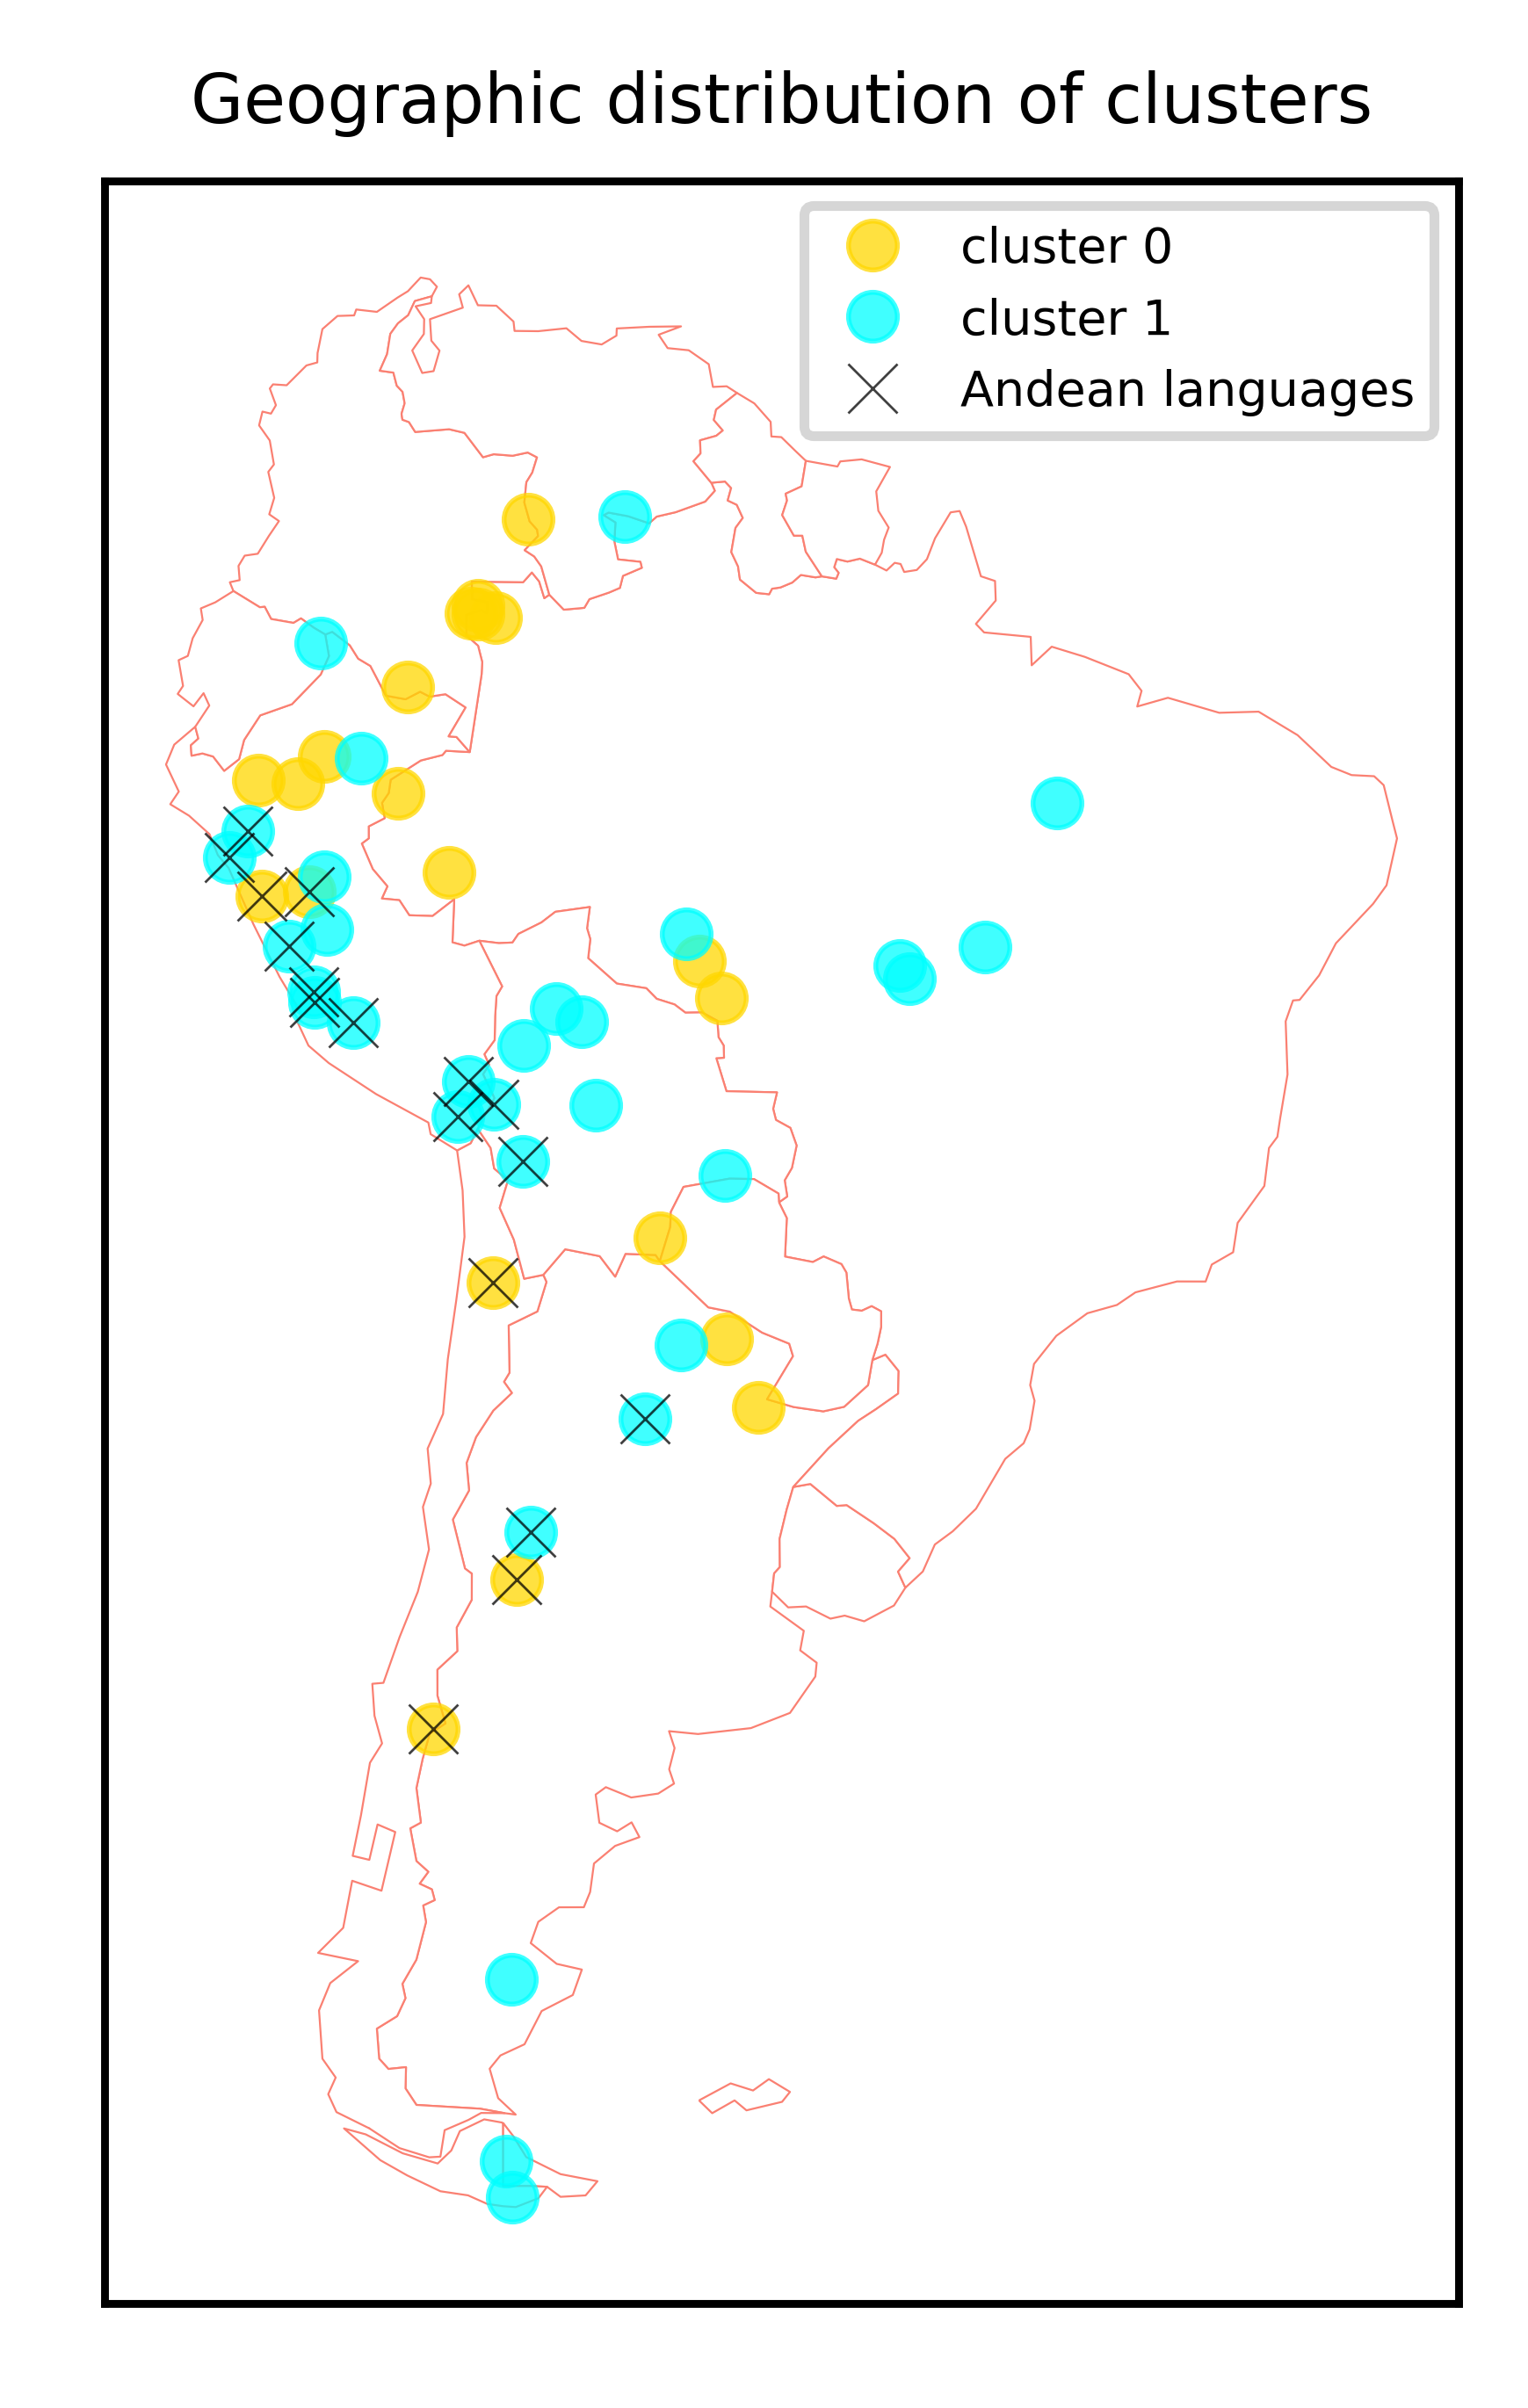

In [372]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Geographic distribution of clusters',fontsize=7)
world.plot(ax=ax, color='white', edgecolor='salmon',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
ax.plot([x[i] for i in [codes.index(language) for language in codes if language in labels_dict.keys() and labels_dict[language]==0]],[y[i] for i in [codes.index(language) for language in codes if language in labels_dict.keys() and labels_dict[language]==0]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='gold',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 0')
ax.plot([x[i] for i in [codes.index(language) for language in codes if language in labels_dict.keys() and labels_dict[language]==1]],[y[i] for i in [codes.index(language) for language in codes if language in labels_dict.keys() and labels_dict[language]==1]],'o',color='cyan',markersize=5,markeredgewidth=0.5,markeredgecolor='cyan',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 1')

ax.plot([x[i] for i in [codes.index(language) for language in codes if areas_dict[language][3].strip()=='andes']],[y[i] for i in [codes.index(language) for language in codes if areas_dict[language][3].strip()=='andes']],'x',color='k',markersize=5,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Andean languages')

#for i in range(len(x)):
#        ax.annotate(codes[i], color='k', xy=(x[i],y[i]), fontsize=2, alpha=0.65)
        
plt.legend(loc='best',fontsize=5)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('maps/mapa_clusters.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [193]:
areas_dict

{'mapudungun': ['southern andes', 'southern cone', 'west', ' andes'],
 'ancash quechua': ['central andes', 'central andes', 'west', 'andes'],
 'cajamarca quechua': ['central andes', 'central andes', 'west', 'andes'],
 'ecuadorian quechua': ['central andes', 'northern andes', 'west', 'andes'],
 'ayacucho quechua': ['central andes', 'central andes', 'west', 'andes'],
 'aymara': ['central andes', 'central andes', 'west', 'andes'],
 'jaqaru': ['central andes', 'central andes', 'west', 'andes'],
 'chipaya': ['central andes', 'central andes', 'west', 'andes'],
 'uchumataqu': ['central andes', 'central andes', 'west', 'andes'],
 'cholon': ['northern andes', 'central andes', 'west', 'andes'],
 'mochica': ['northern andes', 'central andes', 'west', 'andes'],
 'kunza': ['southern andes', 'central andes', 'west', 'andes'],
 'millcayac': ['southern andes', 'southern cone', 'west', 'andes'],
 'allentiac': ['southern andes', 'southern cone', 'west', 'andes'],
 'selknam': ['patagonia', 'southern cone

### Arealidad de los rasgos!

In [99]:
## filter group_dict

group_dict = {n:[k for k in labels_dict.keys() if labels_dict[k] == n] for n in set(labels_dict.values())}

In [100]:
group_dict

{0: ['mapudungun',
  'ancash quechua',
  'cholon',
  'kunza',
  'millcayac',
  'pilaga',
  'wichi',
  'tapiete',
  'urarina',
  'tariana',
  'tucano',
  'vilela',
  'tiriyo',
  'matses',
  'shiwilu',
  'hup',
  'kulina',
  'bora',
  'puinave',
  'sabane',
  'aguaruna',
  'kwaza',
  'kakua'],
 1: ['cajamarca quechua',
  'ecuadorian quechua',
  'ayacucho quechua',
  'aymara',
  'jaqaru',
  'chipaya',
  'uchumataqu',
  'mochica',
  'allentiac',
  'selknam',
  'yahgan',
  'ayoreo',
  'kawesqar',
  'tehuelche',
  'secoya',
  'yanesha',
  'yauyos quechua',
  'puquina',
  'lule',
  'santiago del estero quechua',
  'pacaraos quechua',
  'kokama',
  'gaviao',
  'kalapalo',
  'karaja',
  'apinaye',
  'kashibo-kakataibo',
  'cavineña',
  'sanuma',
  'trumai',
  'yurakare',
  'movima',
  'moseten']}

In [101]:
## formato sklearn!

#X = [list(D[language].values()) for language in D.keys() if language in labels_dict.keys()]
y = [labels_dict[language] for language in D.keys() if language in labels_dict.keys()]

In [102]:
X

array([[-61.00414   ,  15.609427  ],
       [-61.89215   ,   3.9071534 ],
       [ 73.36638   ,  -8.989113  ],
       [ 65.53358   , -60.02771   ],
       [ 80.21133   , -30.49633   ],
       [ 48.82266   , -22.850725  ],
       [ 68.030914  , -27.161858  ],
       [ 34.197266  , -49.286316  ],
       [ 47.331173  , -65.09758   ],
       [-30.148281  ,  -5.5889874 ],
       [ 71.83527   , -39.834328  ],
       [-52.10154   ,  21.48407   ],
       [-37.348343  ,  54.800632  ],
       [ 75.78213   , -54.843613  ],
       [ 39.463318  ,  10.9677305 ],
       [ 45.709568  , -52.73125   ],
       [-75.36877   ,  21.164377  ],
       [-74.76387   ,  39.501663  ],
       [ 26.158546  , -56.878334  ],
       [-44.248173  ,  14.105253  ],
       [  0.32604128, -23.858786  ],
       [ 60.195793  ,   1.2806807 ],
       [ 33.324352  ,  -0.48605216],
       [-41.14108   ,  23.906633  ],
       [ 26.239048  , -71.406654  ],
       [-12.485496  ,  31.558006  ],
       [-41.33064   ,   3.8626223 ],
 

In [103]:
y

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

#### manera 1: trees!

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

In [105]:
forest.fit(X, y)
importances = dict(zip(D[list(D.keys())[0]].keys(),forest.feature_importances_))

In [106]:
## ordenamos los rasgos de mayor a menor importancia!

importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1],reverse=True)}

In [107]:
importances

{'4_2': 0.5905632489763911, '4_3': 0.4094367510236089}

#### manera 2: kbest!

In [108]:
from sklearn.feature_selection import SelectKBest, chi2
kbest = SelectKBest(chi2, k='all').fit(X, y)

ValueError: Input X must be non-negative.

In [ ]:
importances = dict(zip(D[list(D.keys())[0]].keys(),kbest.scores_))

In [ ]:
## ordenamos los rasgos de mayor a menor importancia!

importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
importances